# Exploratory Data Analysis

In [44]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy.stats import boxcox

In [2]:
DATA_DIR = (
    Path("..")
    / ".."
    / "hfactory_magic_folders"
    / "plastic_cost_prediction"
    / "data"
)
MAIN_FILE = "PA6_cleaned_dataset.csv"

In [3]:
df = pd.read_csv(DATA_DIR / MAIN_FILE)

In [4]:
df.columns

Index(['Unnamed: 0', 'time', 'PA6 GLOBAL_ EMEAS _ EUR per TON', 'CRUDE_PETRO',
       'CRUDE_BRENT', 'CRUDE_DUBAI', 'CRUDE_WTI', 'NGAS_US', 'NGAS_EUR',
       'NGAS_JP', 'iNATGAS', 'best_price_compound', 'Benzene_price',
       'Caprolactam_price', 'Cyclohexane_price', 'Electricty_Price_France',
       'Electricty_Price_Italy', 'Electricty_Price_Poland',
       'Electricty_Price_Netherlands', 'Electricty_Price_Germany',
       'Inflation_rate_france', 'Automotive Value'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0                           int64
time                                object
PA6 GLOBAL_ EMEAS _ EUR per TON      int64
CRUDE_PETRO                        float64
CRUDE_BRENT                        float64
CRUDE_DUBAI                        float64
CRUDE_WTI                          float64
NGAS_US                            float64
NGAS_EUR                           float64
NGAS_JP                            float64
iNATGAS                            float64
best_price_compound                float64
Benzene_price                      float64
Caprolactam_price                    int64
Cyclohexane_price                  float64
Electricty_Price_France            float64
Electricty_Price_Italy             float64
Electricty_Price_Poland            float64
Electricty_Price_Netherlands       float64
Electricty_Price_Germany           float64
Inflation_rate_france              float64
Automotive Value                   float64
dtype: object

In [6]:
# convert time from string to datetime
df["time"] = pd.to_datetime(df["time"])

## Time series plots of features

First, we have a look at the single columns that don't belong to the same topic.

In [7]:
def plot_time_series(col: str) -> None:
    # Create the plot
    plt.plot(df["time"], df[col])

    # Add title and axis labels
    plt.title(f"Time Series Plot - {col}")
    plt.xlabel("time")
    plt.ylabel(col)
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()

In [8]:
single_cols = [
    "PA6 GLOBAL_ EMEAS _ EUR per TON",
    "best_price_compound",
    "Inflation_rate_france",
    "Automotive Value",
]

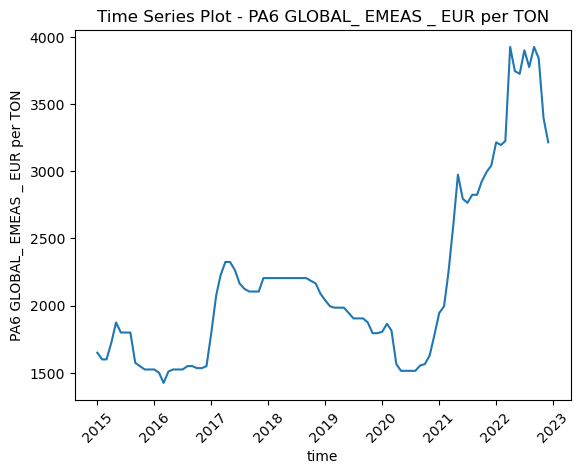

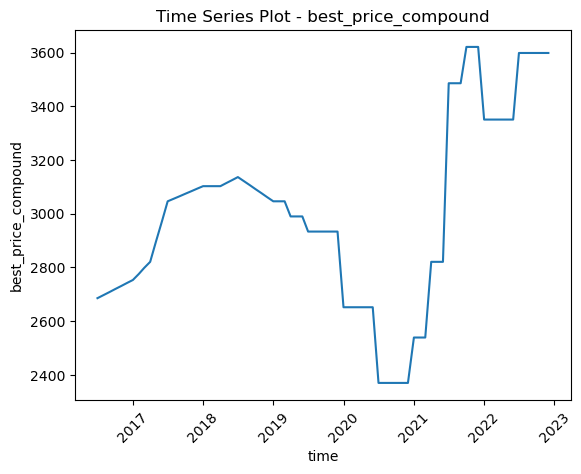

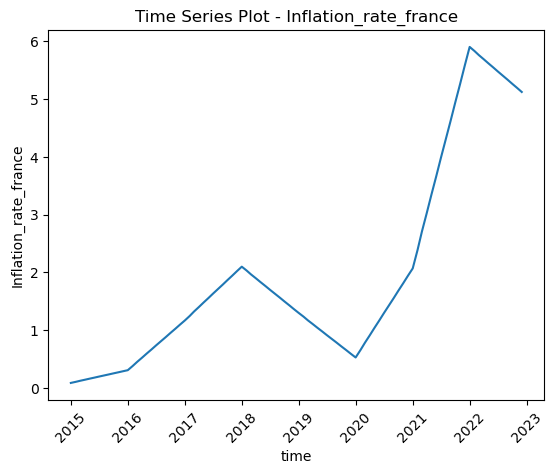

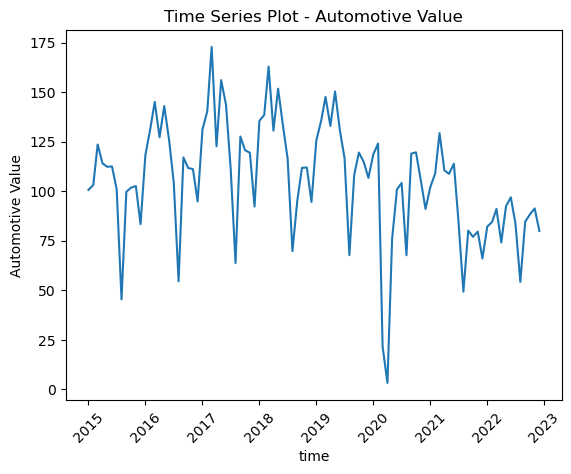

In [9]:
for col in single_cols:
    plot_time_series(col)

Next, the columns that belong to the same group are displayed in the same plot.

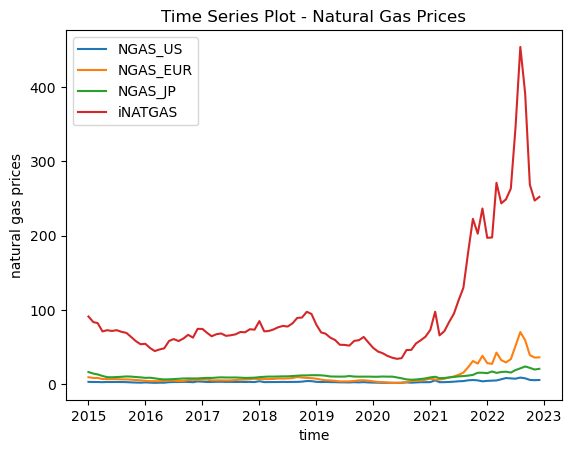

In [10]:
gas_cols = ["NGAS_US", "NGAS_EUR", "NGAS_JP", "iNATGAS"]

plt.figure()

for column in gas_cols:
    plt.plot(df["time"], df[column], label=column)

plt.title(f"Time Series Plot - Natural Gas Prices")
plt.xlabel("time")
plt.ylabel("natural gas prices")
plt.legend();

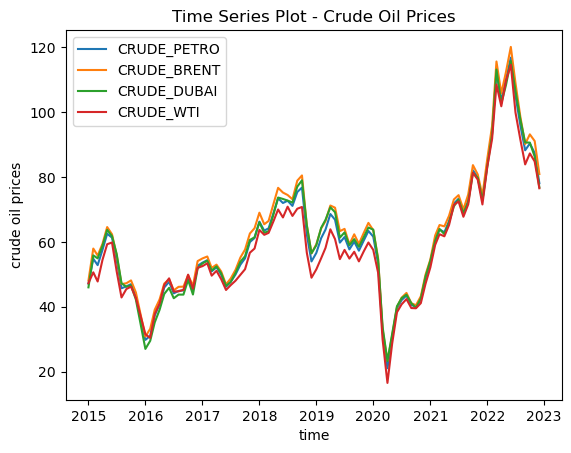

In [11]:
crude_cols = ["CRUDE_PETRO", "CRUDE_BRENT", "CRUDE_DUBAI", "CRUDE_WTI"]

plt.figure()

for column in crude_cols:
    plt.plot(df["time"], df[column], label=column)

plt.title(f"Time Series Plot - Crude Oil Prices")
plt.xlabel("time")
plt.ylabel("crude oil prices")
plt.legend();

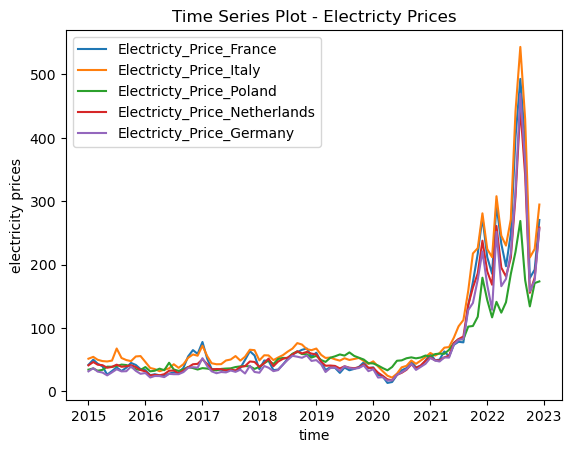

In [12]:
electricity_cols = [
    "Electricty_Price_France",
    "Electricty_Price_Italy",
    "Electricty_Price_Poland",
    "Electricty_Price_Netherlands",
    "Electricty_Price_Germany",
]

plt.figure()

for column in electricity_cols:
    plt.plot(df["time"], df[column], label=column)

plt.title(f"Time Series Plot - Electricty Prices")
plt.xlabel("time")
plt.ylabel("electricity prices")
plt.legend();

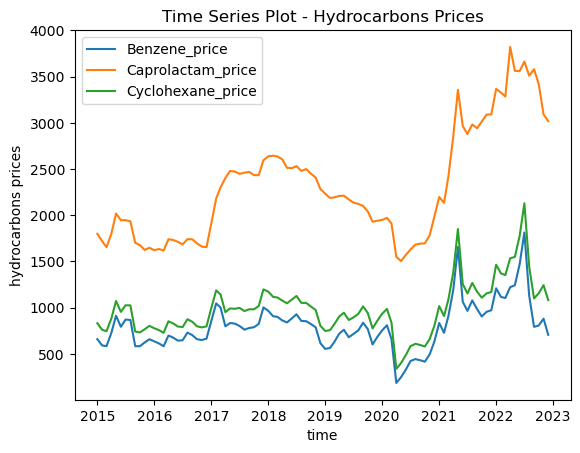

In [13]:
hydrocarbons_cols = ["Benzene_price", "Caprolactam_price", "Cyclohexane_price"]

plt.figure()

for column in hydrocarbons_cols:
    plt.plot(df["time"], df[column], label=column)

plt.title(f"Time Series Plot - Hydrocarbons Prices")
plt.xlabel("time")
plt.ylabel("hydrocarbons prices")
plt.legend();

## (Partial) Autocorrelation

/Users/madhuranirale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


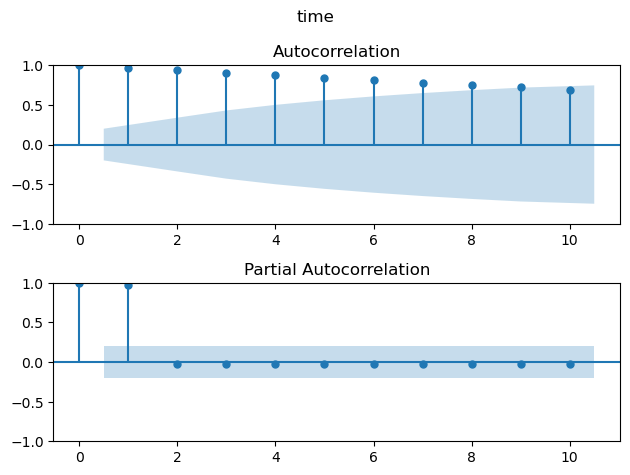

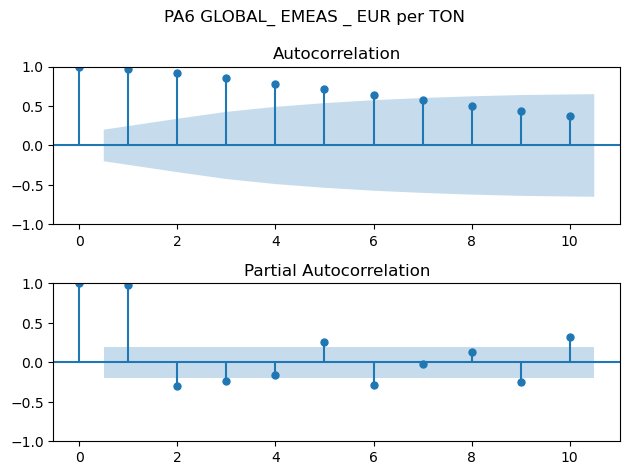

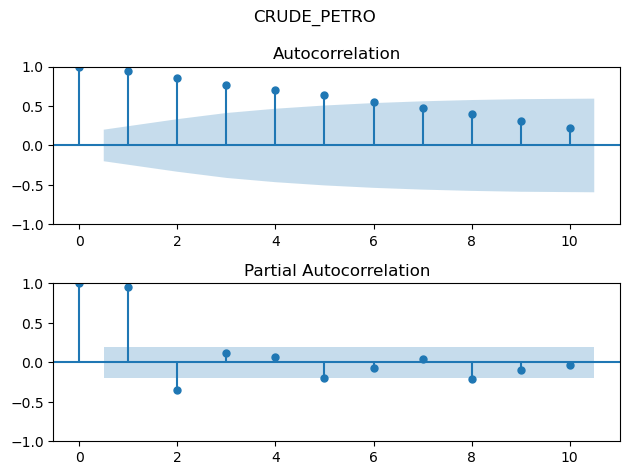

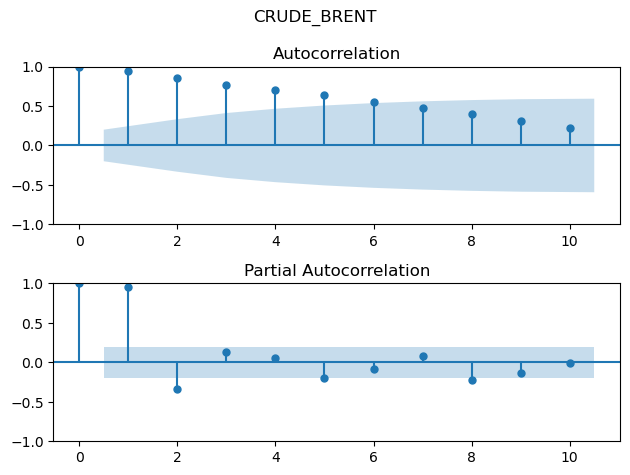

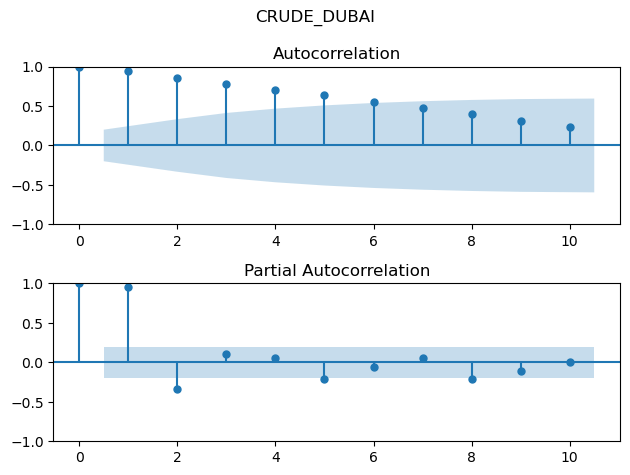

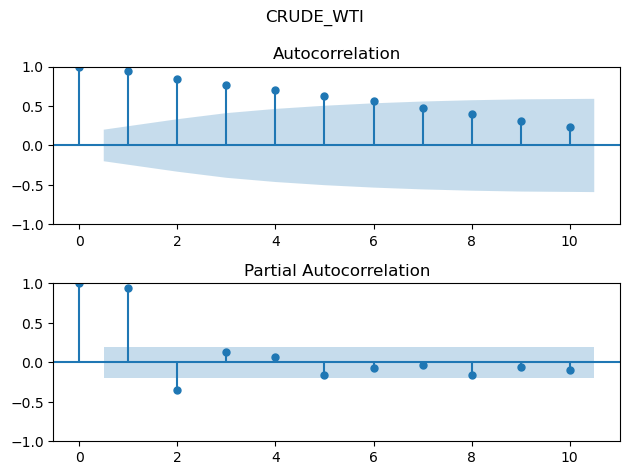

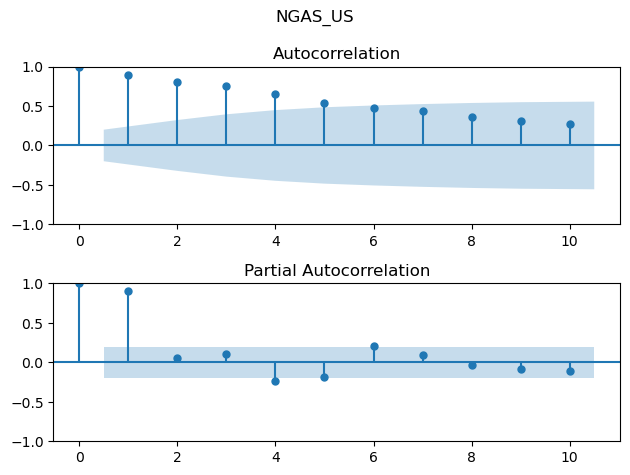

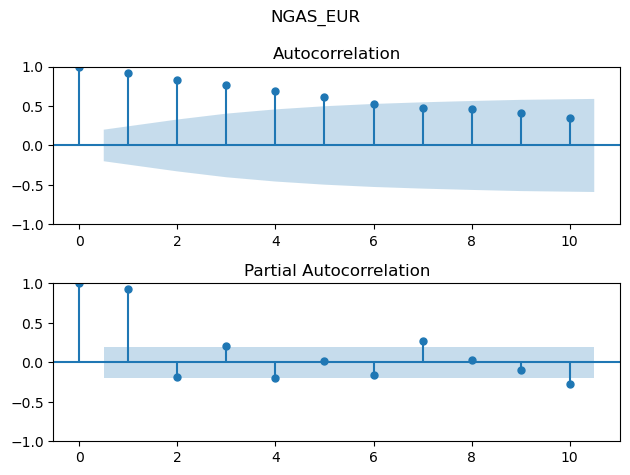

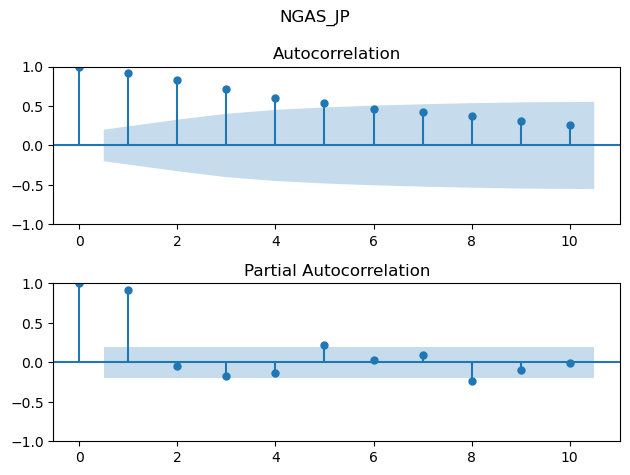

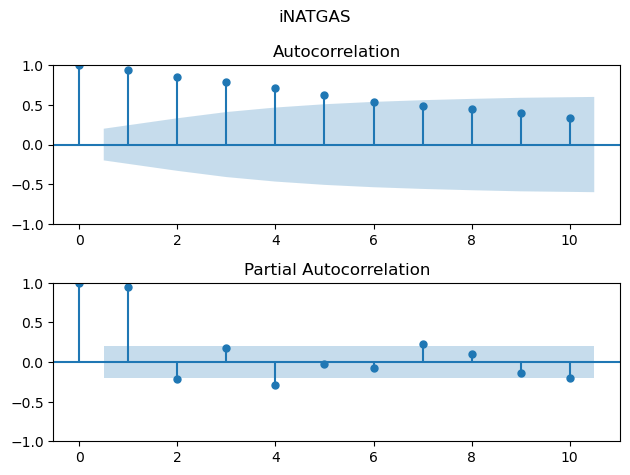

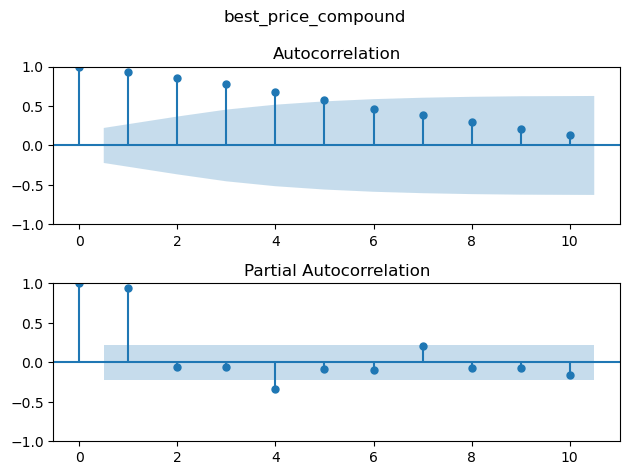

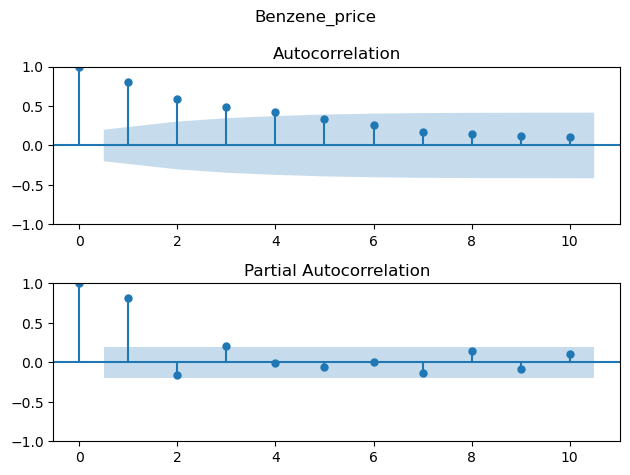

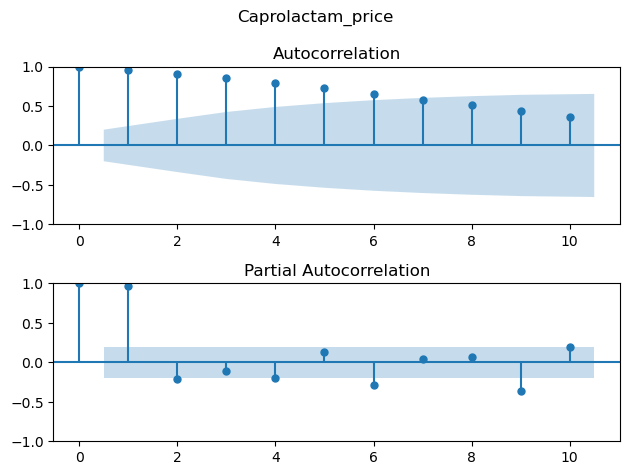

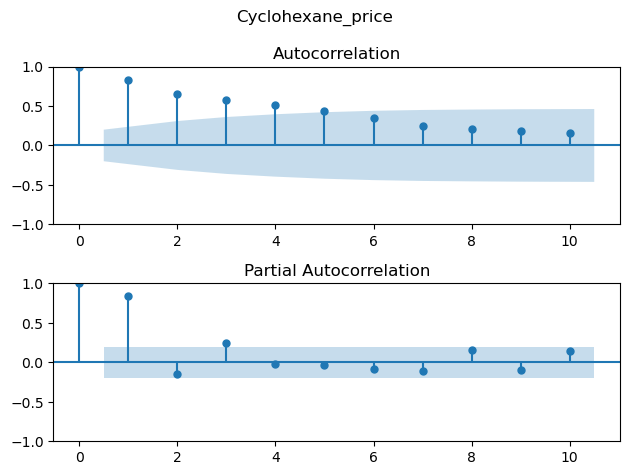

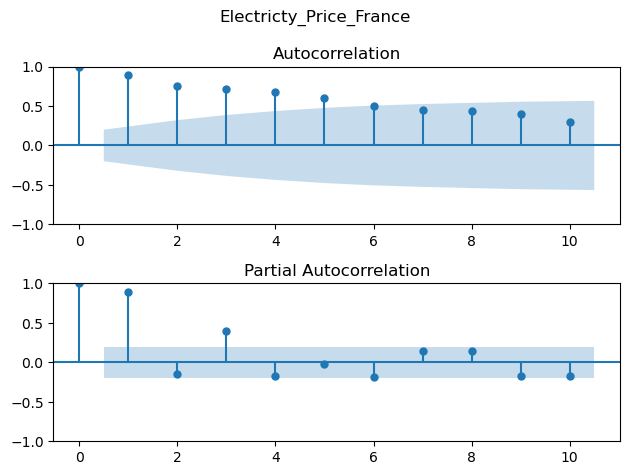

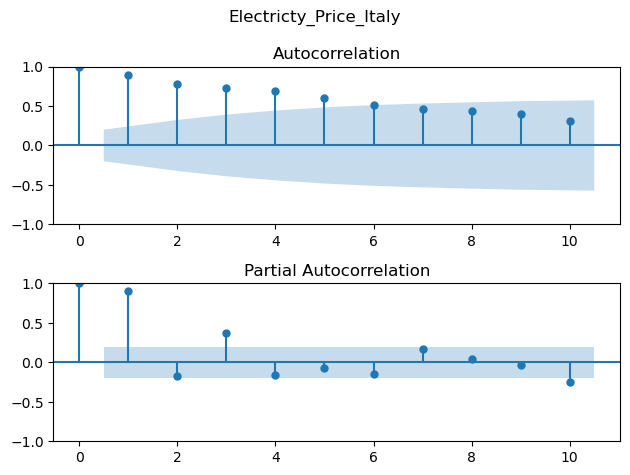

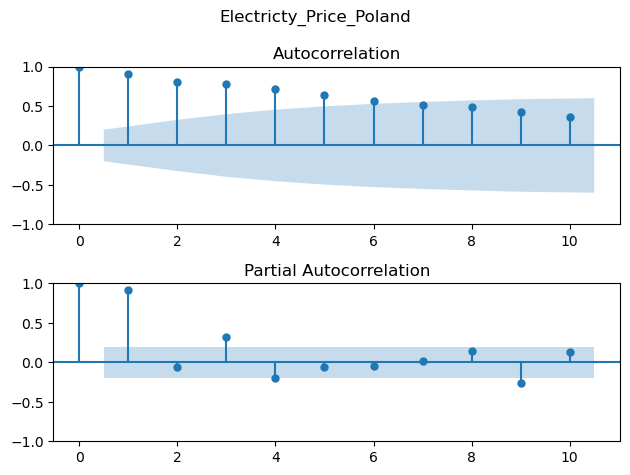

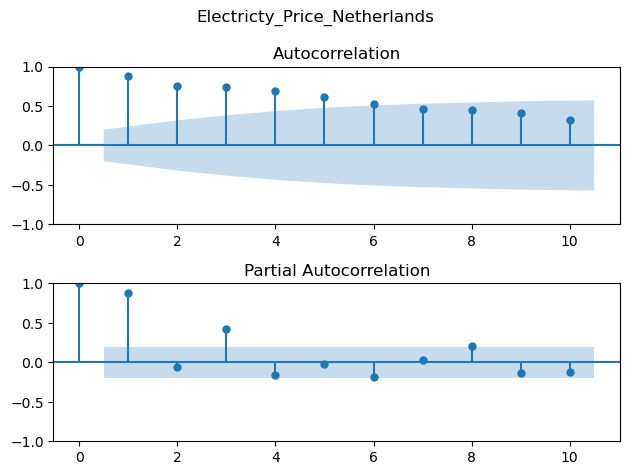

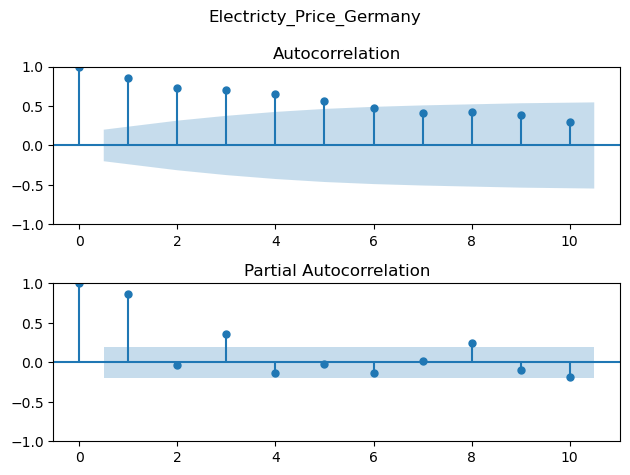

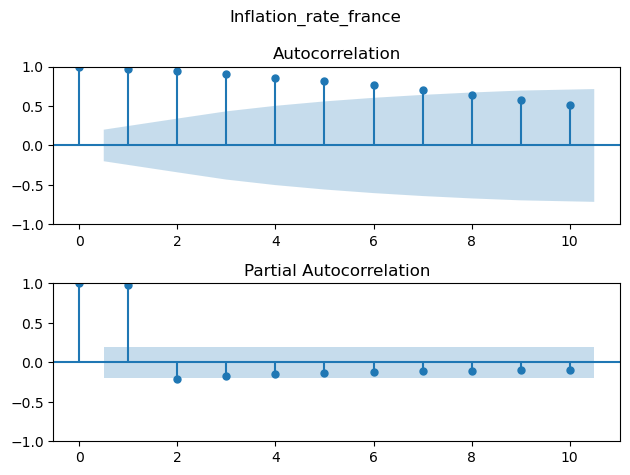

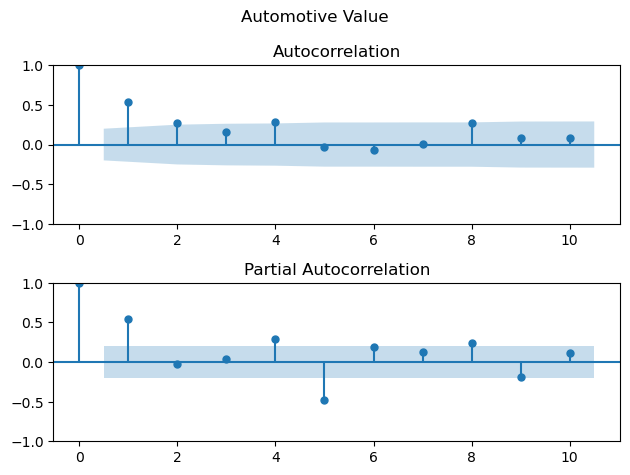

In [14]:
for col in df.columns[1:]:
    data = df[col]
    if col == "best_price_compound":
        data = data.dropna()

    f, ax = plt.subplots(nrows=2, ncols=1)
    f.subplots_adjust(hspace=0.4, top=0.85)
    f.suptitle(col)
    plot_acf(data, lags=10, ax=ax[0])
    plot_pacf(data, lags=10, ax=ax[1])
    plt.tight_layout()
    plt.show()

## Augmented Dicky-Fuller (ADF) Test

In [27]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [28]:
df

time  PA6 GLOBAL_ EMEAS _ EUR per TON  CRUDE_PETRO  CRUDE_BRENT  \
0  2015-01-01                             1650    47.106667        48.07   
1  2015-02-01                             1600    54.790000        57.93   
2  2015-03-01                             1600    52.826667        55.79   
3  2015-04-01                             1725    57.543333        59.39   
4  2015-05-01                             1875    62.506667        64.56   
..        ...                              ...          ...          ...   
91 2022-08-01                             3775    95.973333        98.60   
92 2022-09-01                             3925    88.220000        90.16   
93 2022-10-01                             3840    90.326667        93.13   
94 2022-11-01                             3395    87.376667        91.07   
95 2022-12-01                             3215    78.066667        80.90   

    CRUDE_DUBAI  CRUDE_WTI  NGAS_US   NGAS_EUR    NGAS_JP     iNATGAS  ...  \
0         45.98      47.27   2.9743   9.250000  16.187338   91.059105  ...   
1         55.83      50.61   2.8478   8.270000  14.203834   83.520263  ...   
2         54.91      47.78   2.8006   8.270000  13.041319   82.159499  ...   
3         58.80      54.44   2.5797   6.774446  10.936659   70.941309  ...   
4         63.69      59.27   2.8383   6.683997   9.336900   72.567769  ...   
..          ...        ...      ...        ...        ...         ...  ...   
91        97.75      91.57   8.7854  70.043640  21.210848  454.040143  ...   
92        90.63      83.87   7.7629  59.102622  23.733791  391.319527  ...   
93        90.59      87.26   5.6195  39.022050  21.841776  268.547107  ...   
94        86.28      84.78   5.2769  35.723282  19.586267  247.176443  ...   
95        76.78      76.52   5.5030  36.044260  20.576742  252.119020  ...   

    Benzene_price  Caprolactam_price  Cyclohexane_price  \
0          659.63               1800             832.67   
1          591.18               1719             760.25   
2          584.15               1655             745.34   
3          727.69               1800             883.40   
4          912.53               2019            1073.00   
..            ...                ...                ...   
91        1130.00               3511            1444.00   
92         792.63               3581            1100.00   
93         807.03               3420            1156.00   
94         881.20               3093            1244.00   
95         706.41               3018            1082.00   

    Electricty_Price_France  Electricty_Price_Italy  Electricty_Price_Poland  \
0                     41.95                   51.60                    34.34   
1                     50.14                   54.52                    36.23   
2                     43.79                   49.94                    32.64   
3                     39.52                   47.85                    34.04   
4                     26.46                   47.27                    39.07   
..                      ...                     ...                      ...   
91                   492.99                  543.48                   268.88   
92                   393.55                  429.21                   175.50   
93                   178.89                  211.26                   134.12   
94                   192.16                  224.72                   170.95   
95                   270.49                  294.81                   173.55   

    Electricty_Price_Netherlands  Electricty_Price_Germany  \
0                          41.18                     31.68   
1                          46.37                     36.69   
2                          42.18                     31.30   
3                          41.40                     29.78   
4                          37.34                     25.33   
..                           ...                       ...   
91                        447.25                    469

In [30]:
def adf_test_all_columns(dataframe, significance_level=0.05):
    """
    Perform Augmented Dickey-Fuller (ADF) test on all columns in the DataFrame.

    Parameters:
    - dataframe: pandas DataFrame
    - significance_level: significance level for the test (default is 0.05)

    Returns:
    - df_results: DataFrame containing column names and corresponding p-values
    - stationary_columns: List of column names that are stationary
    """

    df_results = pd.DataFrame(columns=['Column', 'ADF p-value'])
    stationary_columns = []

    for column in dataframe.columns:
        result_adf = adfuller(dataframe[column].dropna())
        p_value = round(result_adf[1], 3)

        #df_results = df_results.append({'Column': column, 'ADF p-value': p_value}, ignore_index=True)
        df_results = pd.concat([df_results, pd.DataFrame({'Column': [column], 'ADF p-value': [p_value]})], ignore_index=True)

        if p_value <= significance_level:
            stationary_columns.append(column)

    print("Columns that are stationary based on the ADF test:")
    print(stationary_columns)

    return df_results, stationary_columns

# Example Usage:
# Replace 'your_dataframe' with the actual DataFrame containing your time series data
results, stationary_cols = adf_test_all_columns(df)
display(results)


Columns that are stationary based on the ADF test:
['NGAS_EUR', 'Electricty_Price_France', 'Electricty_Price_Italy', 'Electricty_Price_Netherlands']


Column  ADF p-value
0                              time        0.925
1   PA6 GLOBAL_ EMEAS _ EUR per TON        0.142
2                       CRUDE_PETRO        0.268
3                       CRUDE_BRENT        0.274
4                       CRUDE_DUBAI        0.268
5                         CRUDE_WTI        0.262
6                           NGAS_US        0.340
7                          NGAS_EUR        0.000
8                           NGAS_JP        0.831
9                           iNATGAS        0.055
10              best_price_compound        0.396
11                    Benzene_price        0.074
12                Caprolactam_price        0.362
13                Cyclohexane_price        0.147
14          Electricty_Price_France        0.027
15           Electricty_Price_Italy        0.000
16          Electricty_Price_Poland        0.999
17     Electricty_Price_Netherlands        0.000
18         Electricty_Price_Germany        0.230
19            Inflation_rate_france        0.335
20                 Automotive Value        0.587

Column: PA6 GLOBAL_ EMEAS _ EUR per TON
ADF P-Value (Log Transformation): 0.6842564244890055


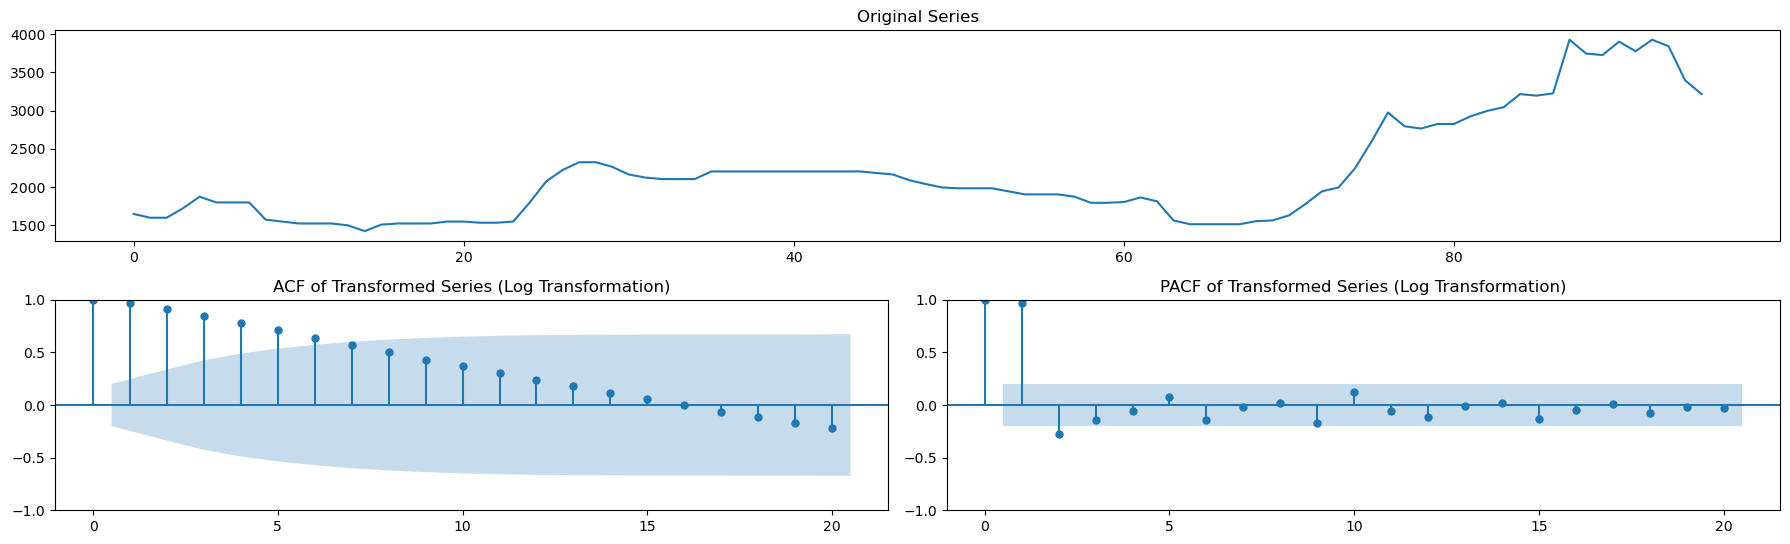

ADF P-Value (Square Root Transformation): 0.4684458355077802


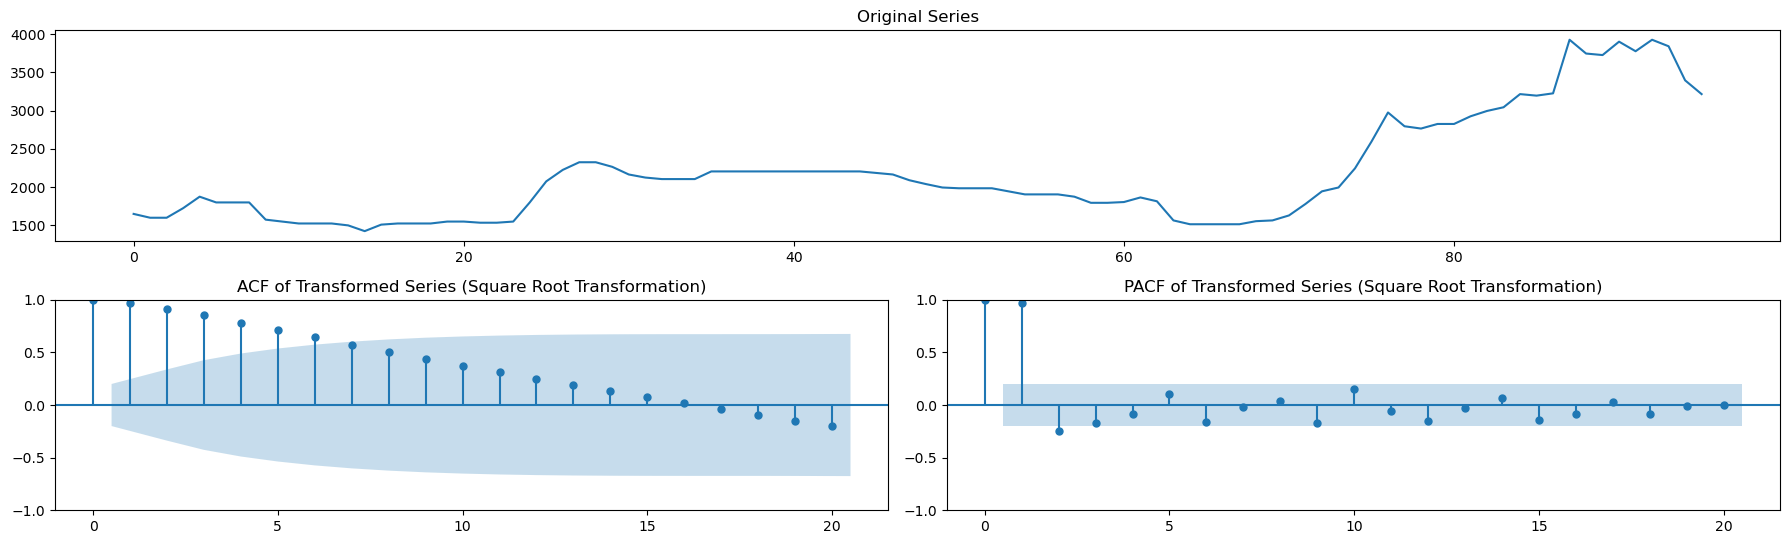

ADF P-Value (Box-Cox Transformation): 0.49324522924002895


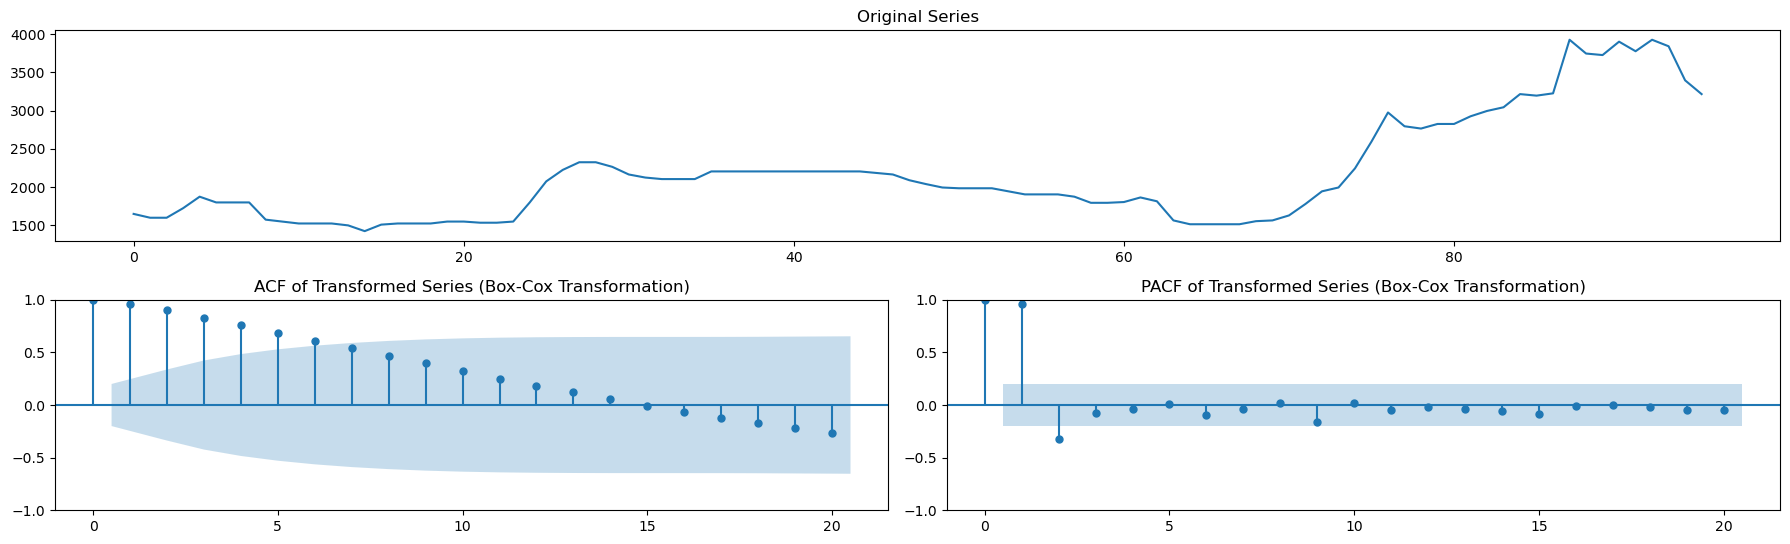

ADF P-Value (First Differencing): 0.18082057321286477


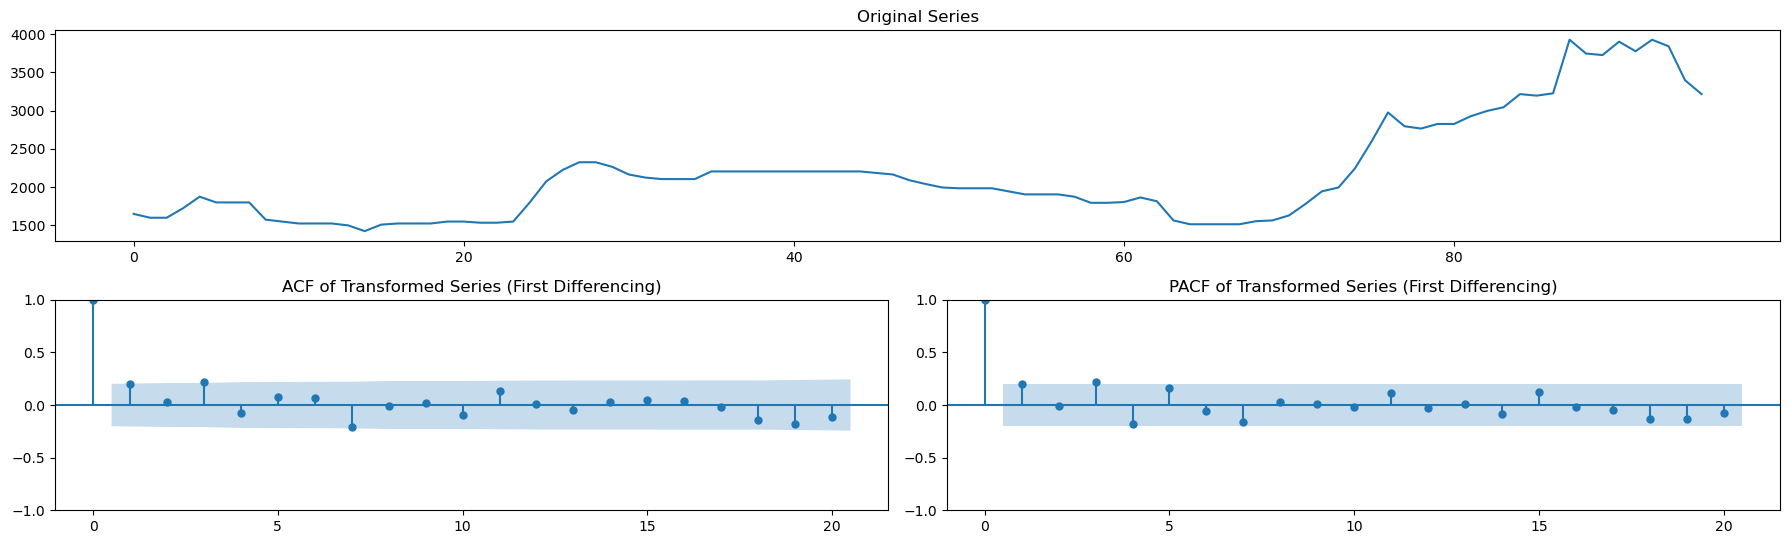

ADF P-Value (Second Difference of Log): 7.445803519825672e-09


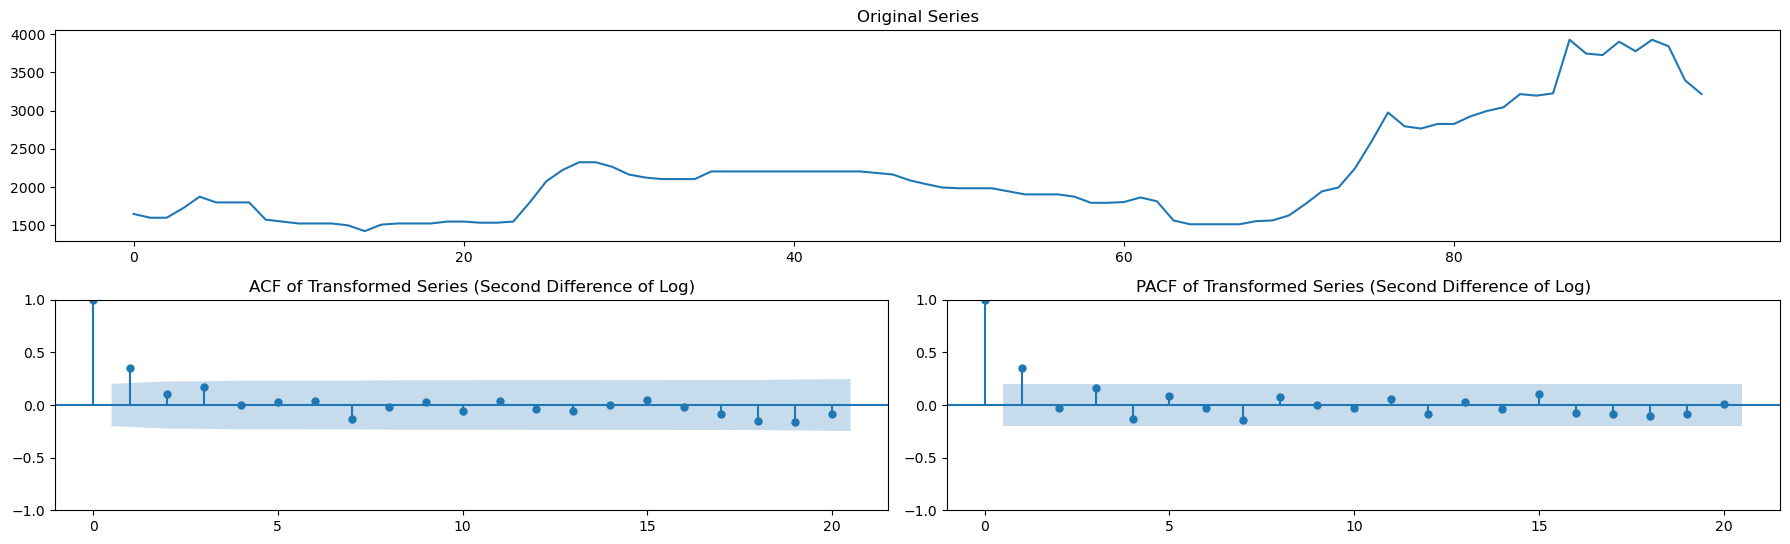



Column: CRUDE_PETRO
ADF P-Value (Log Transformation): 0.3340967005227793


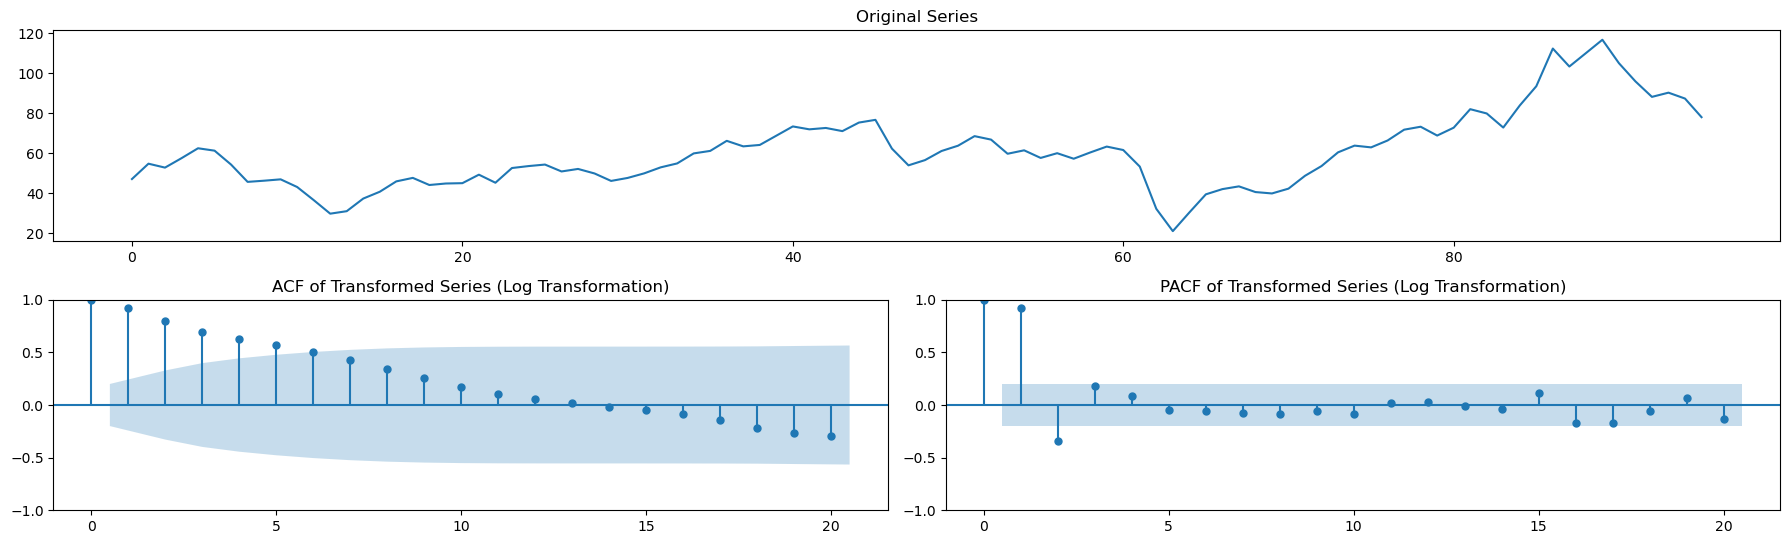

ADF P-Value (Square Root Transformation): 0.3874791036087578


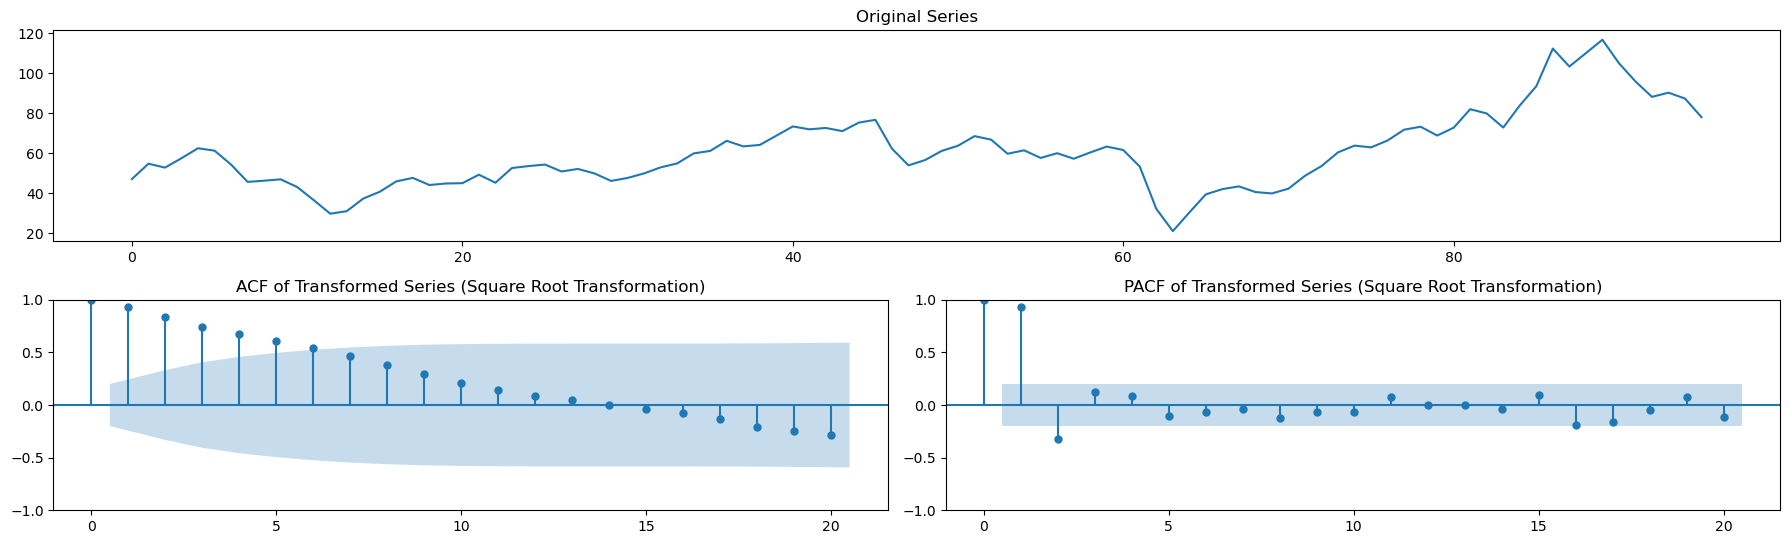

ADF P-Value (Box-Cox Transformation): 0.3560443215694026


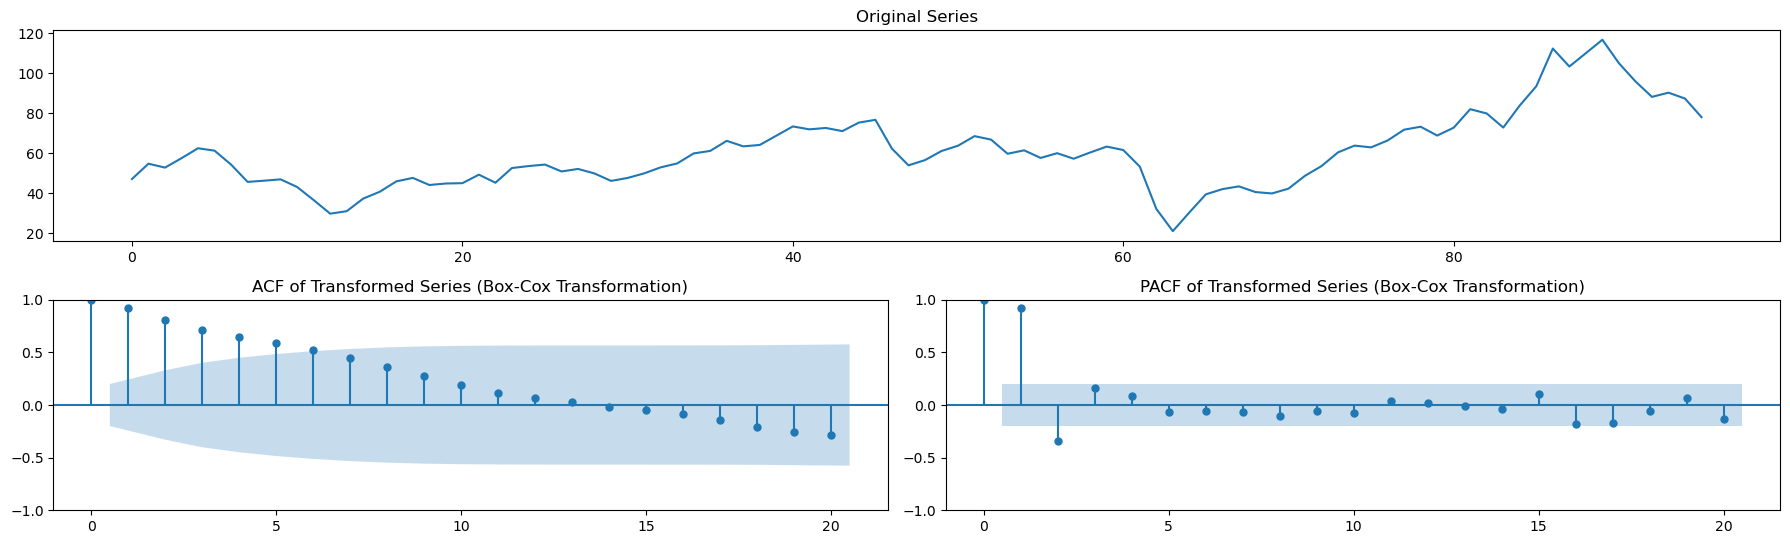

ADF P-Value (First Differencing): 4.365864198663271e-09


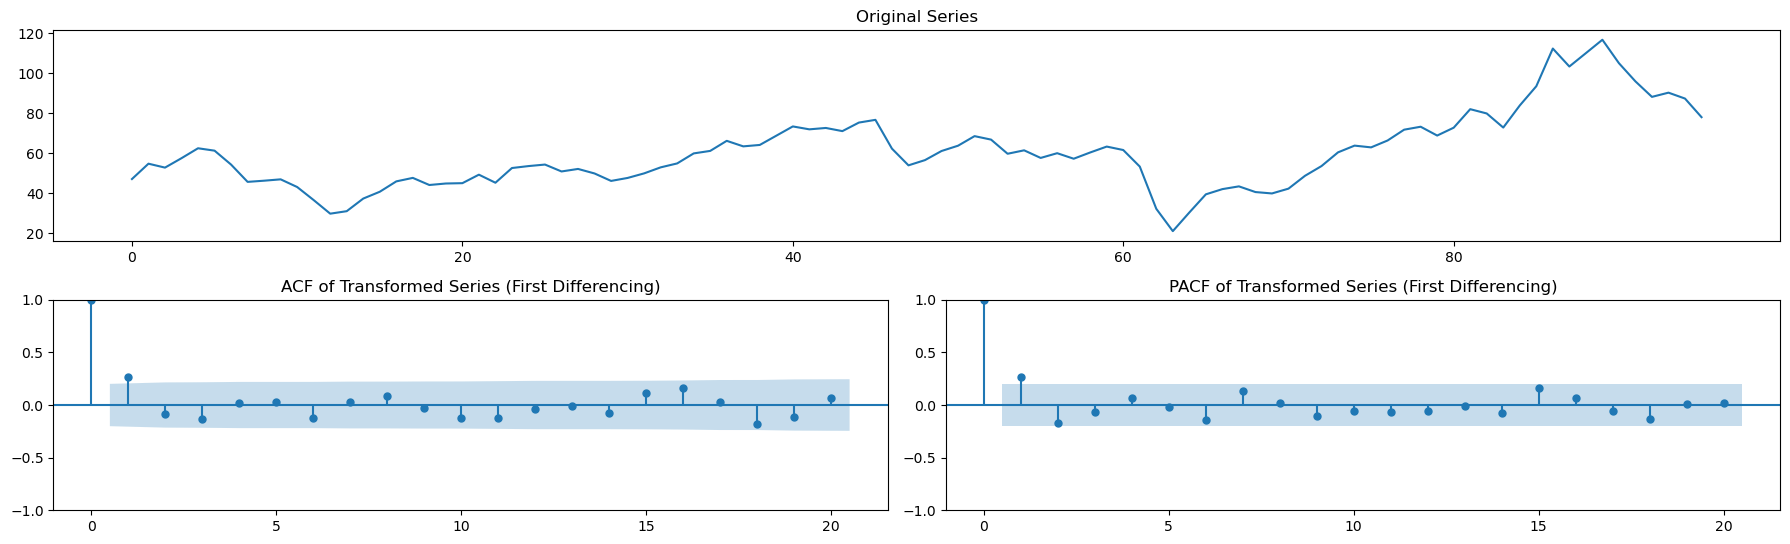

ADF P-Value (Second Difference of Log): 4.1196204035605385e-11


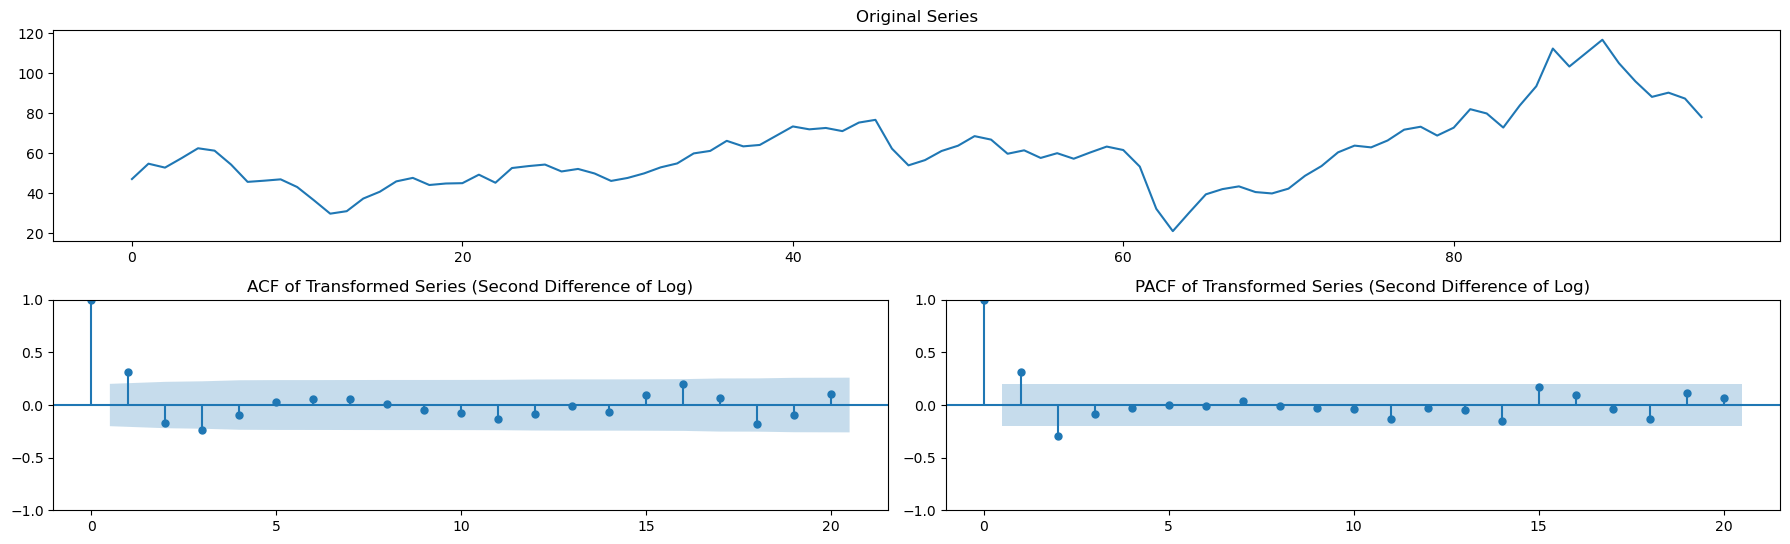



Column: CRUDE_BRENT
ADF P-Value (Log Transformation): 0.3517636495084894


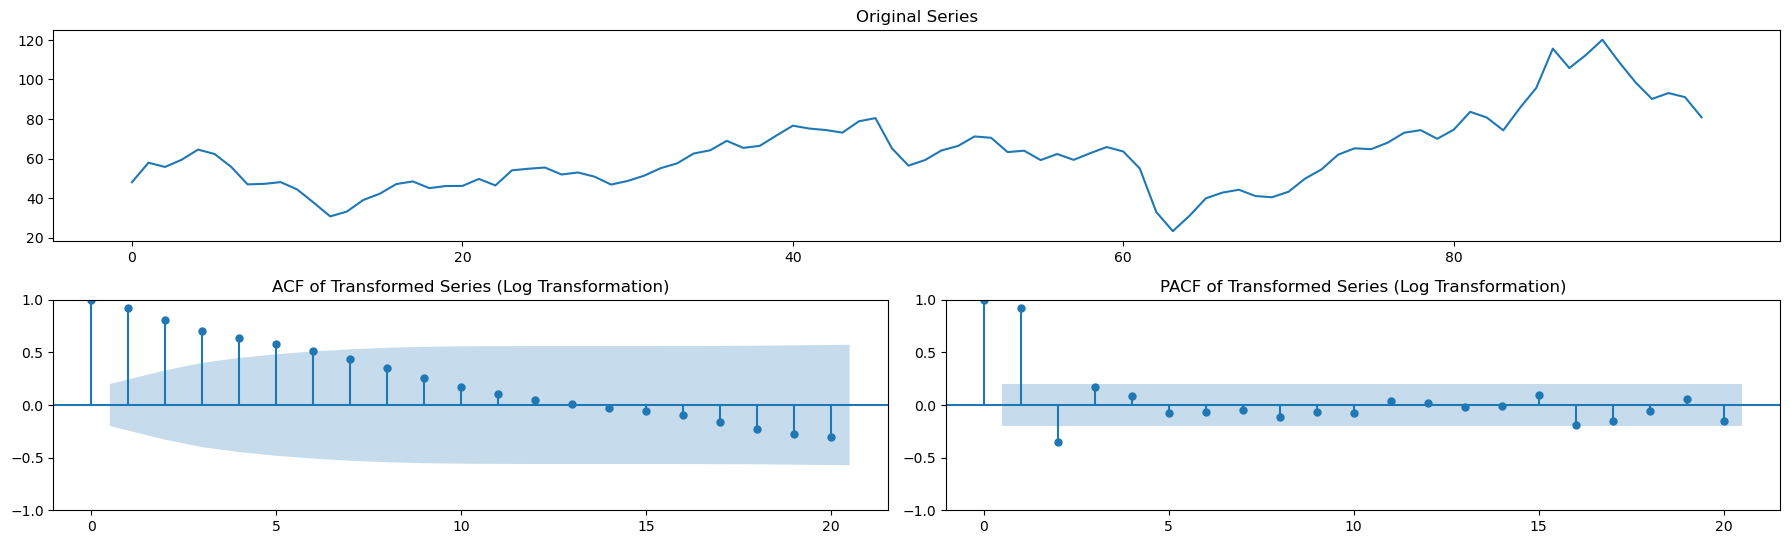

ADF P-Value (Square Root Transformation): 0.39642802494006657


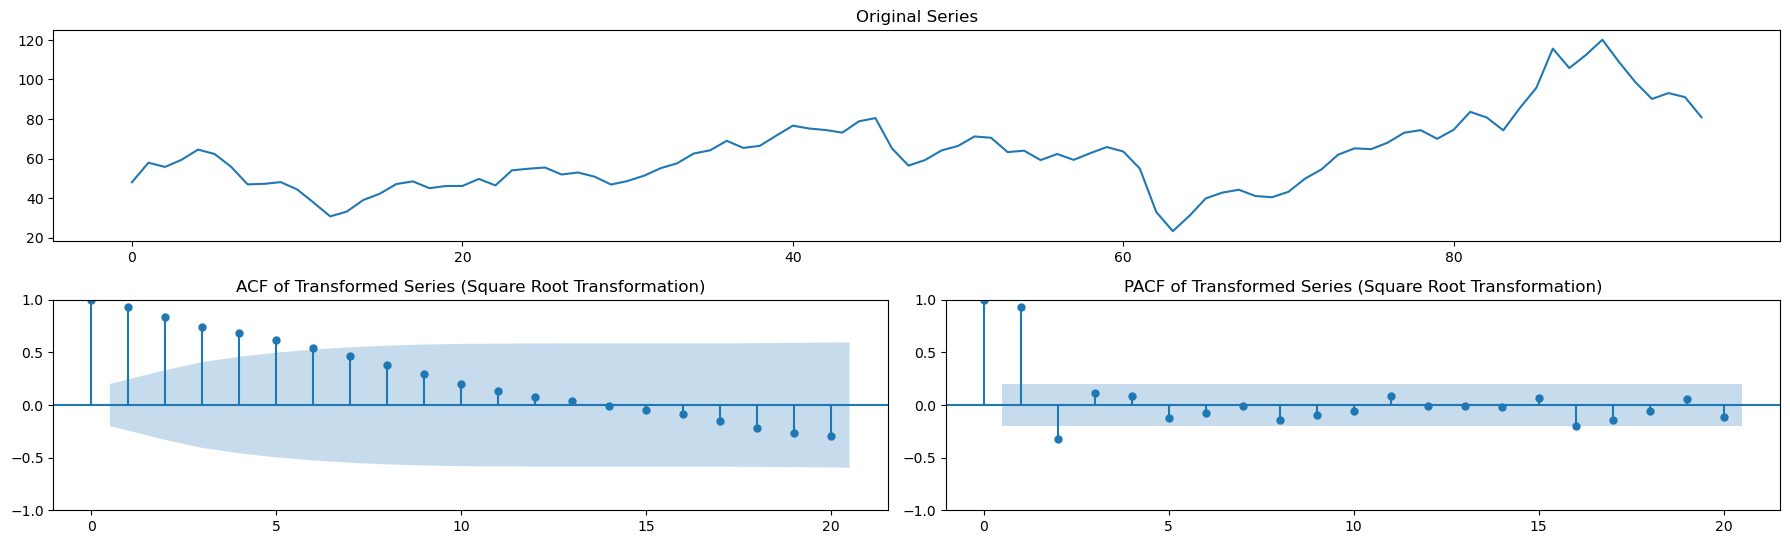

ADF P-Value (Box-Cox Transformation): 0.3651349220142109


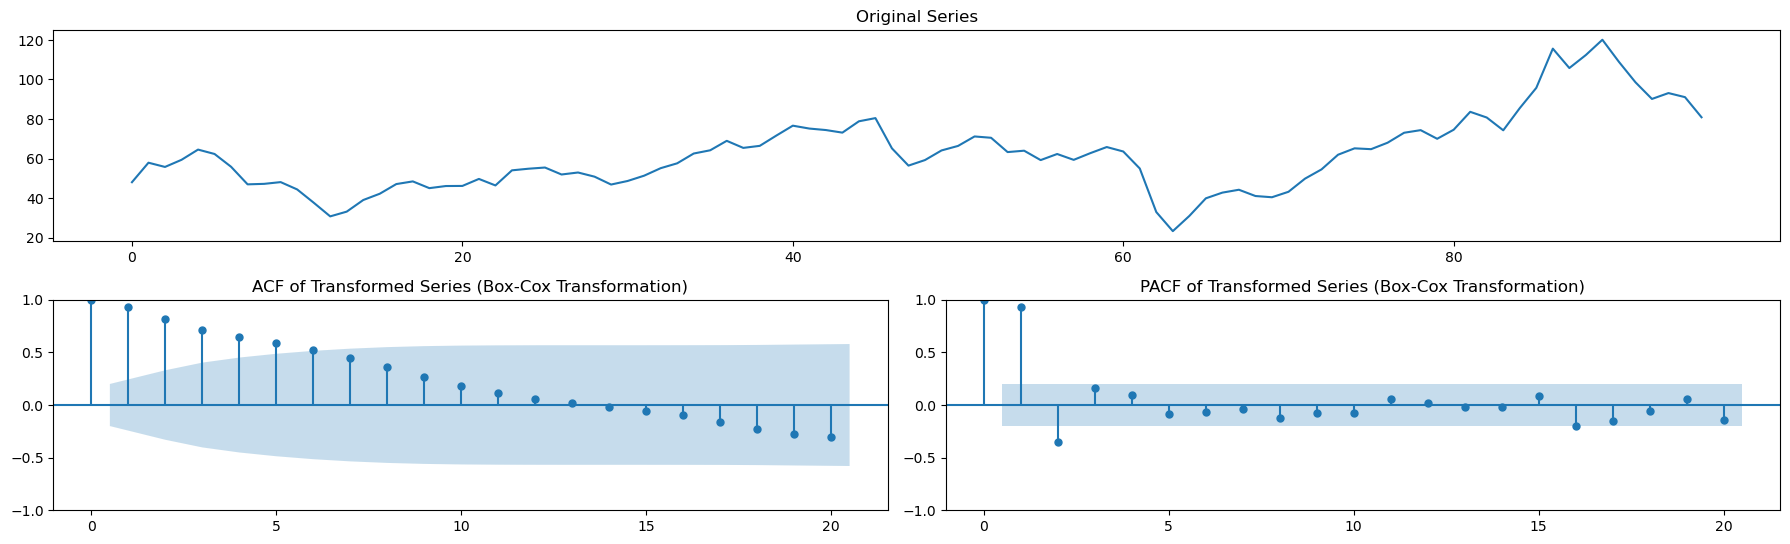

ADF P-Value (First Differencing): 3.30144599047954e-09


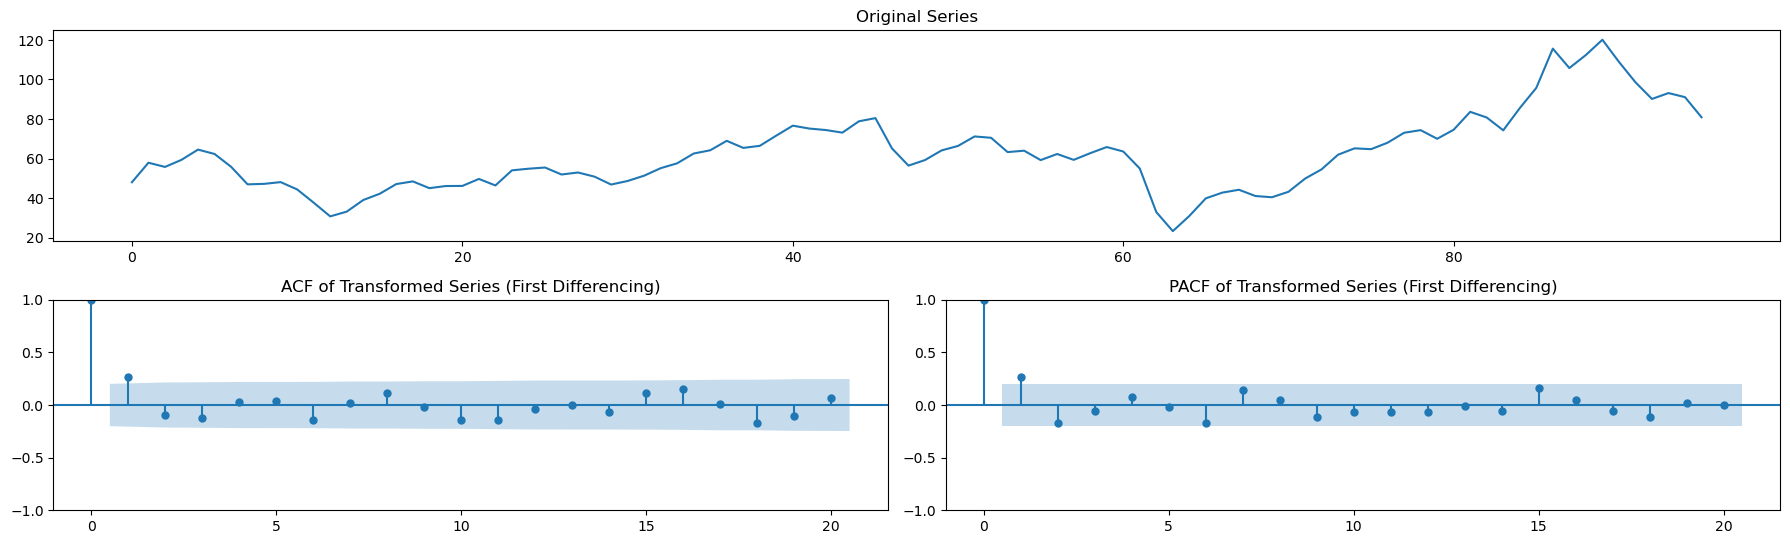

ADF P-Value (Second Difference of Log): 7.961231782282611e-11


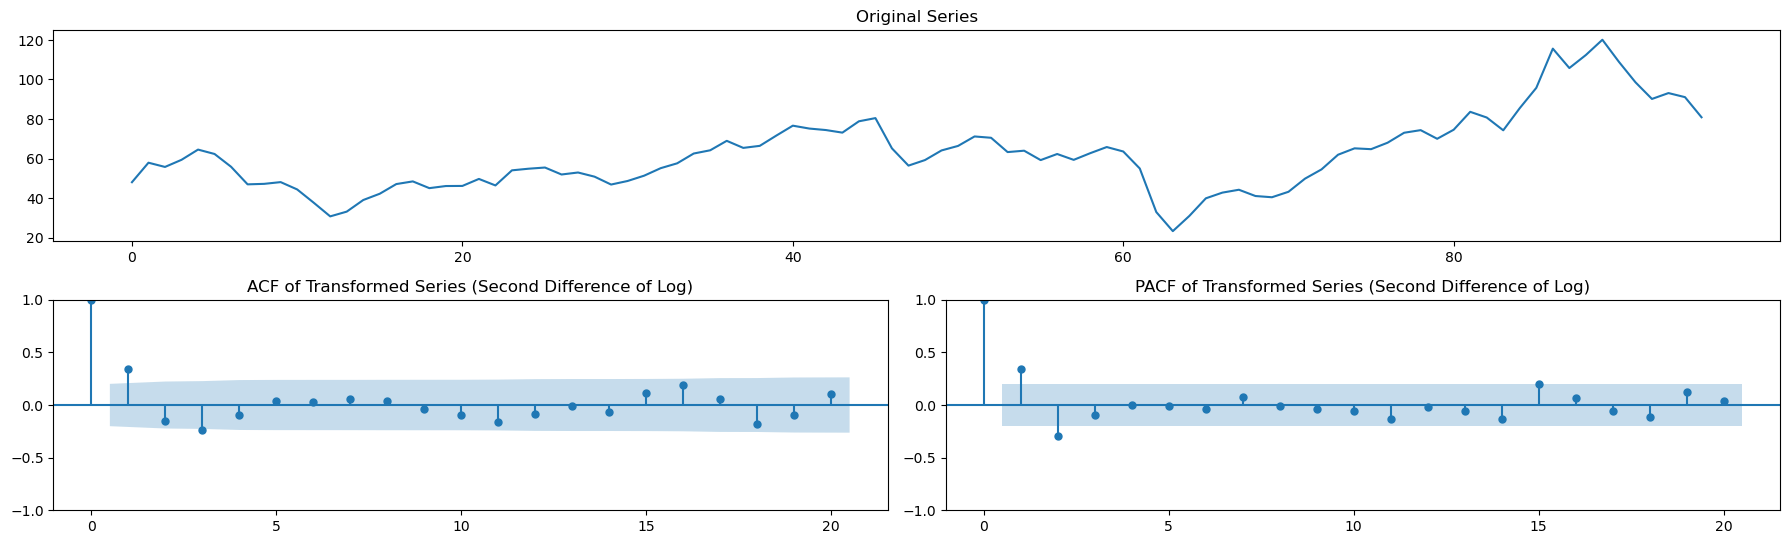



Column: CRUDE_DUBAI
ADF P-Value (Log Transformation): 0.3312449544454311


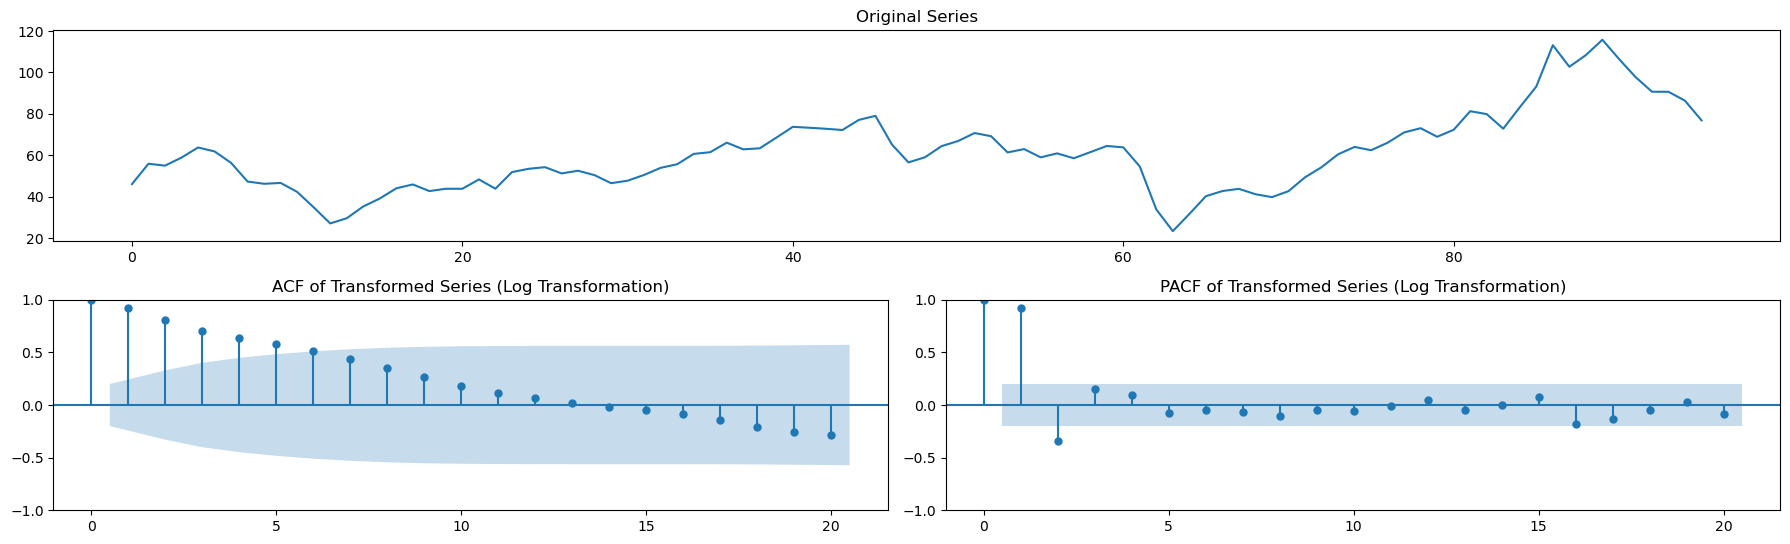

ADF P-Value (Square Root Transformation): 0.37743459515380745


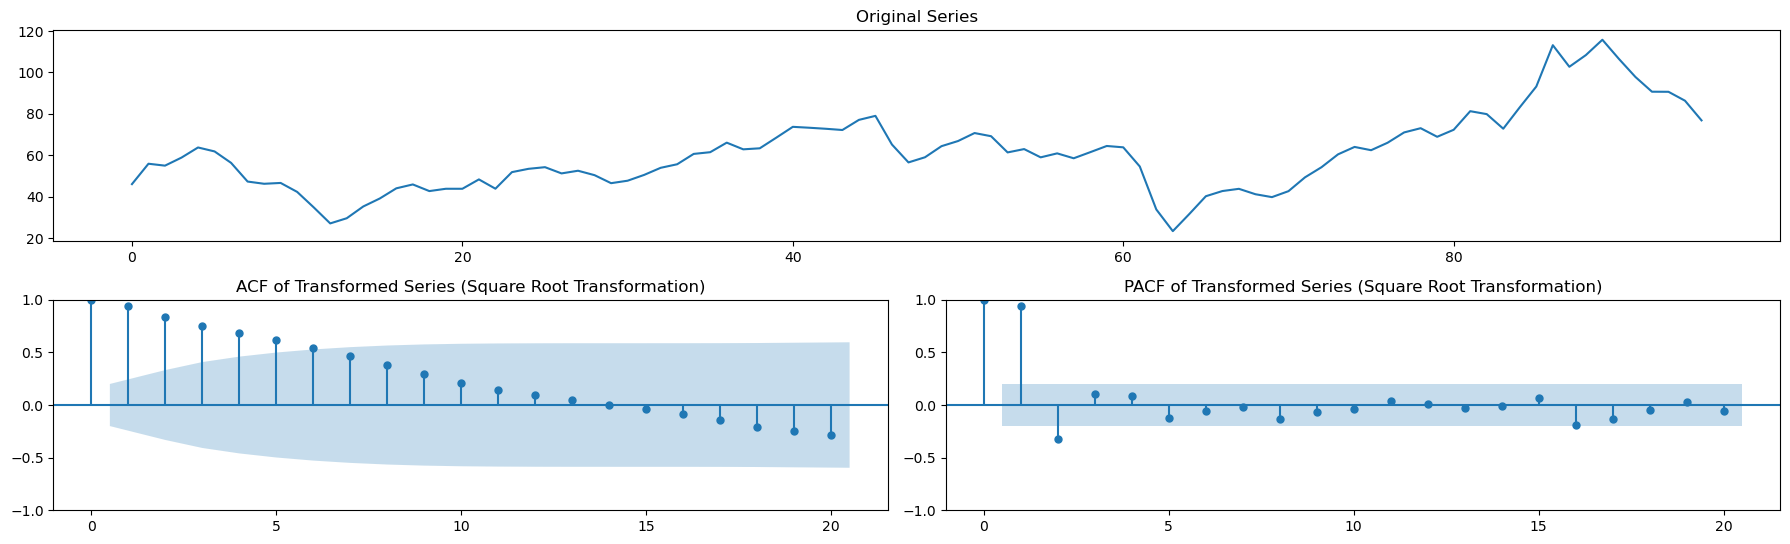

ADF P-Value (Box-Cox Transformation): 0.3523323436176484


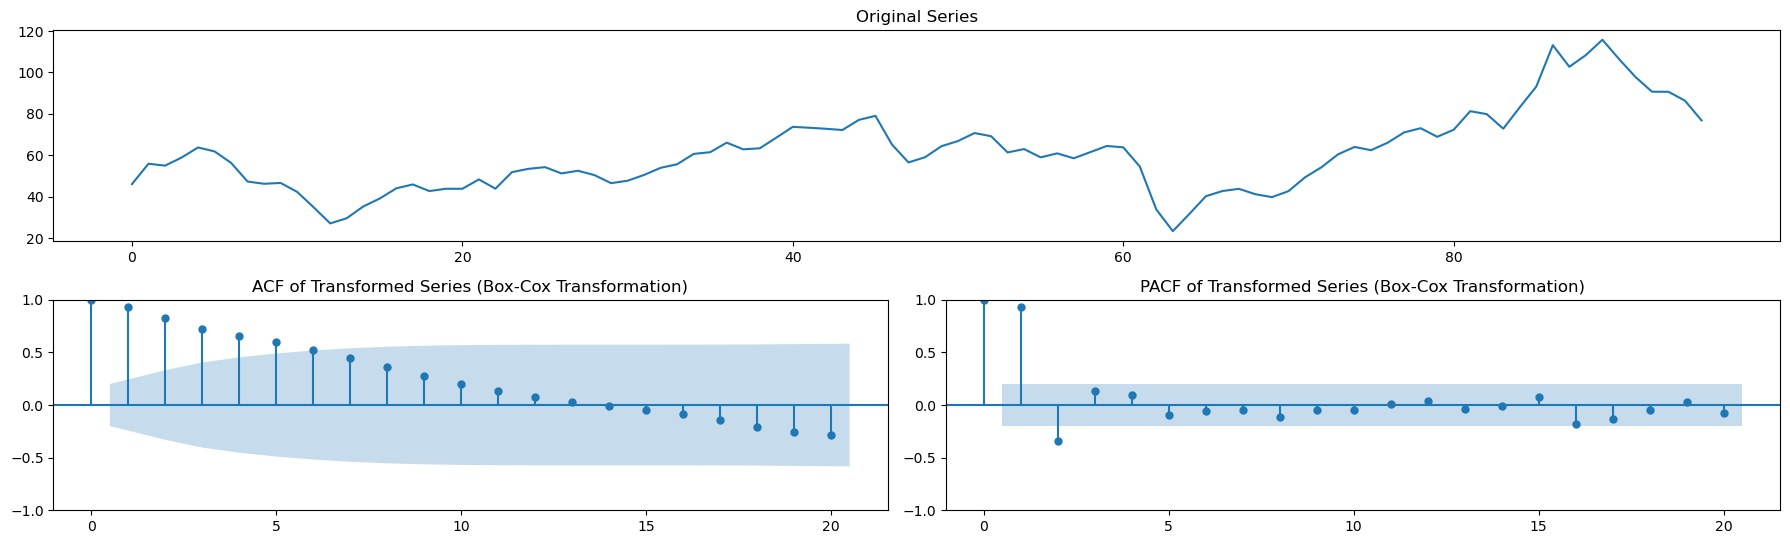

ADF P-Value (First Differencing): 7.3868373050672295e-09


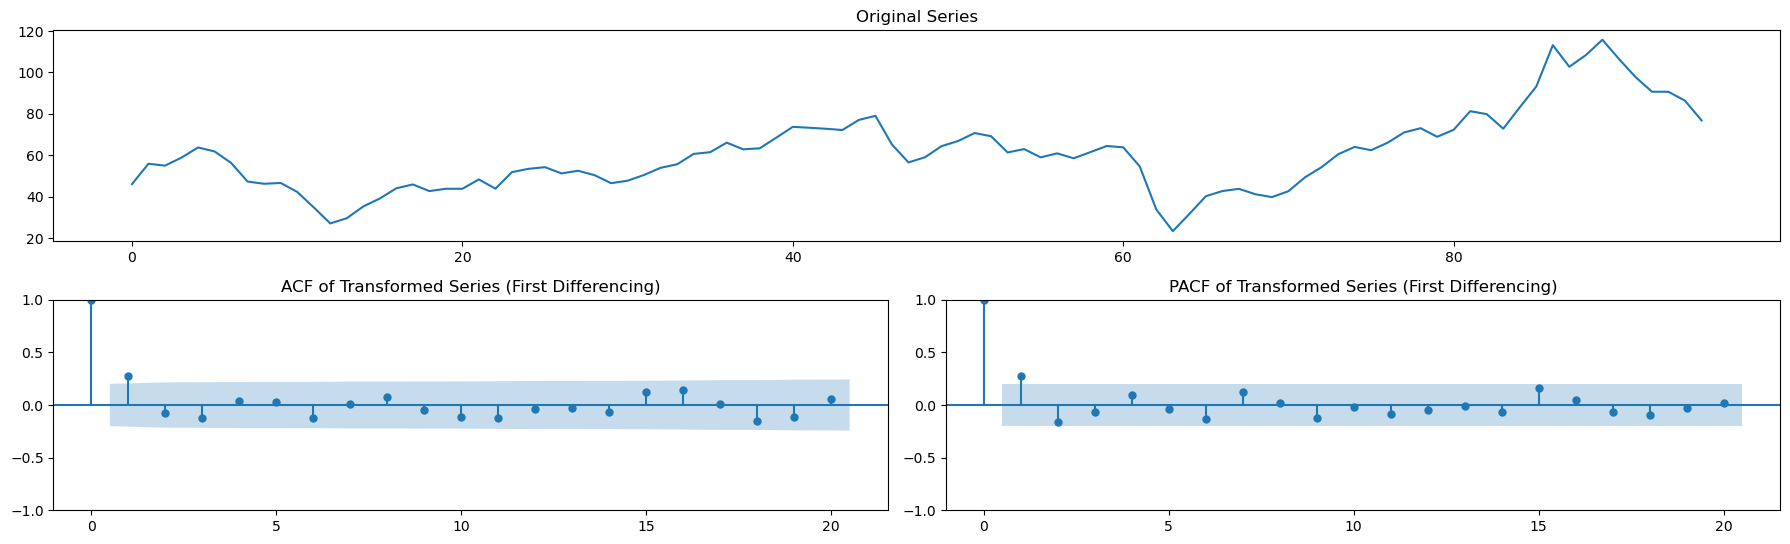

ADF P-Value (Second Difference of Log): 1.7886036473420189e-10


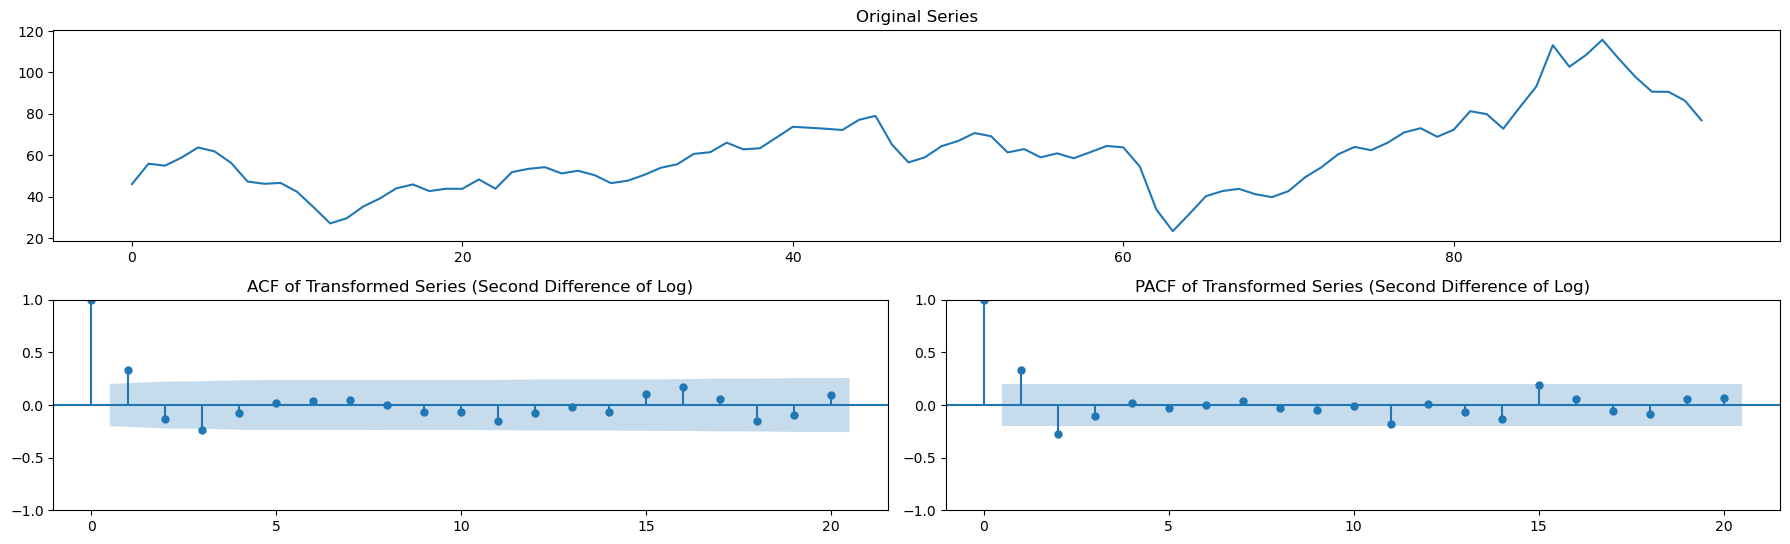



Column: CRUDE_WTI
ADF P-Value (Log Transformation): 0.2864875077649683


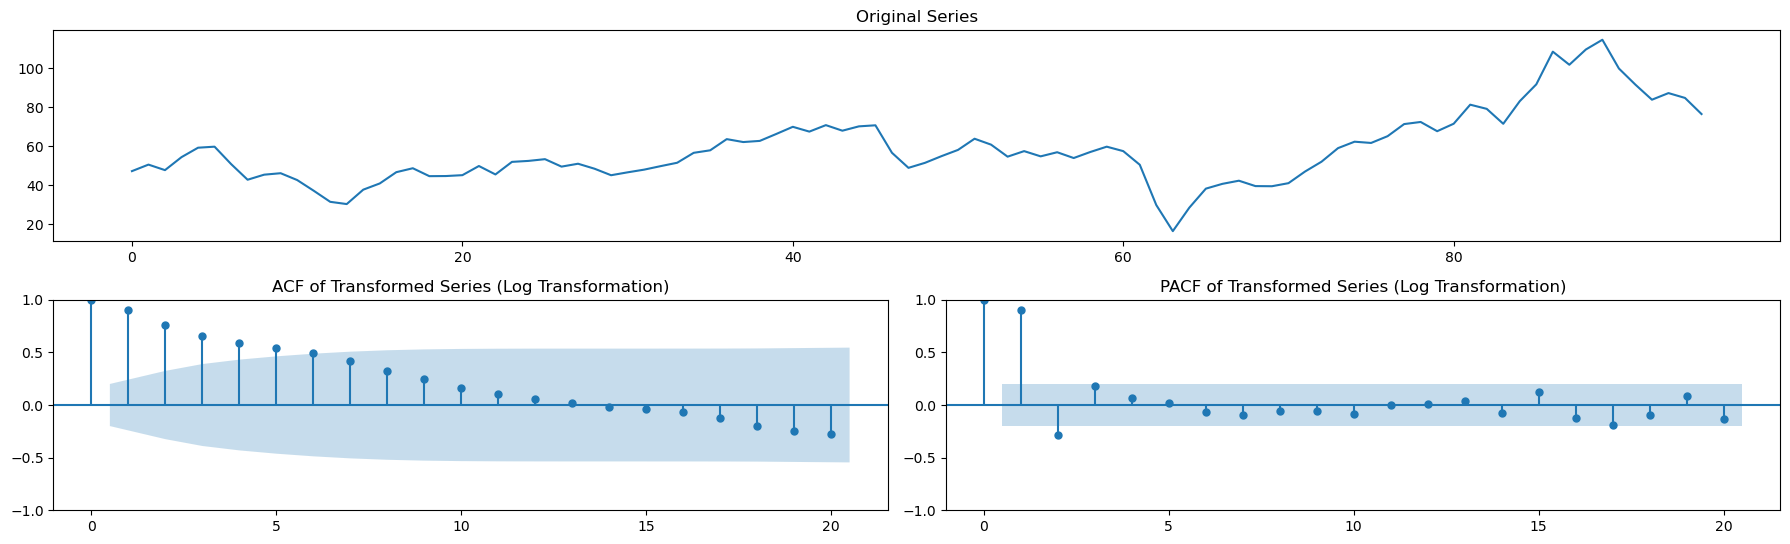

ADF P-Value (Square Root Transformation): 0.3768058347201301


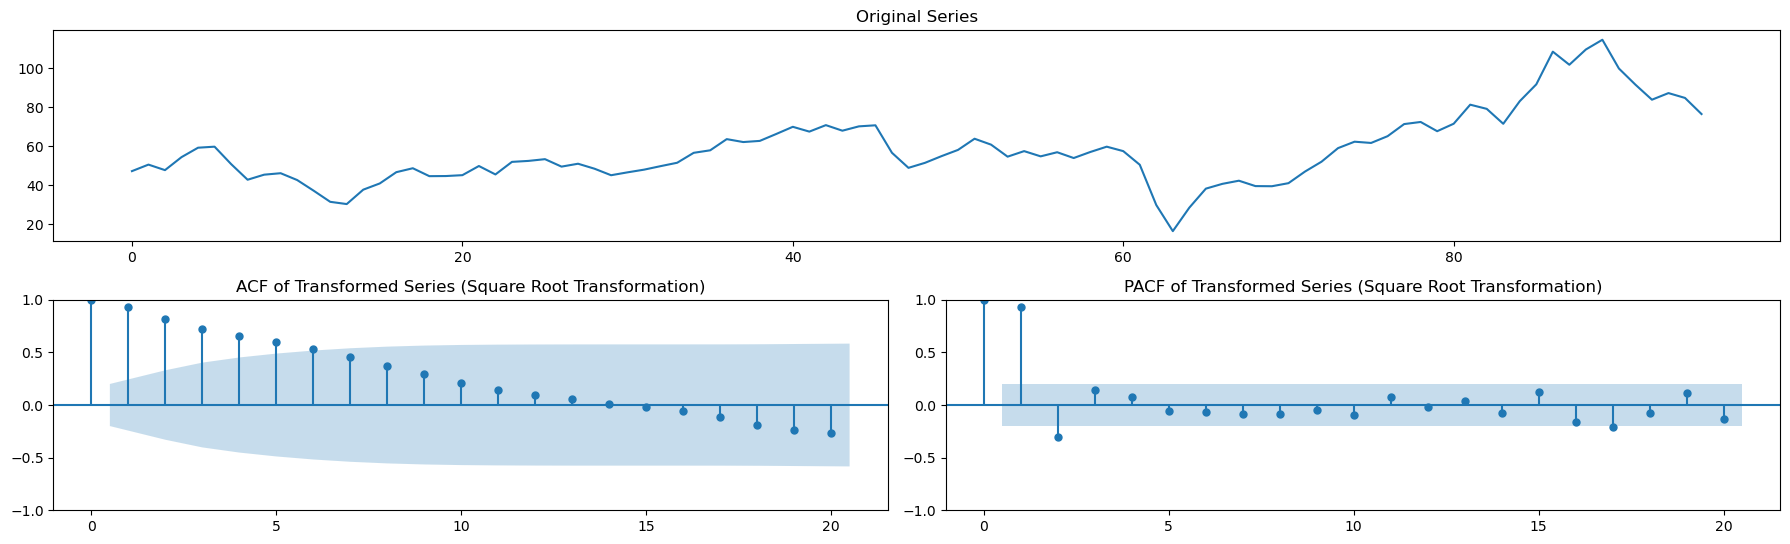

ADF P-Value (Box-Cox Transformation): 0.3370592328829608


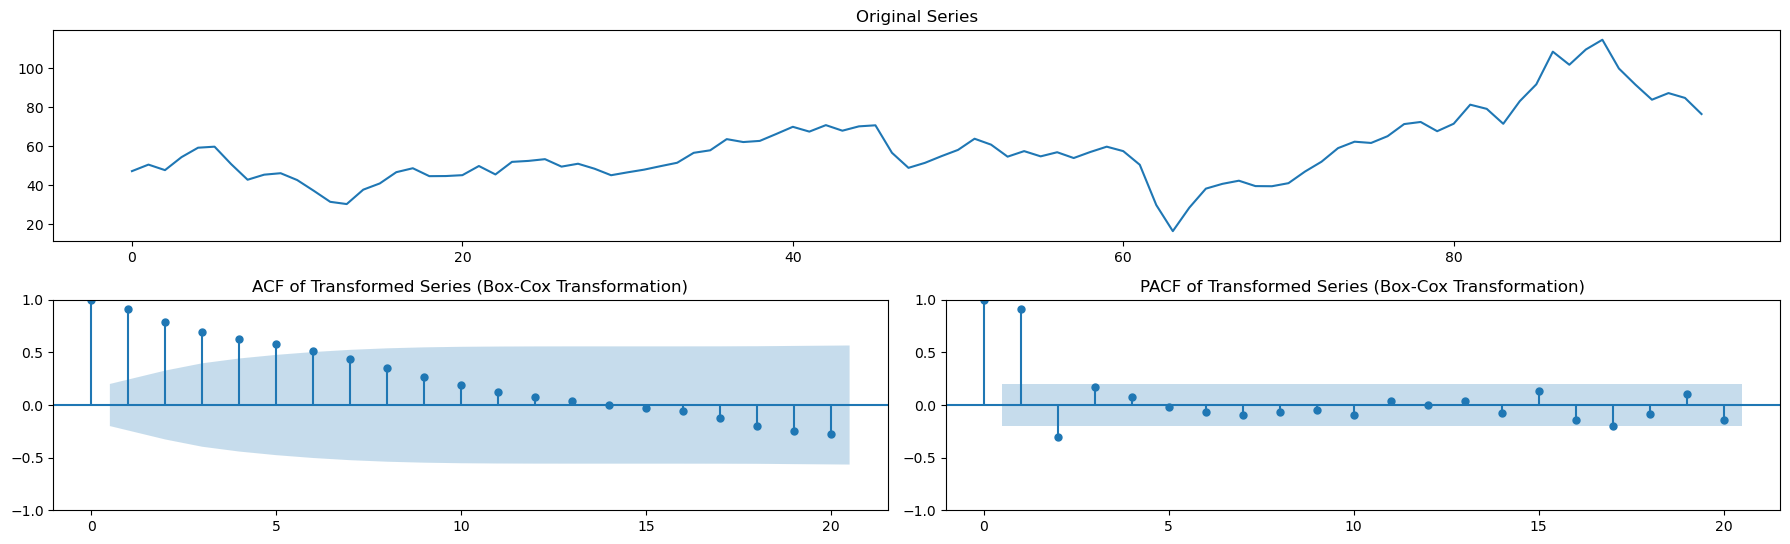

ADF P-Value (First Differencing): 1.935885110296795e-09


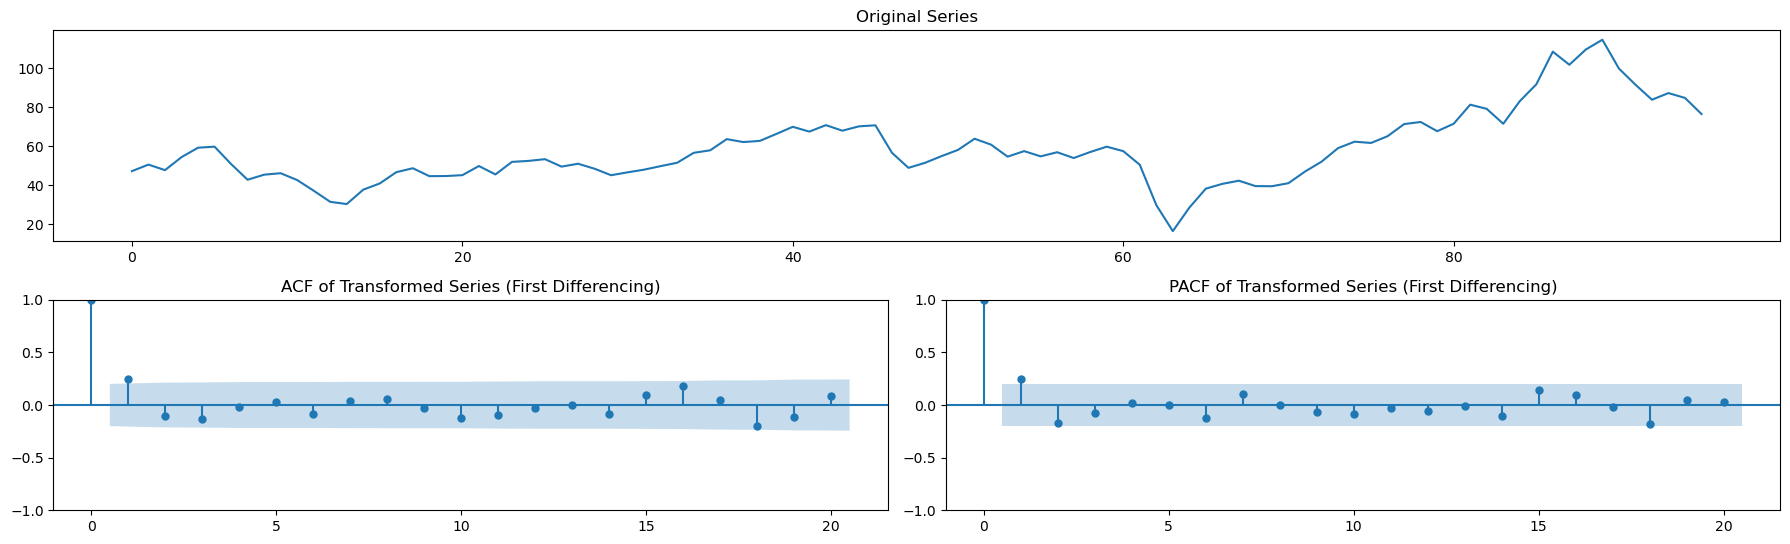

ADF P-Value (Second Difference of Log): 6.443978664620845e-12


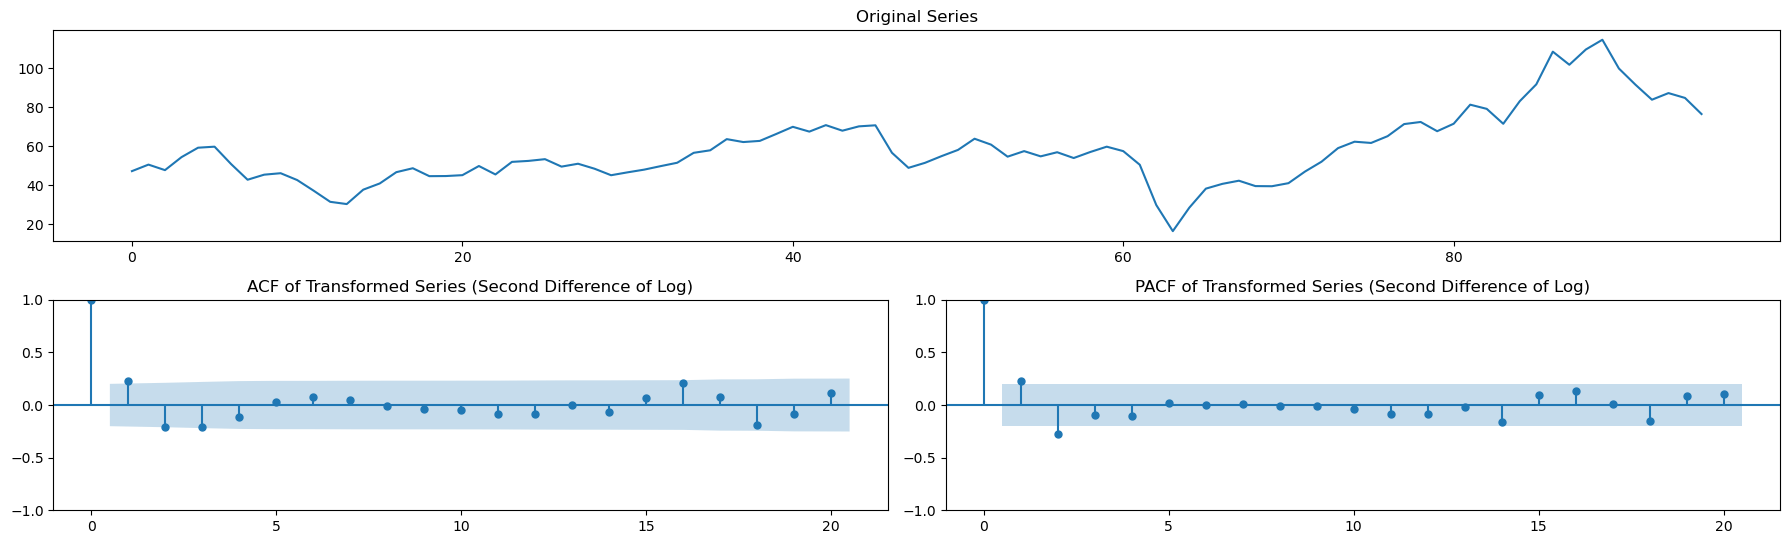



Column: NGAS_US
ADF P-Value (Log Transformation): 0.5719893088298992


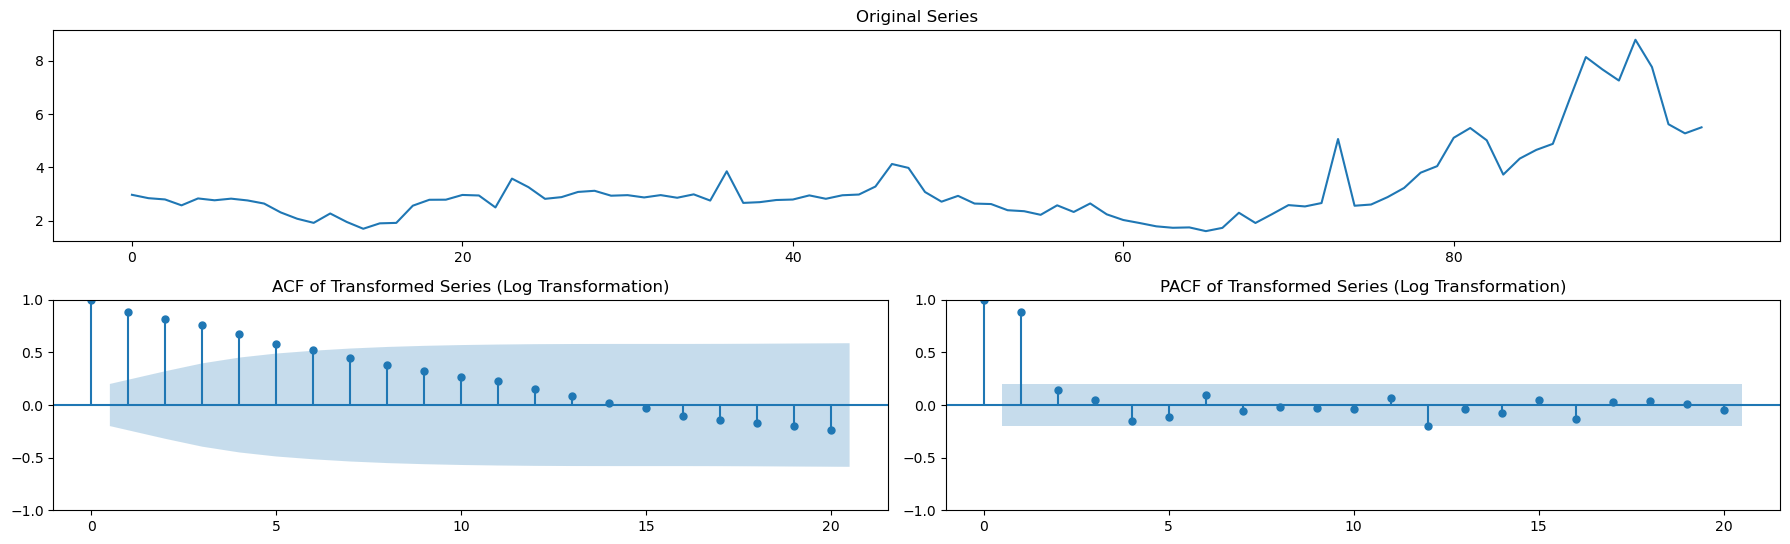

ADF P-Value (Square Root Transformation): 0.3537244313053066


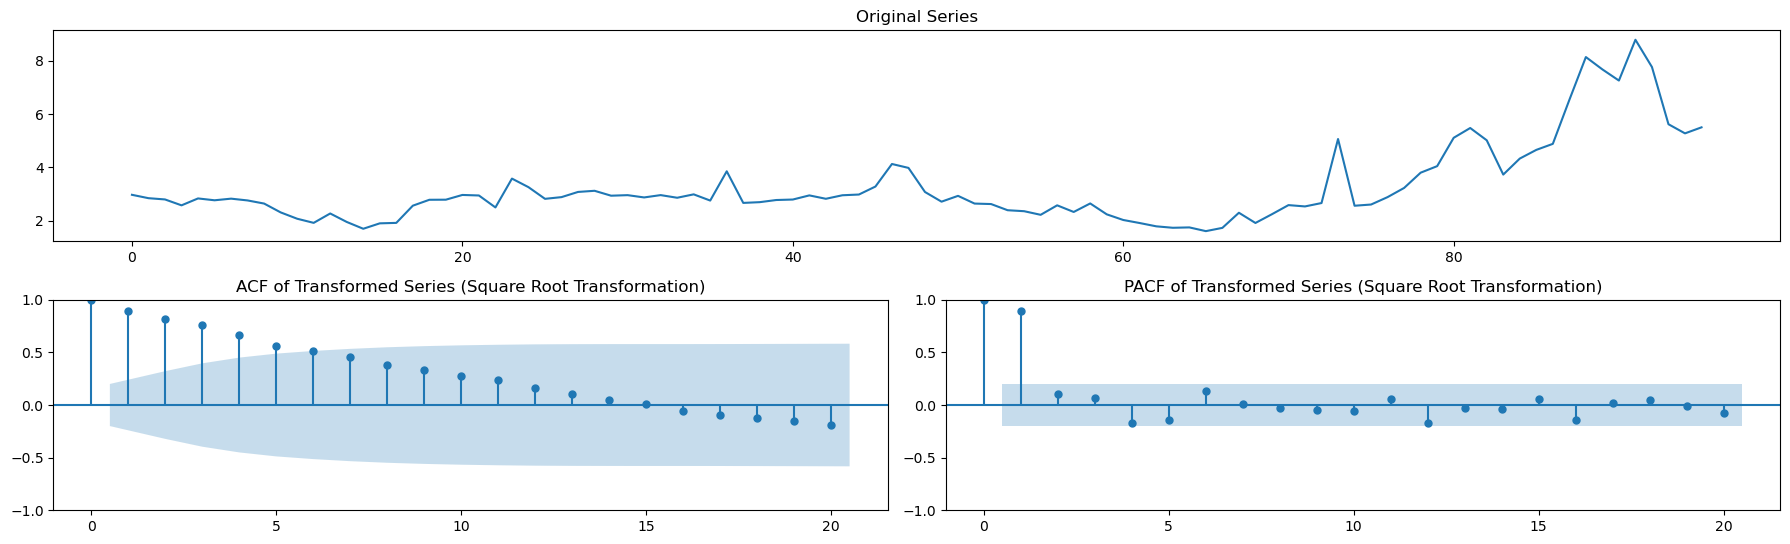

ADF P-Value (Box-Cox Transformation): 0.5214322121405184


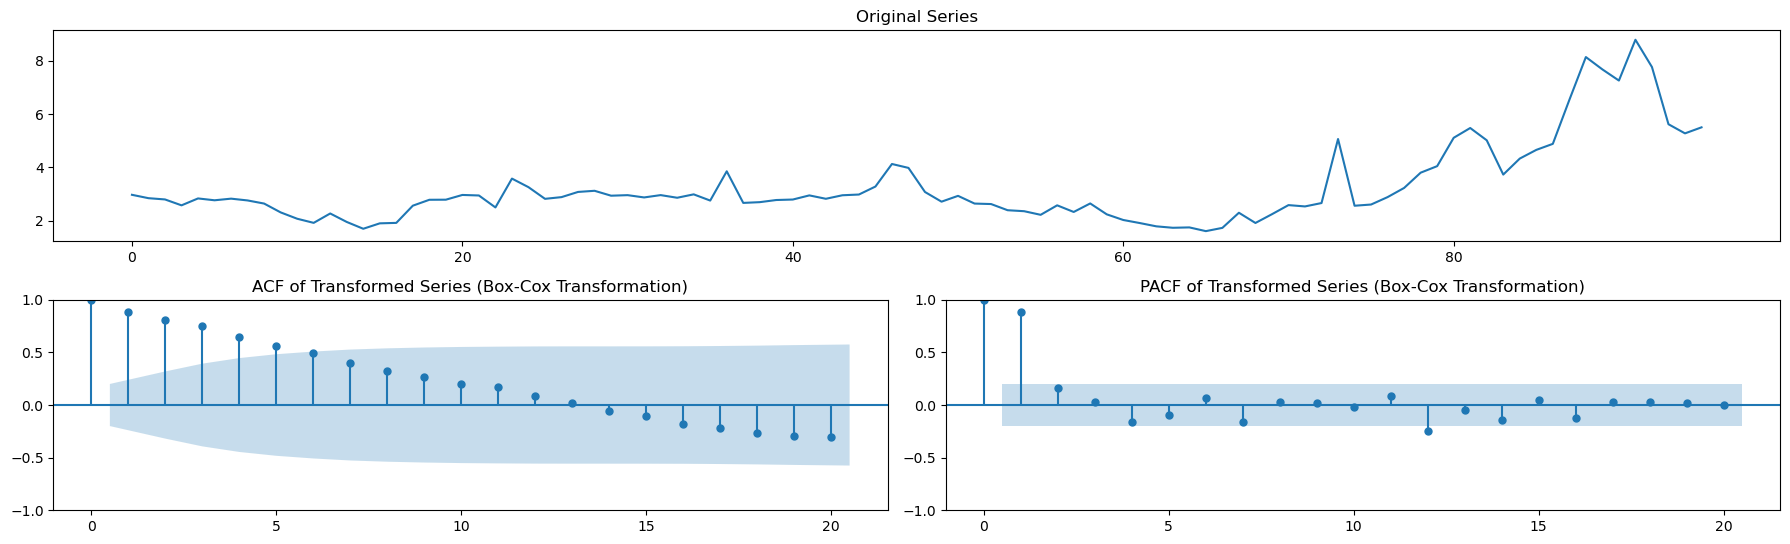

ADF P-Value (First Differencing): 1.225713332163924e-05


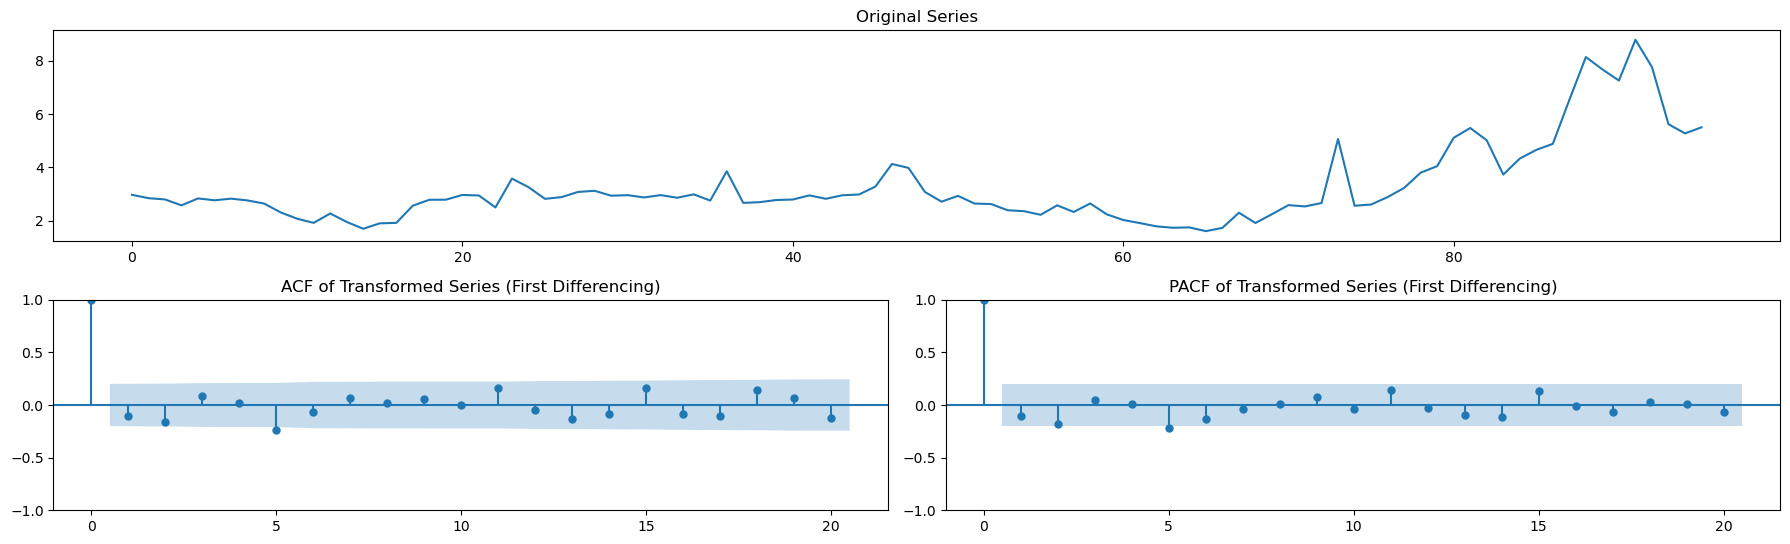

ADF P-Value (Second Difference of Log): 6.608002006702912e-22


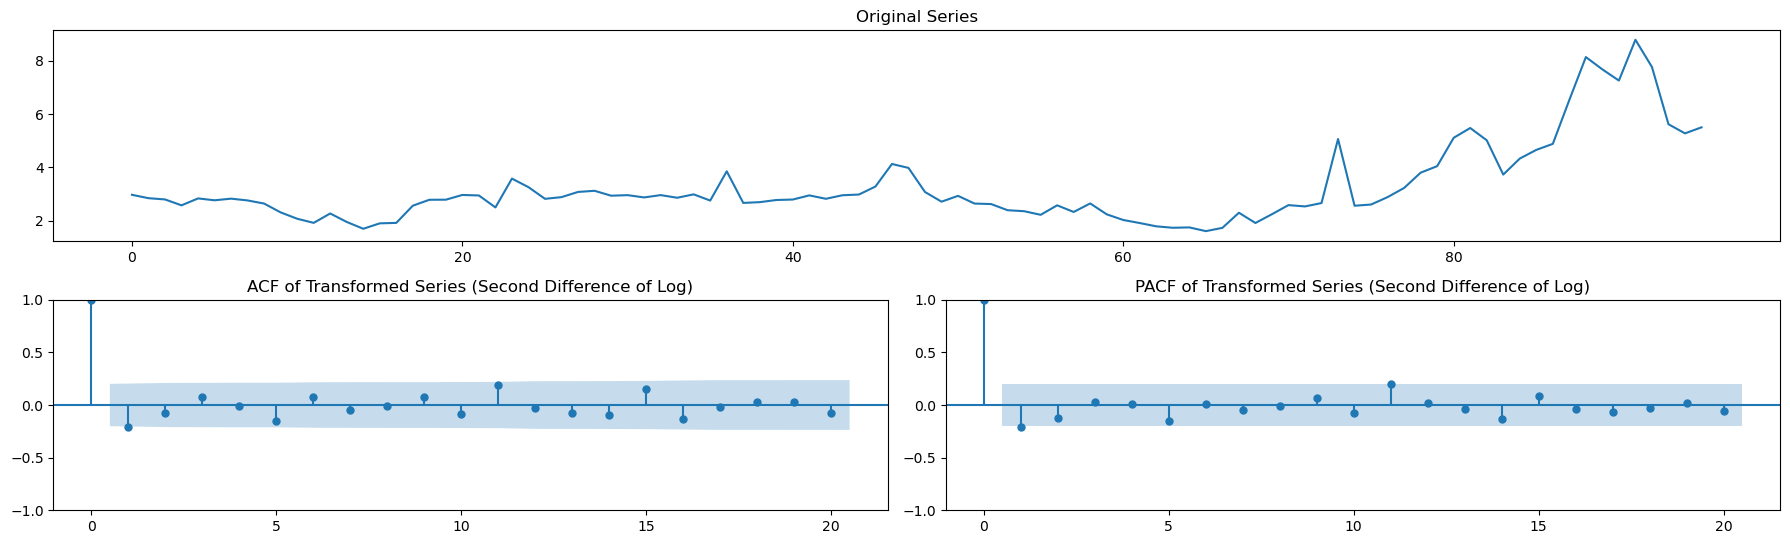



Column: NGAS_EUR
ADF P-Value (Log Transformation): 0.0048531074719230845


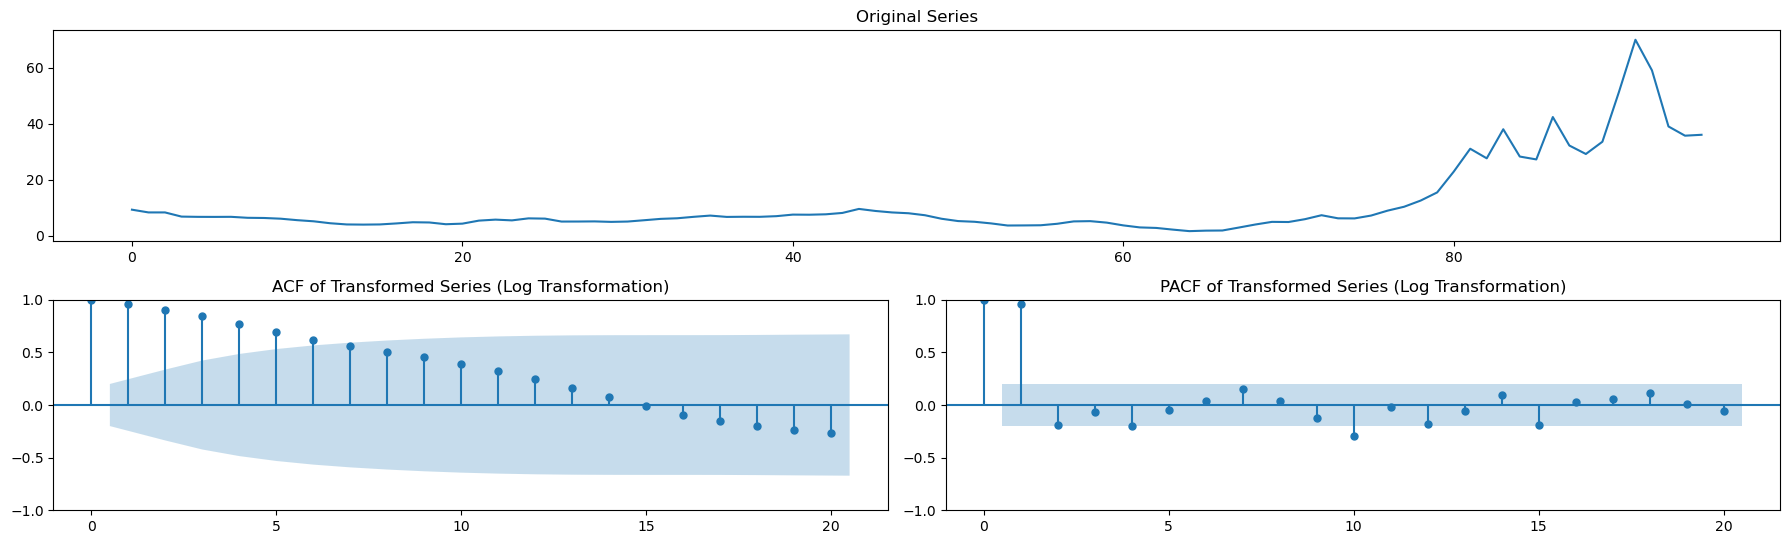

ADF P-Value (Square Root Transformation): 3.956590635309189e-07


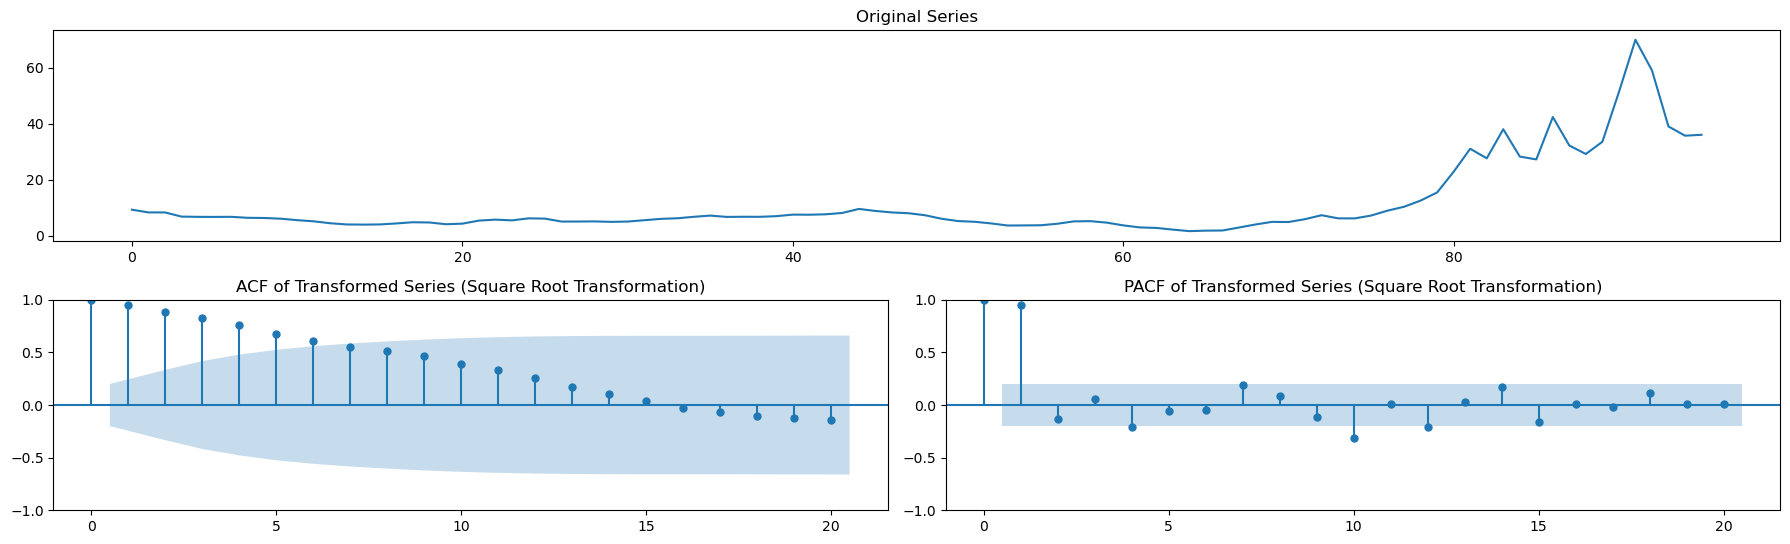

ADF P-Value (Box-Cox Transformation): 0.5150280719924629


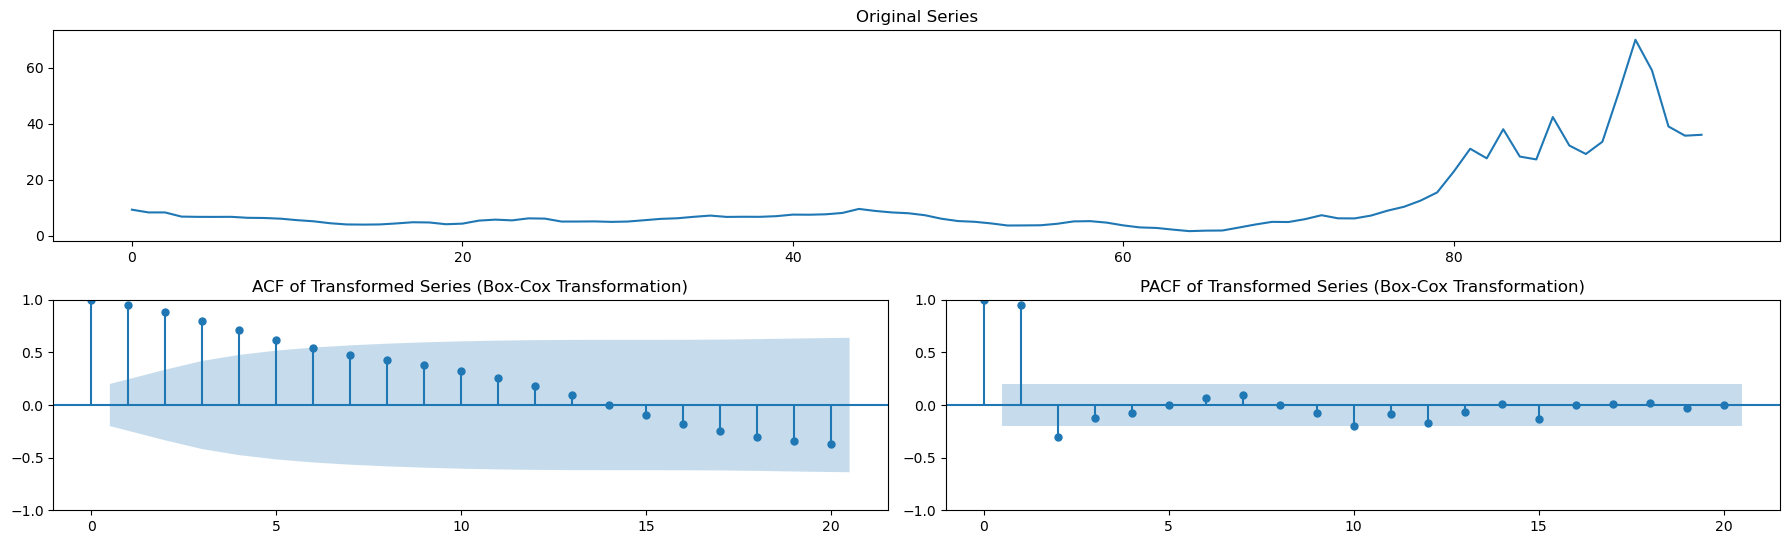

ADF P-Value (First Differencing): 0.0831190651216362


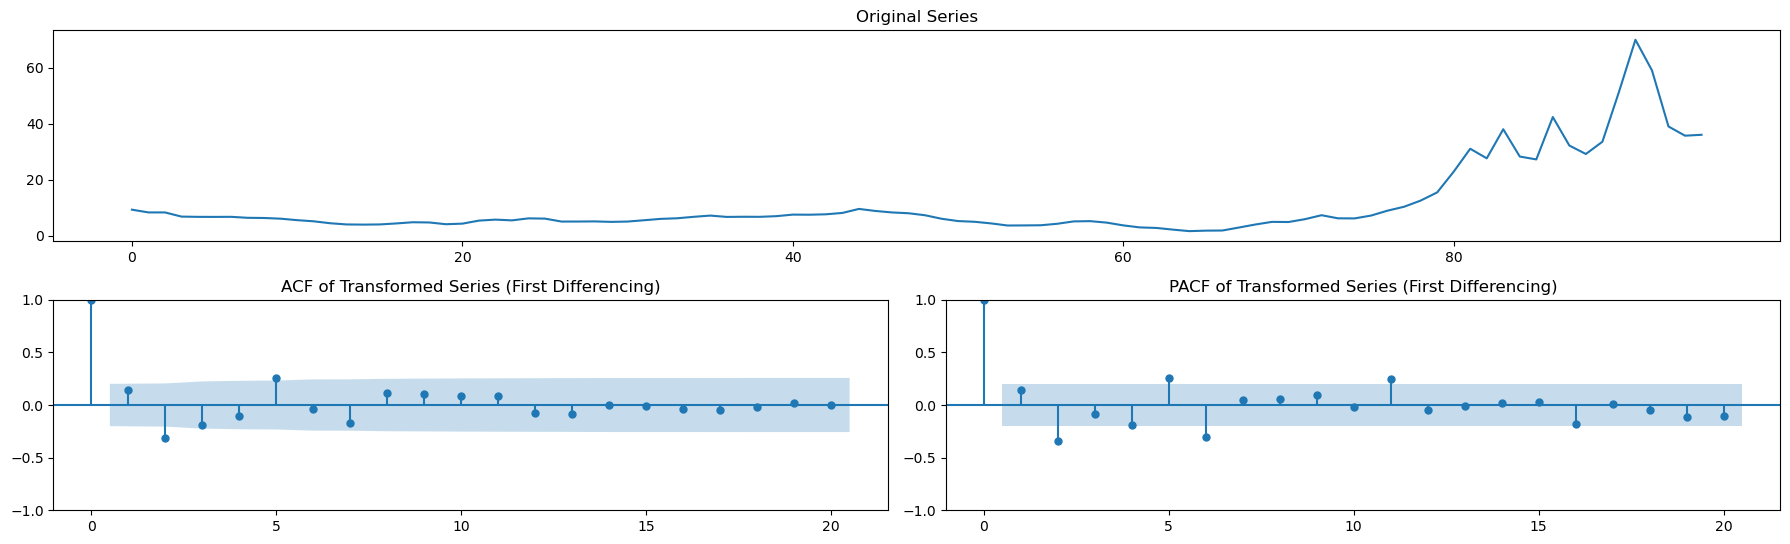

ADF P-Value (Second Difference of Log): 0.3464479015324368


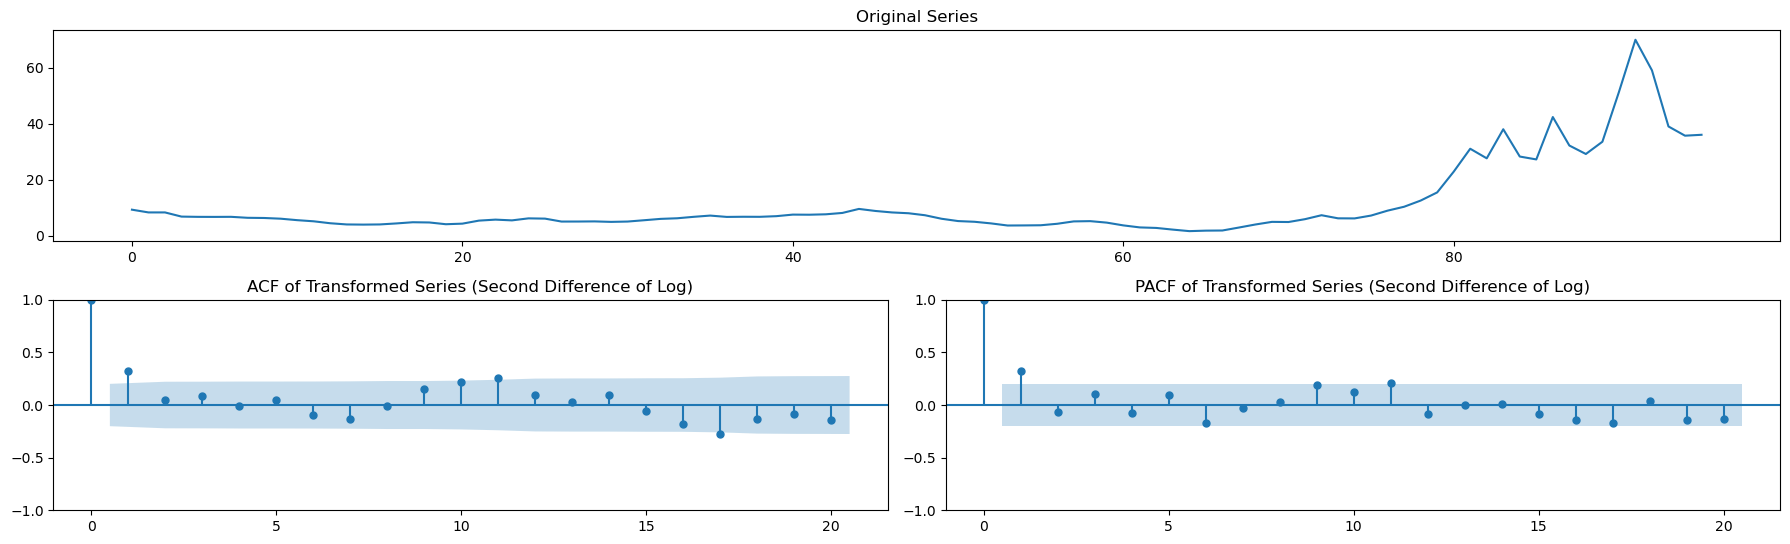



Column: NGAS_JP
ADF P-Value (Log Transformation): 0.6507412656058414


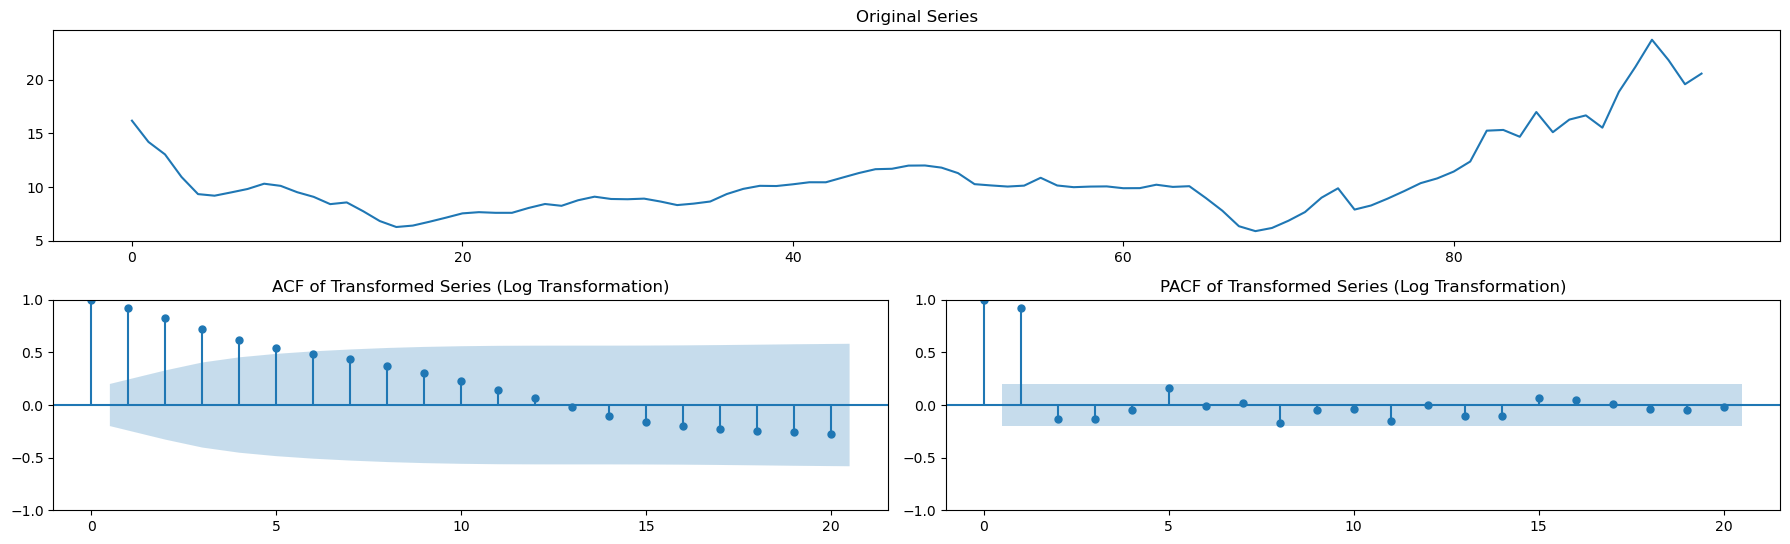

ADF P-Value (Square Root Transformation): 0.721183387047215


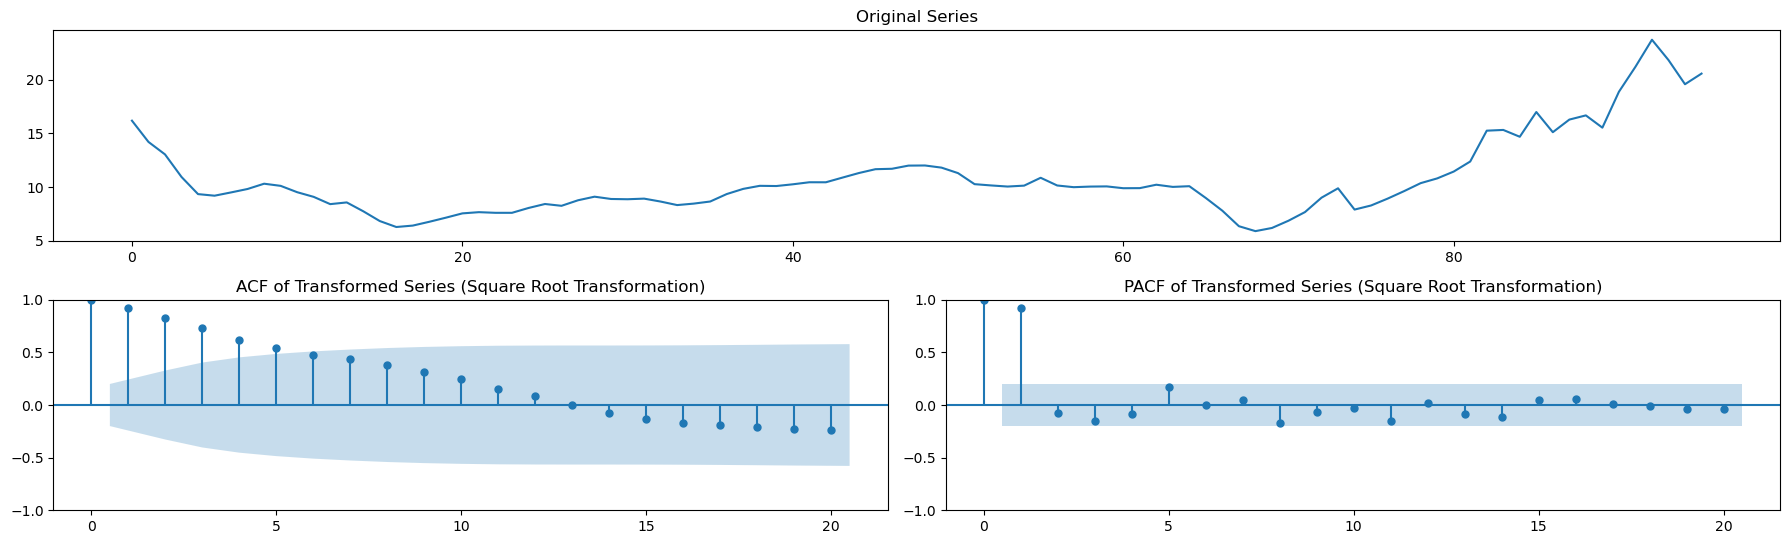

ADF P-Value (Box-Cox Transformation): 0.2657499127639189


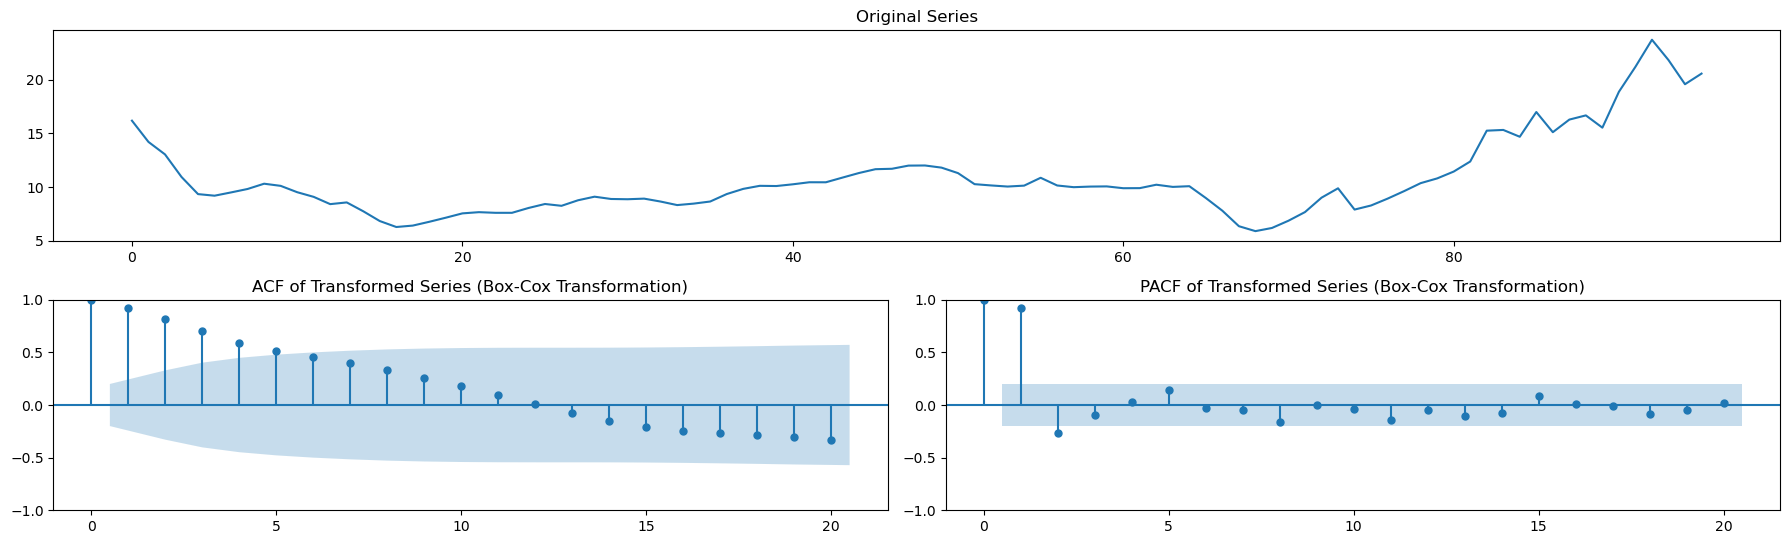

ADF P-Value (First Differencing): 0.3014054668594963


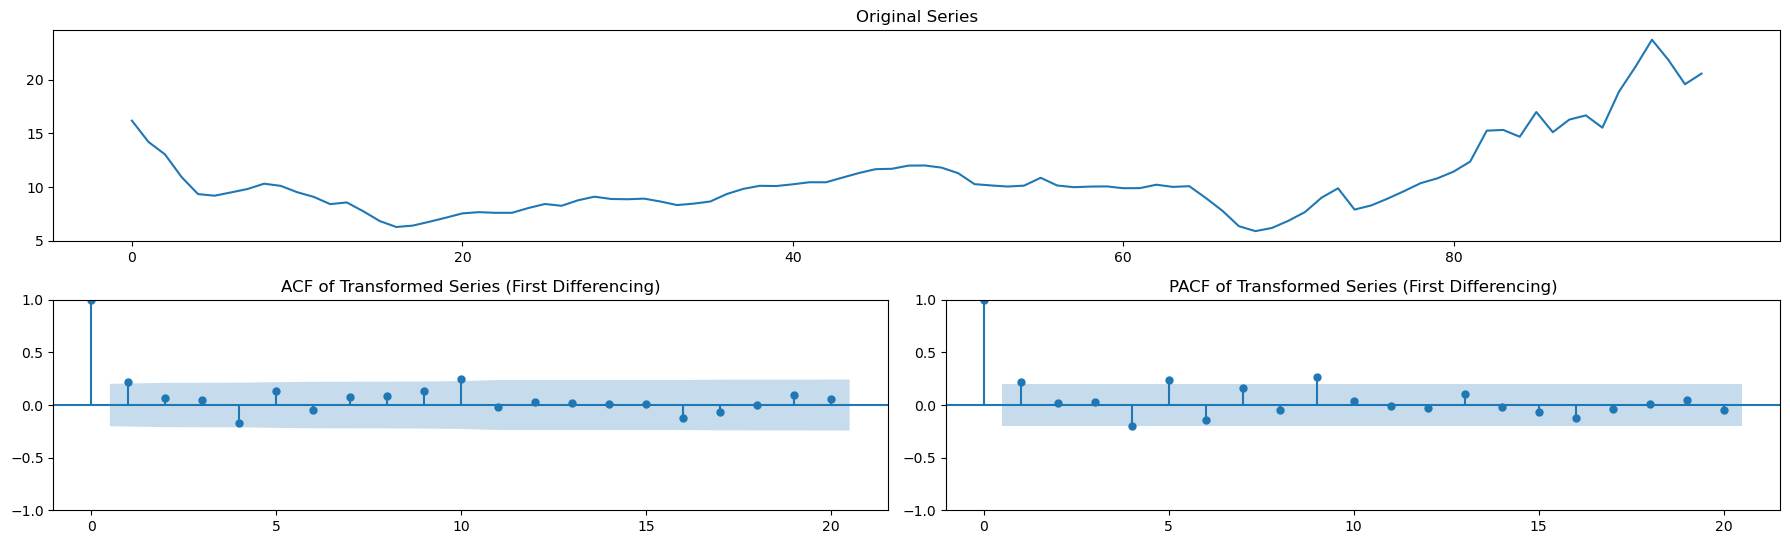

ADF P-Value (Second Difference of Log): 0.1639249068774437


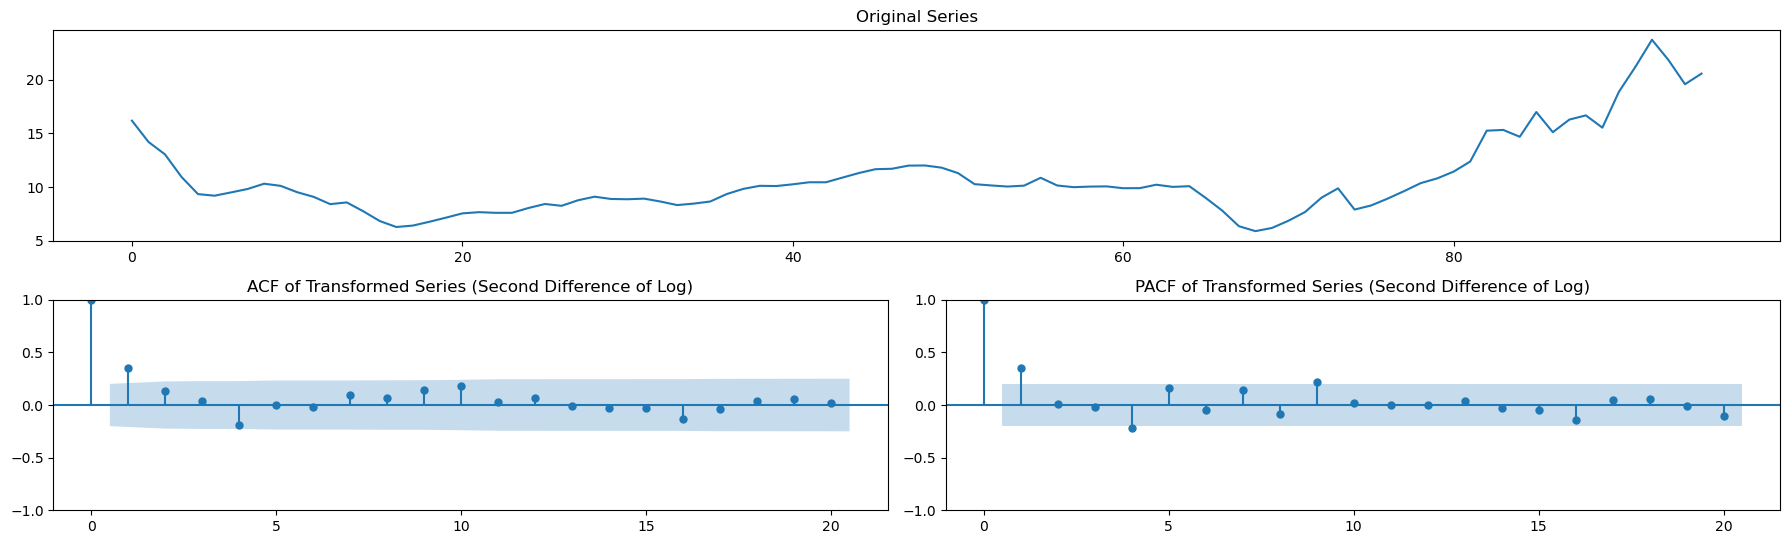



Column: iNATGAS
ADF P-Value (Log Transformation): 0.027971609408645463


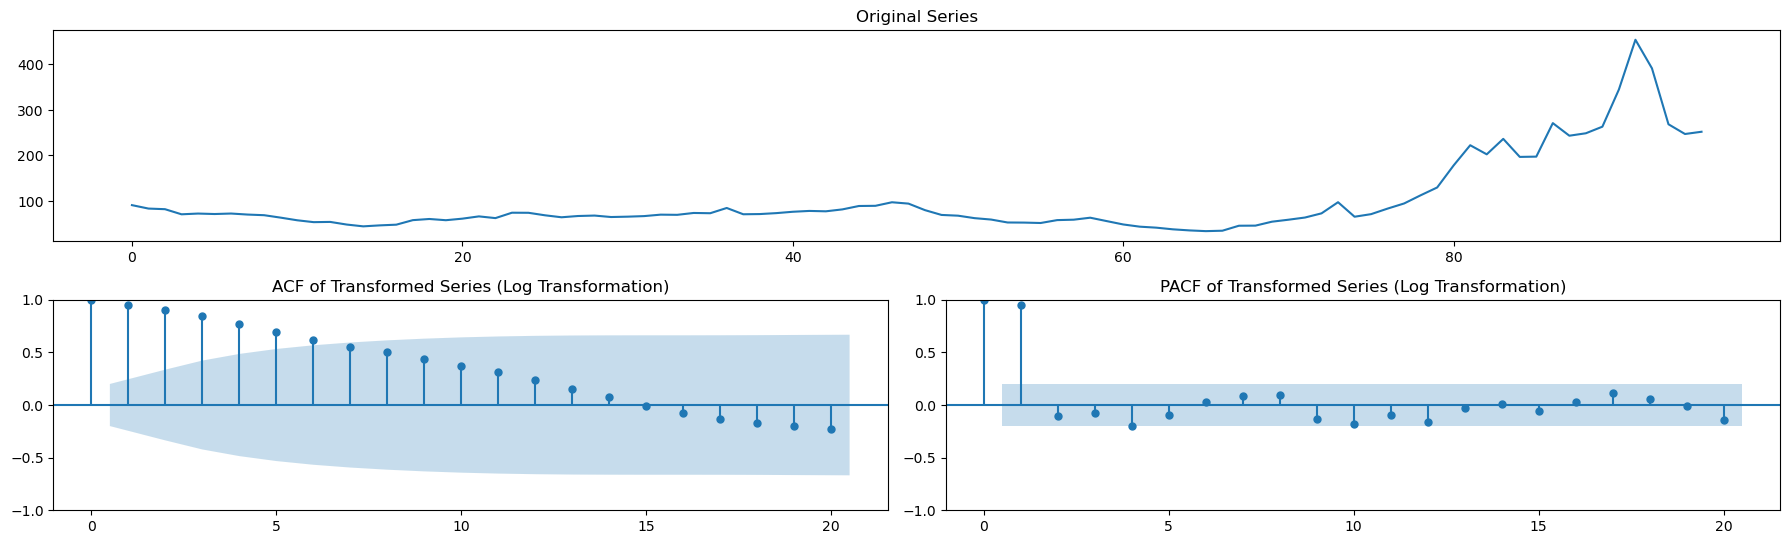

ADF P-Value (Square Root Transformation): 0.0030243856624349343


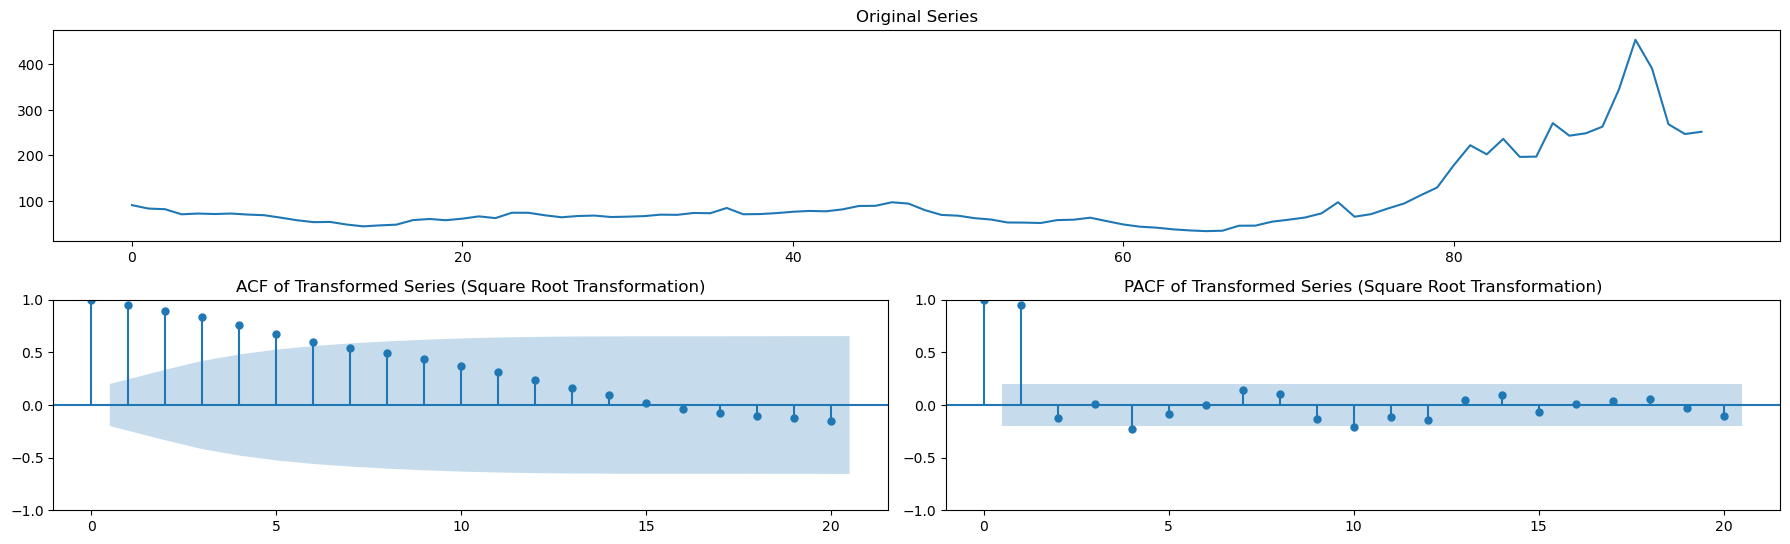

ADF P-Value (Box-Cox Transformation): 0.06794274398449184


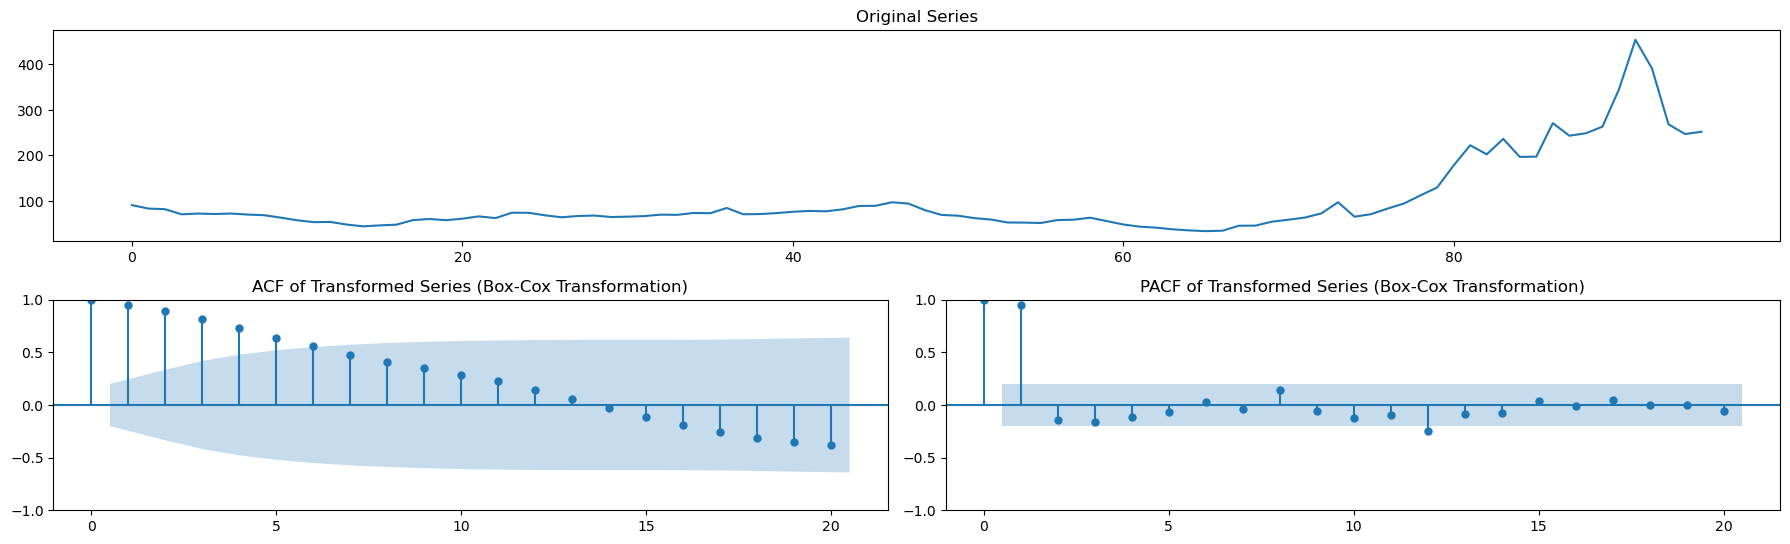

ADF P-Value (First Differencing): 0.5327039925765178


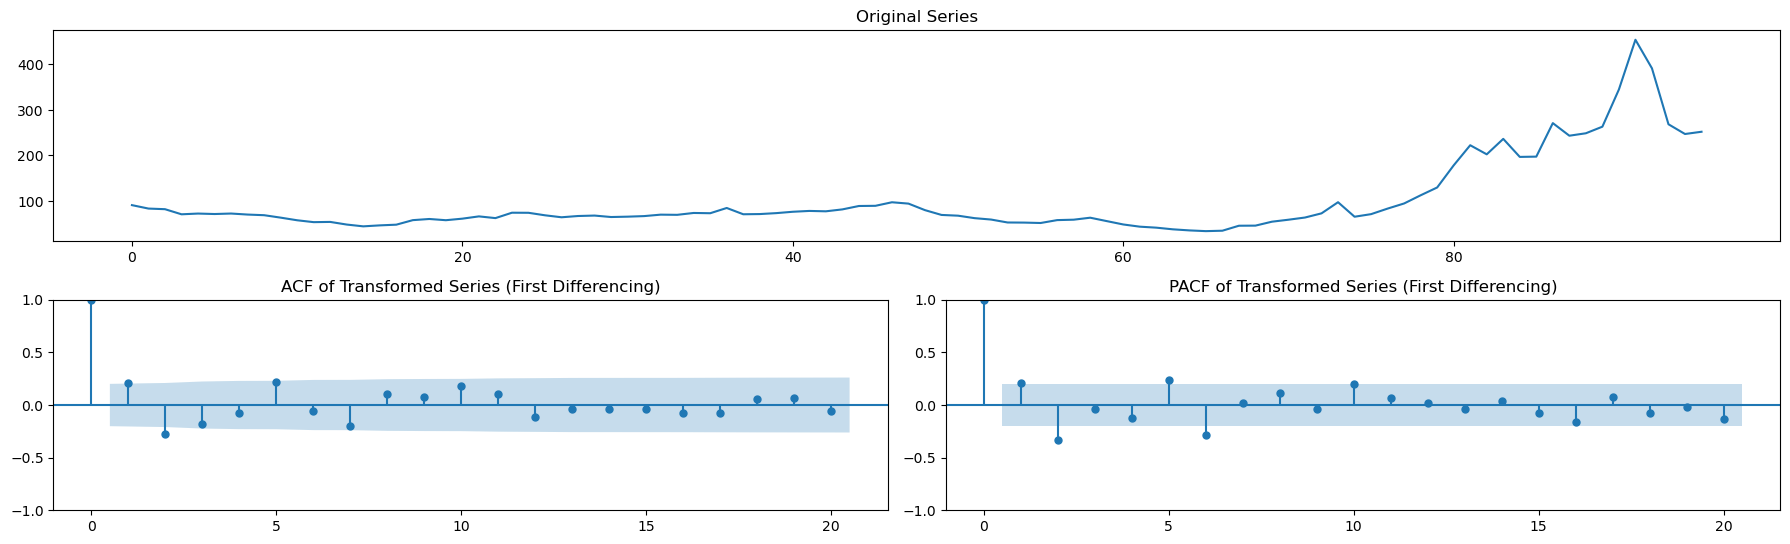

ADF P-Value (Second Difference of Log): 0.3490093581601792


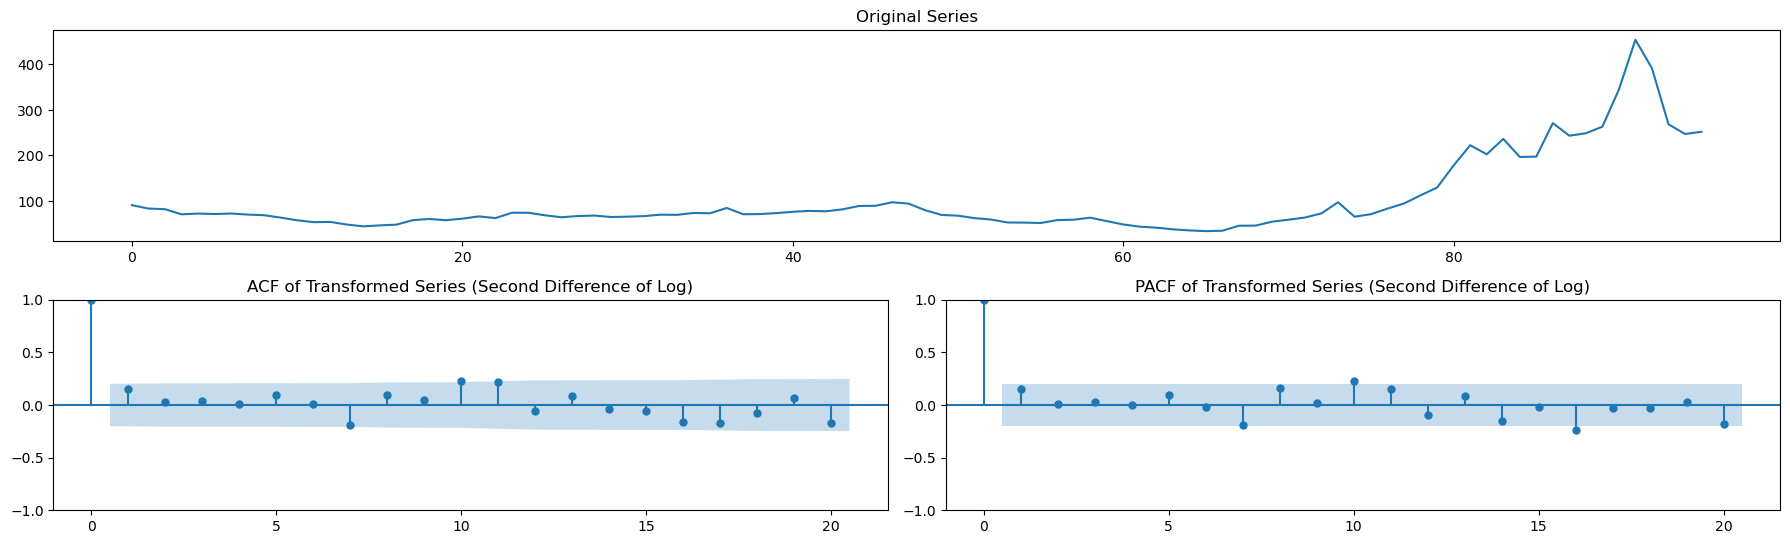



Column: best_price_compound
ADF P-Value (Log Transformation): 0.3474899381001484


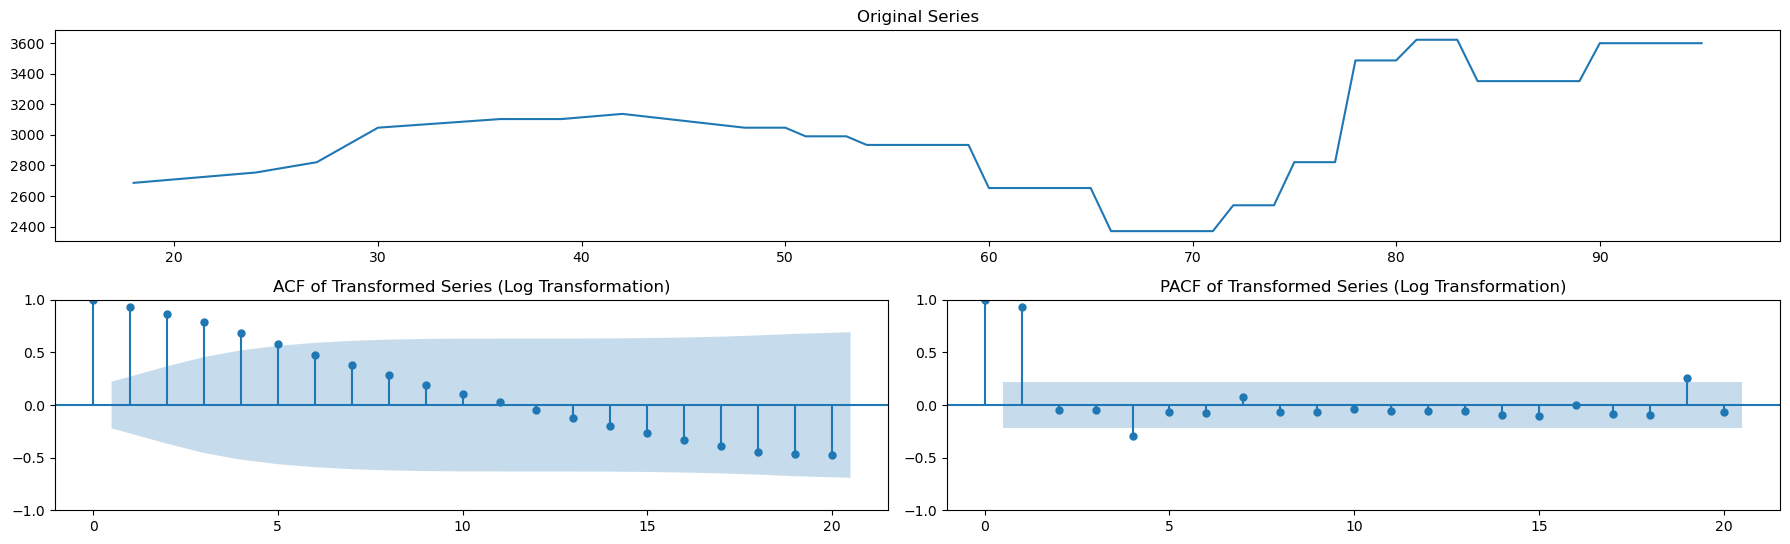

ADF P-Value (Square Root Transformation): 0.3711292937756874


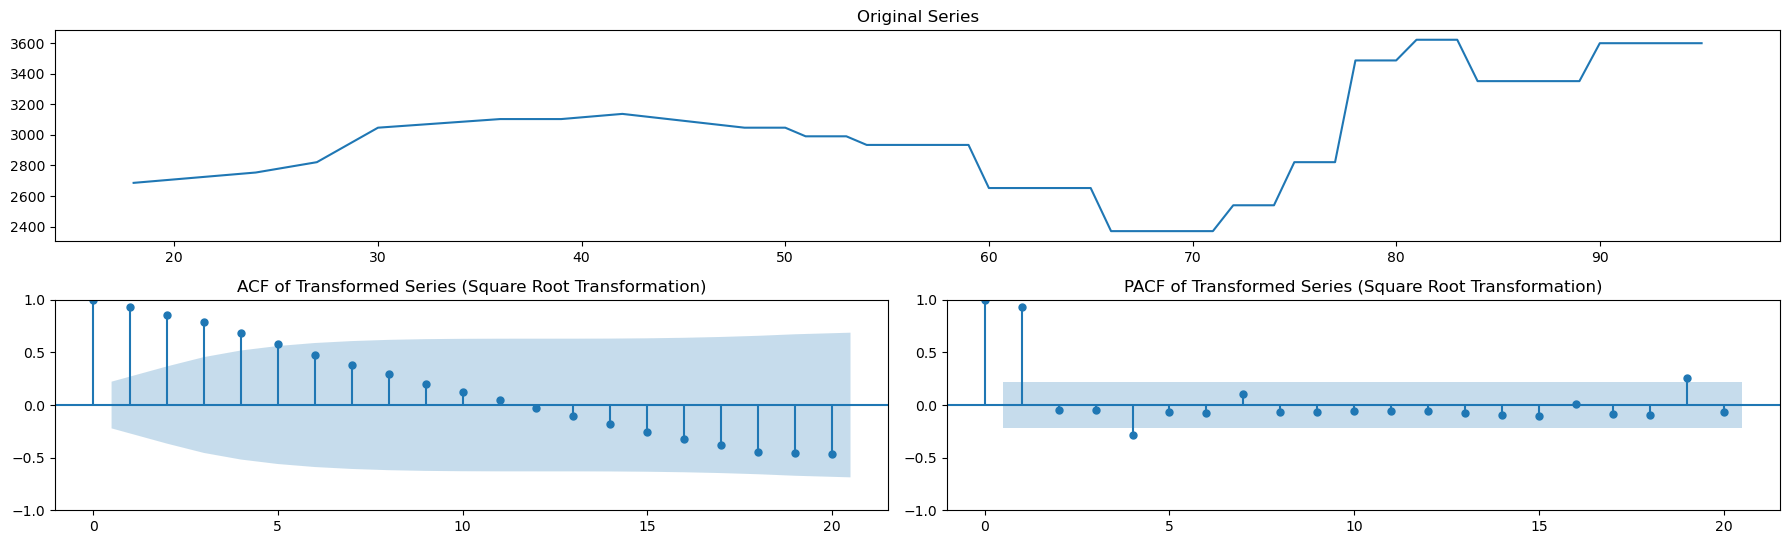

ADF P-Value (Box-Cox Transformation): 0.3676215279404722


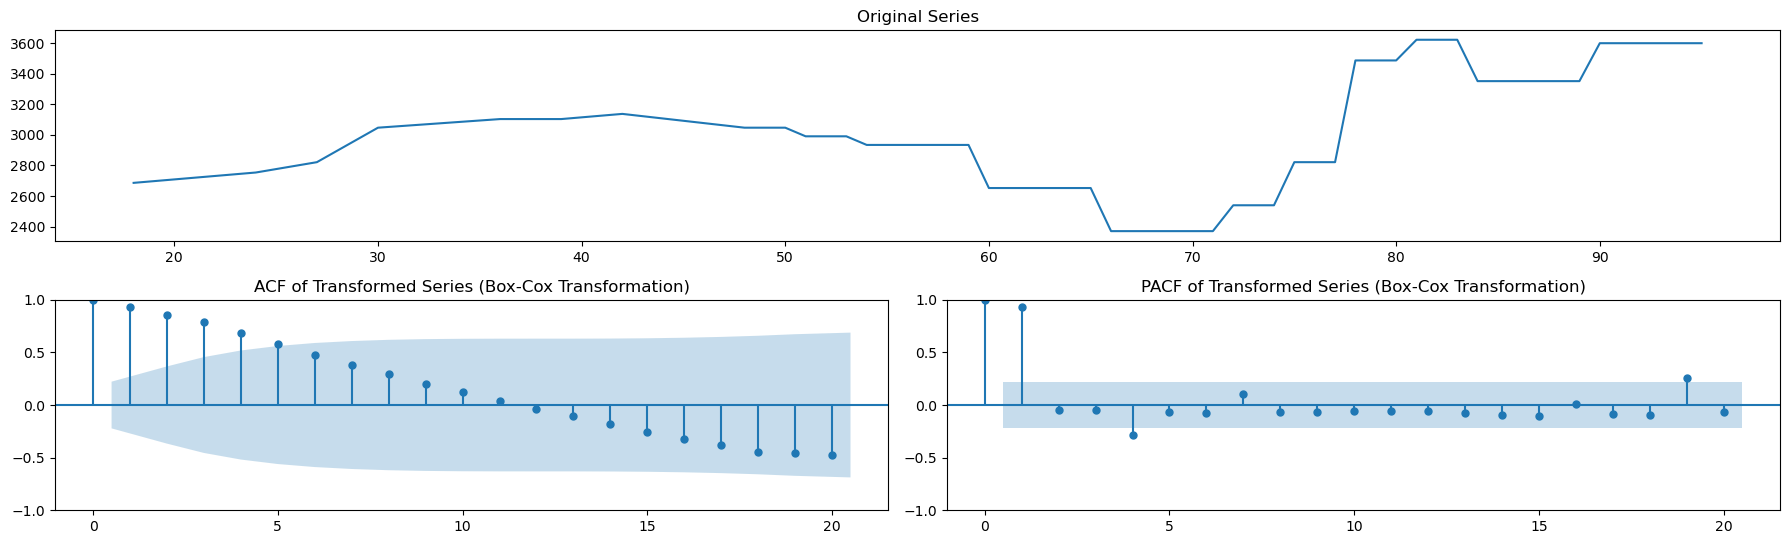

ADF P-Value (First Differencing): 0.010604179268476538


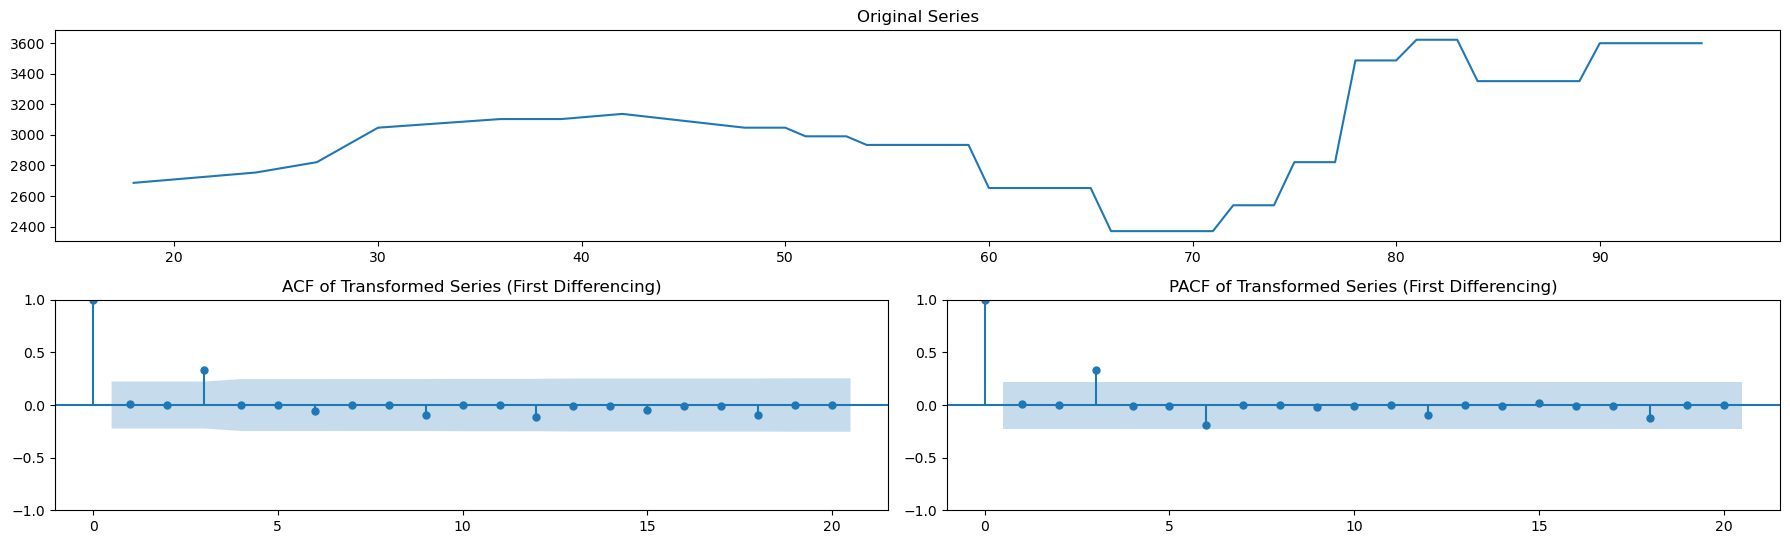

ADF P-Value (Second Difference of Log): 0.014753655494168601


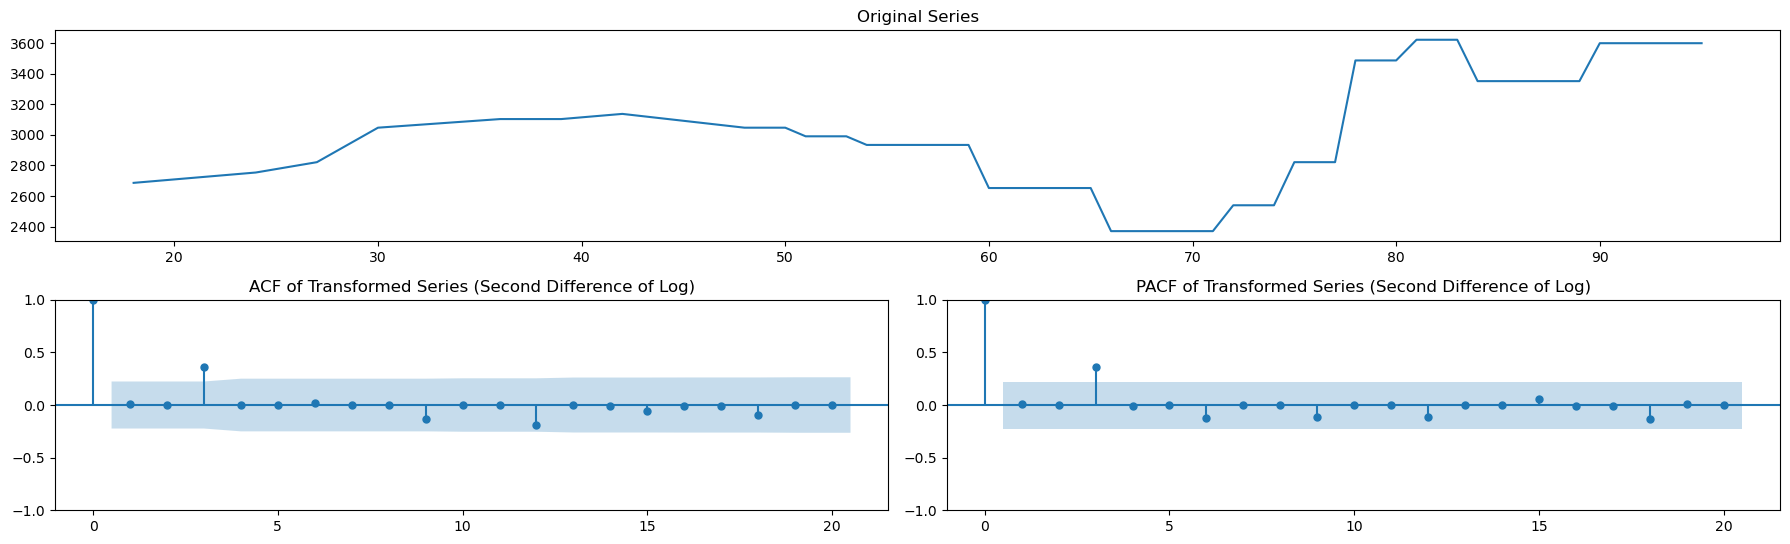



Column: Benzene_price
ADF P-Value (Log Transformation): 0.0665142935163715


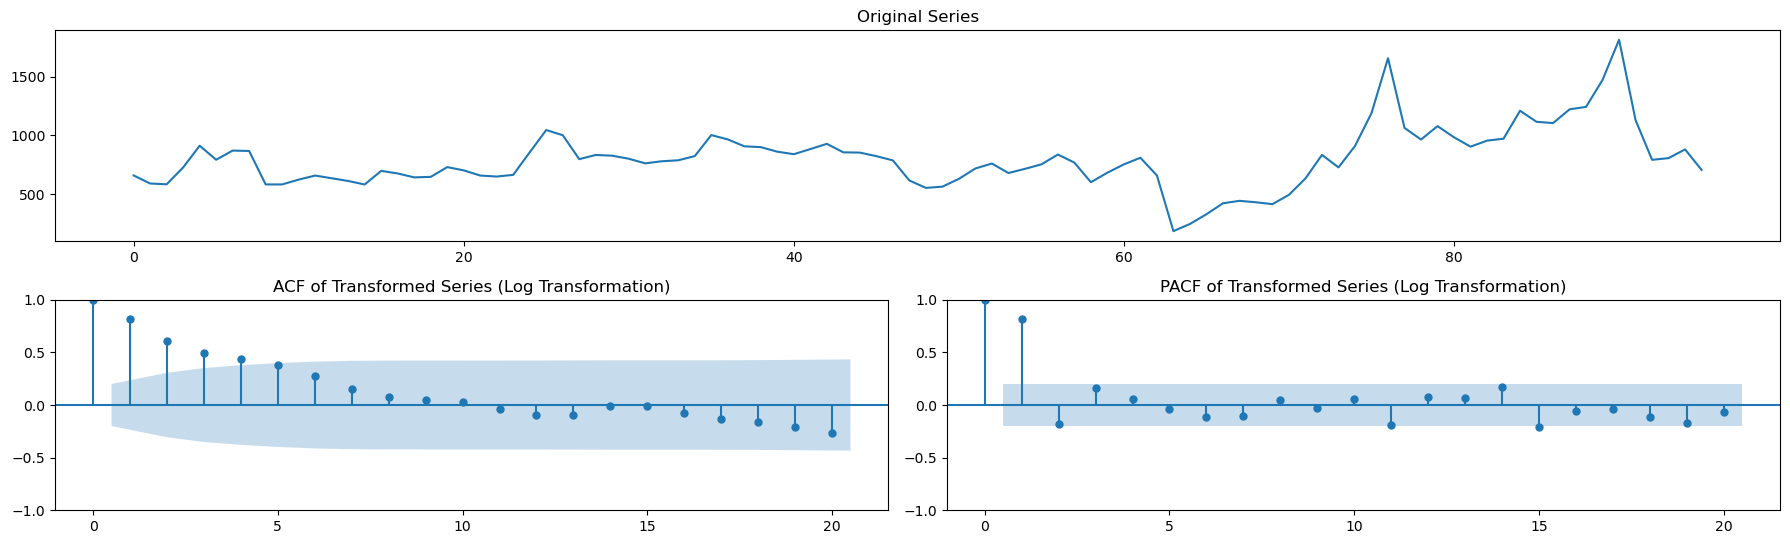

ADF P-Value (Square Root Transformation): 0.08302539840228101


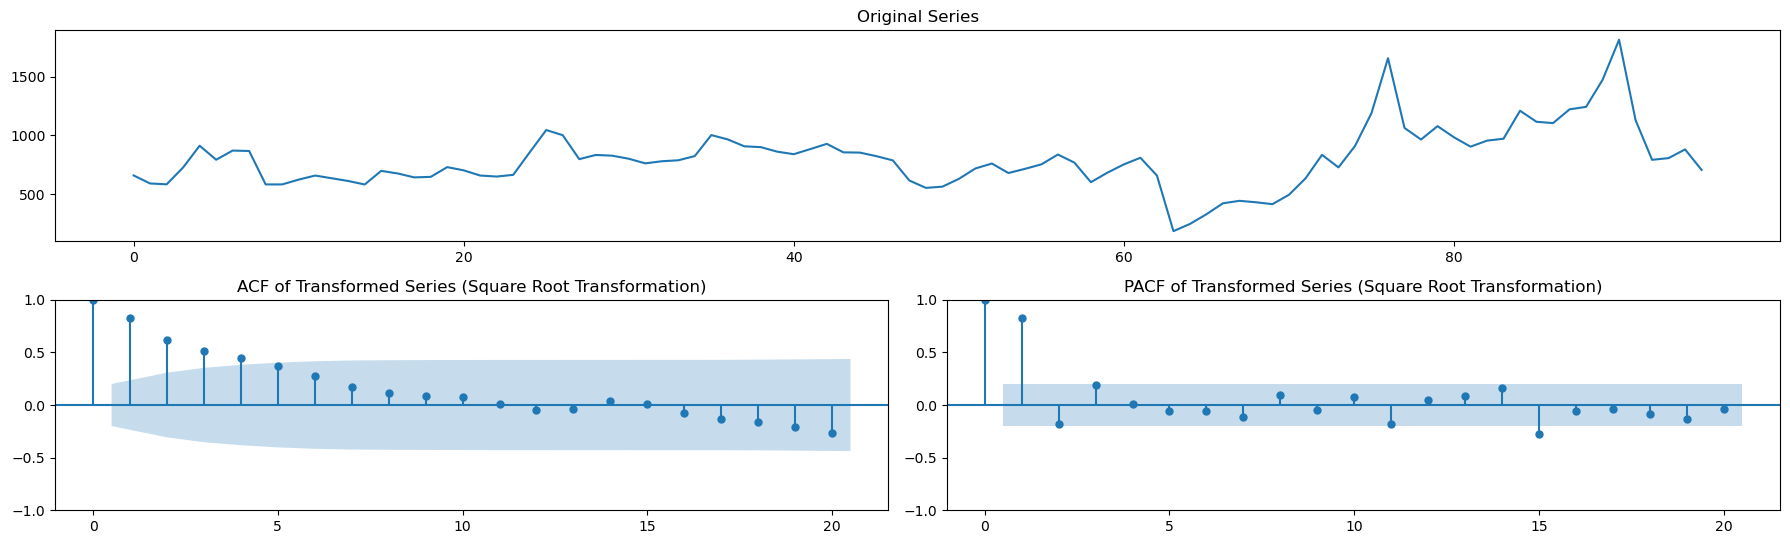

ADF P-Value (Box-Cox Transformation): 0.08307464430064293


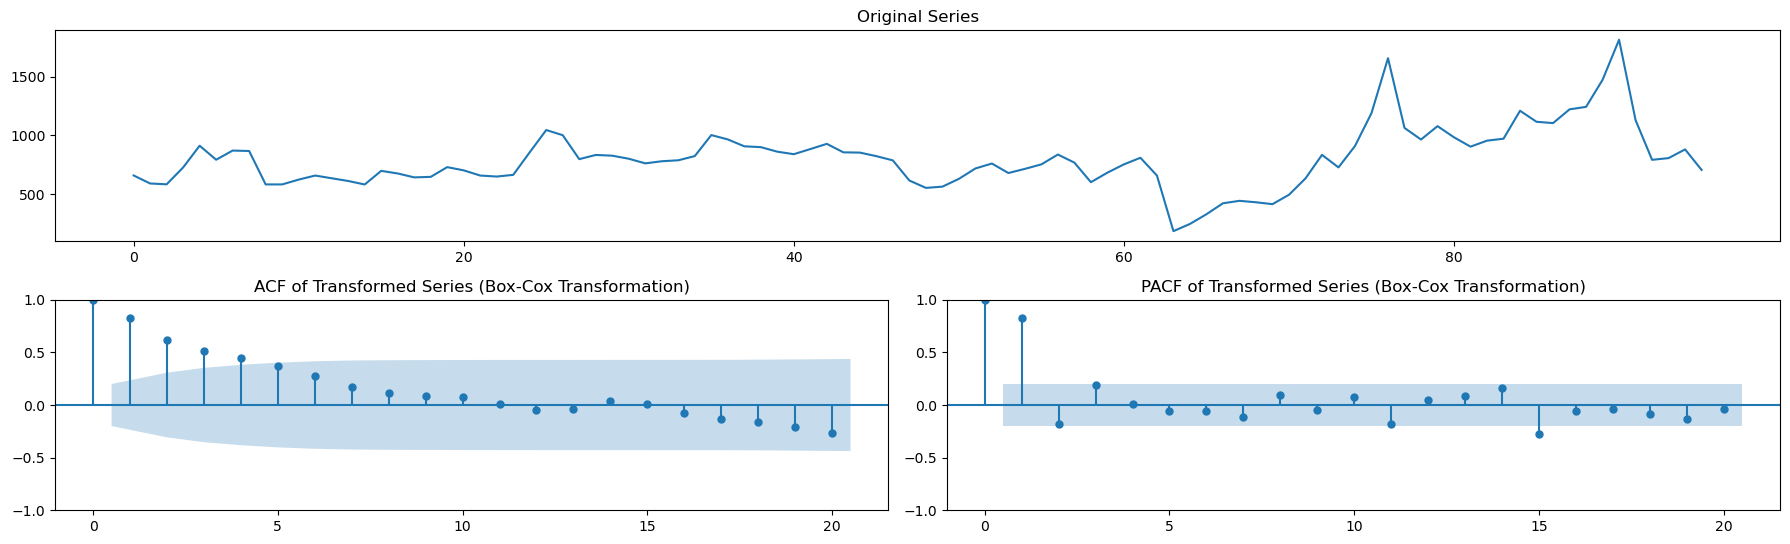

ADF P-Value (First Differencing): 1.1487258725709035e-14


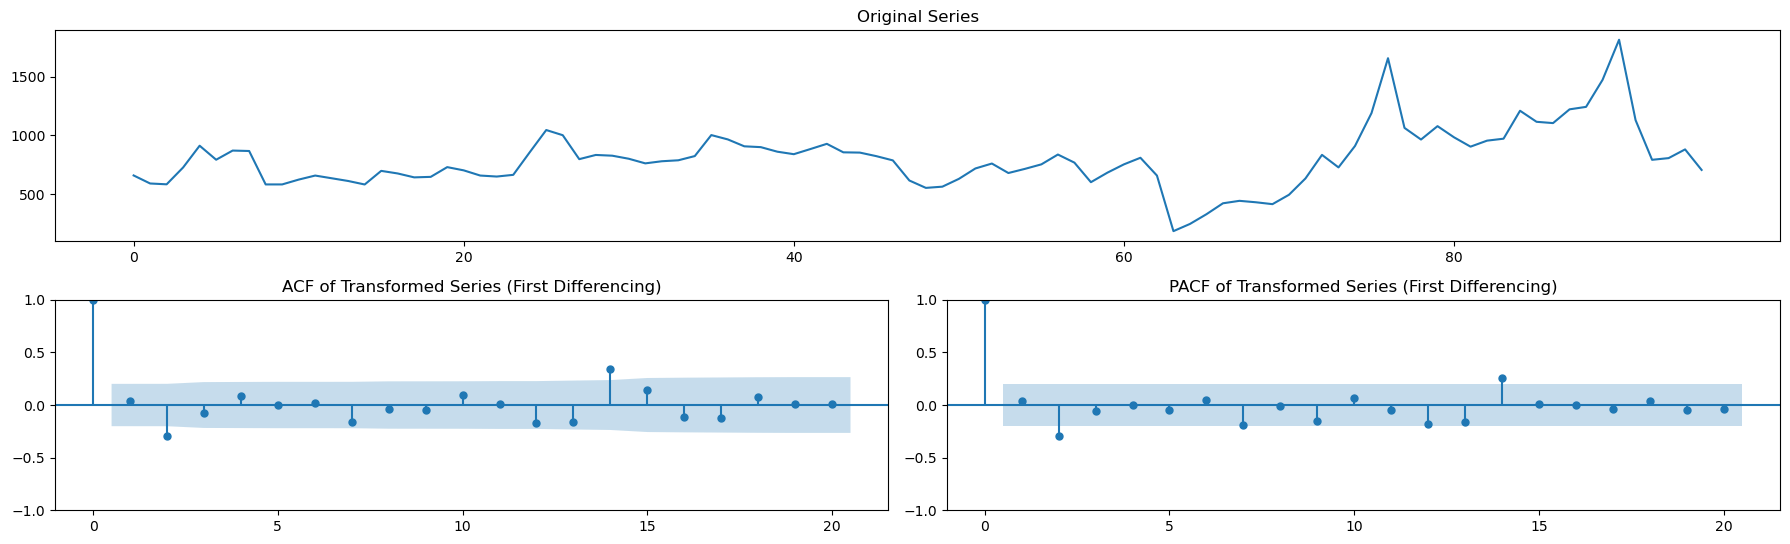

ADF P-Value (Second Difference of Log): 1.5077768377817966e-13


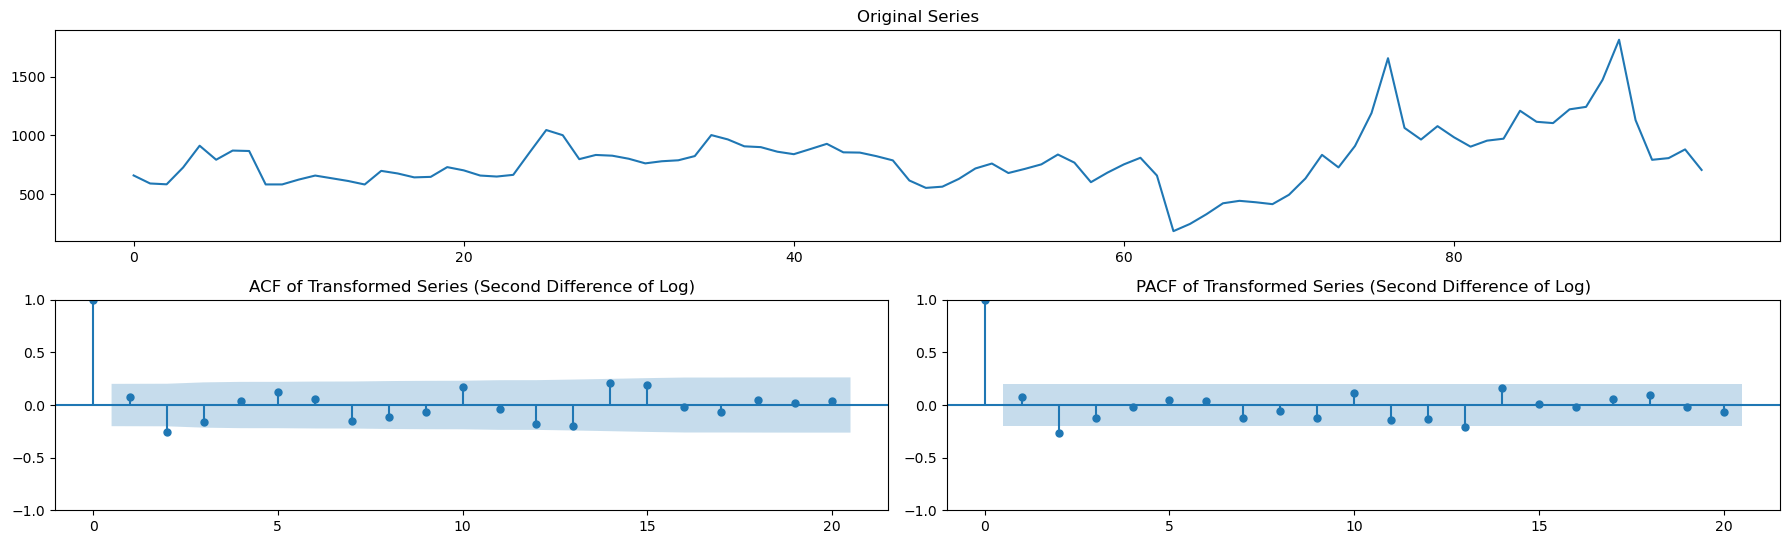



Column: Caprolactam_price
ADF P-Value (Log Transformation): 0.5426231799506894


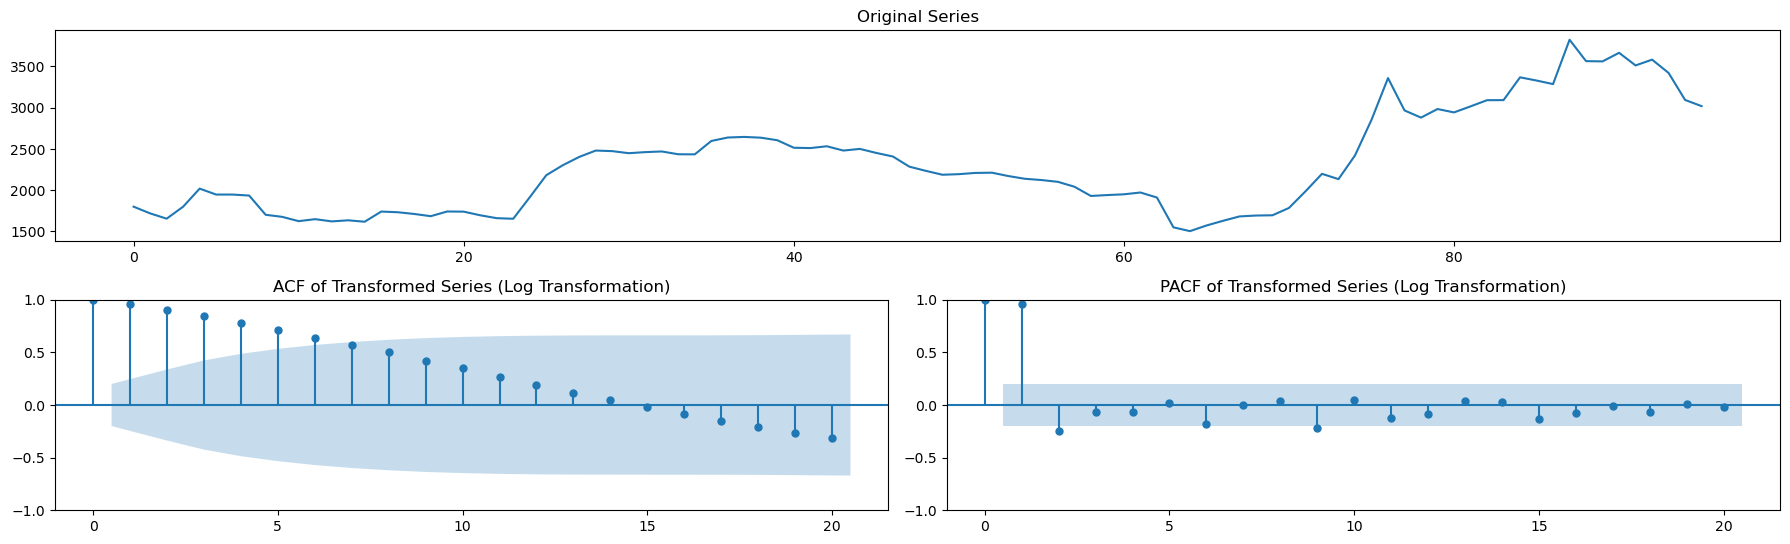

ADF P-Value (Square Root Transformation): 0.5944646586052318


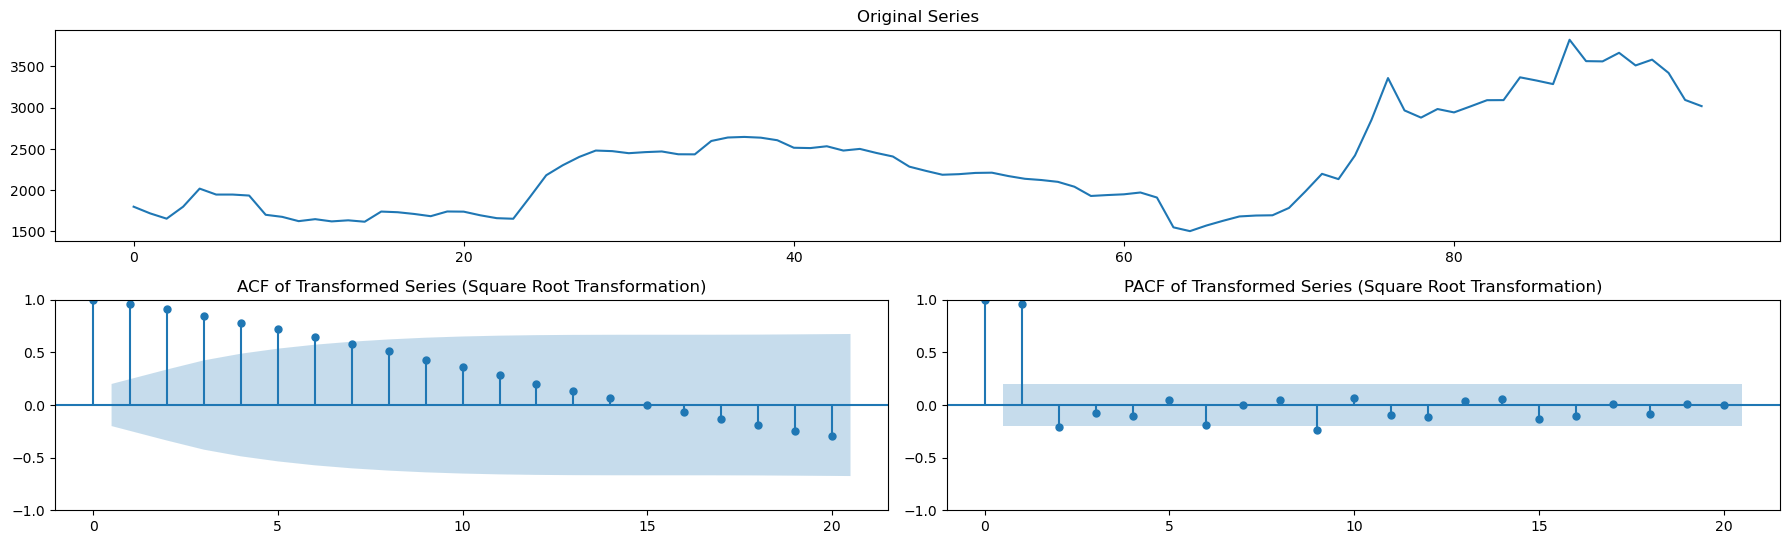

ADF P-Value (Box-Cox Transformation): 0.44566861824927795


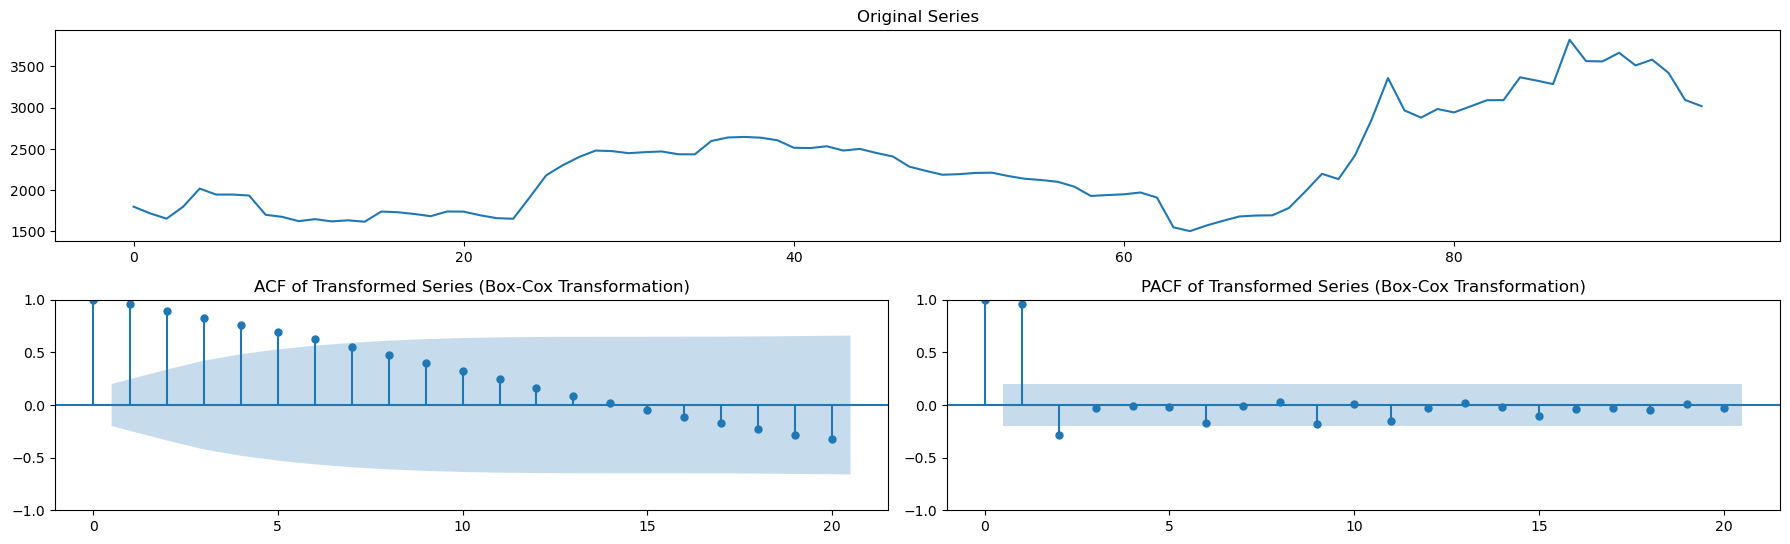

ADF P-Value (First Differencing): 2.0528769374667707e-13


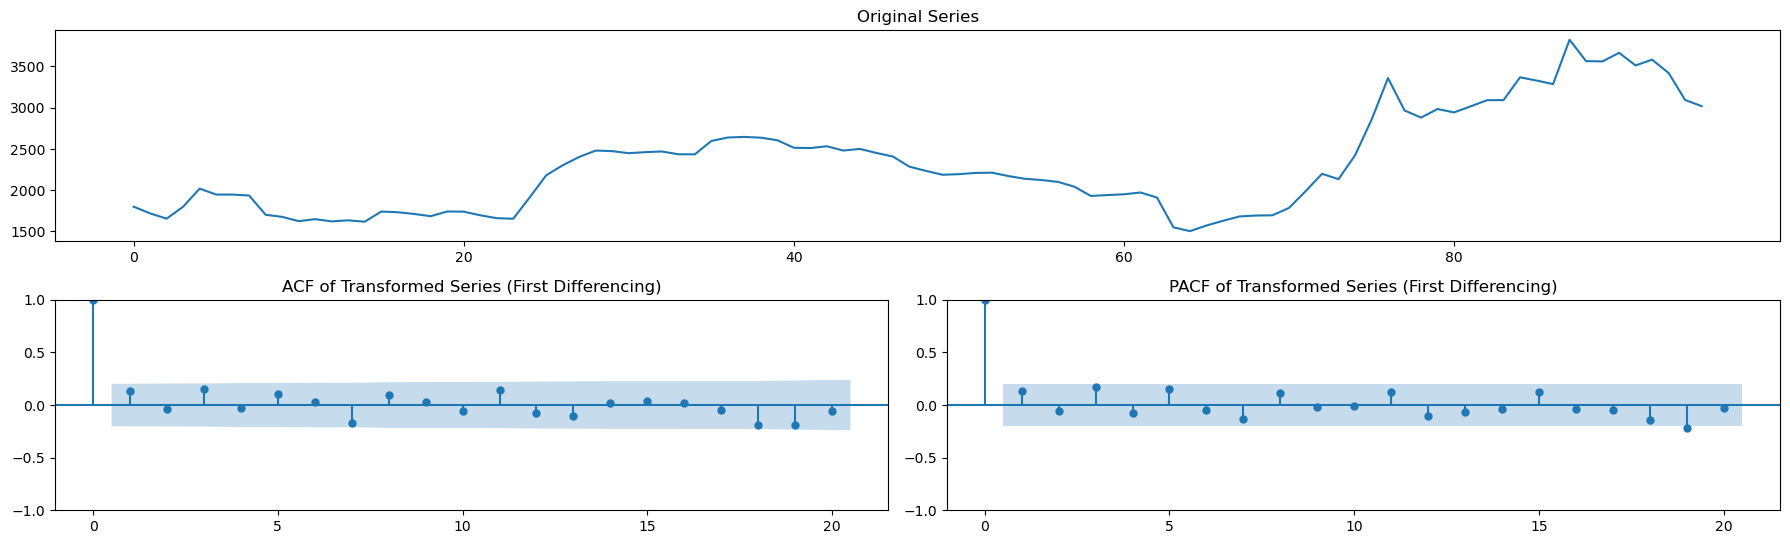

ADF P-Value (Second Difference of Log): 6.24820443914786e-11


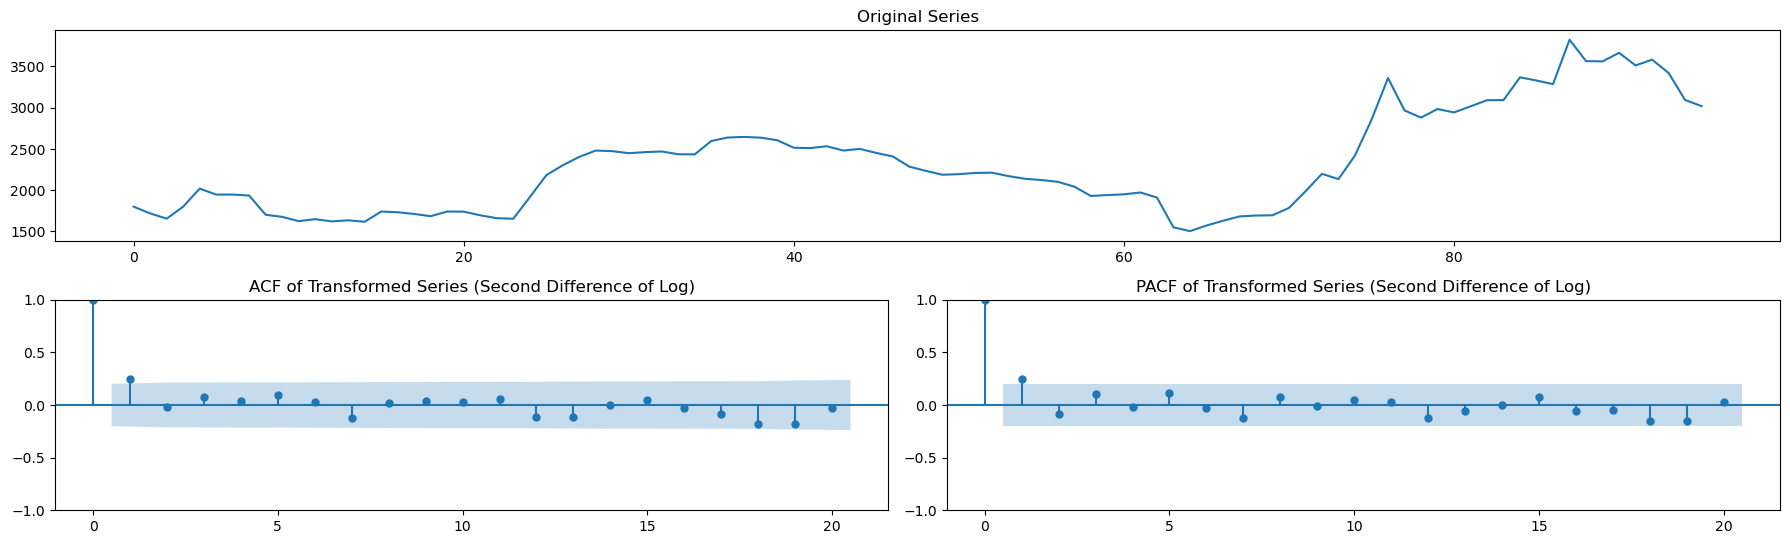



Column: Cyclohexane_price
ADF P-Value (Log Transformation): 0.1306121533553269


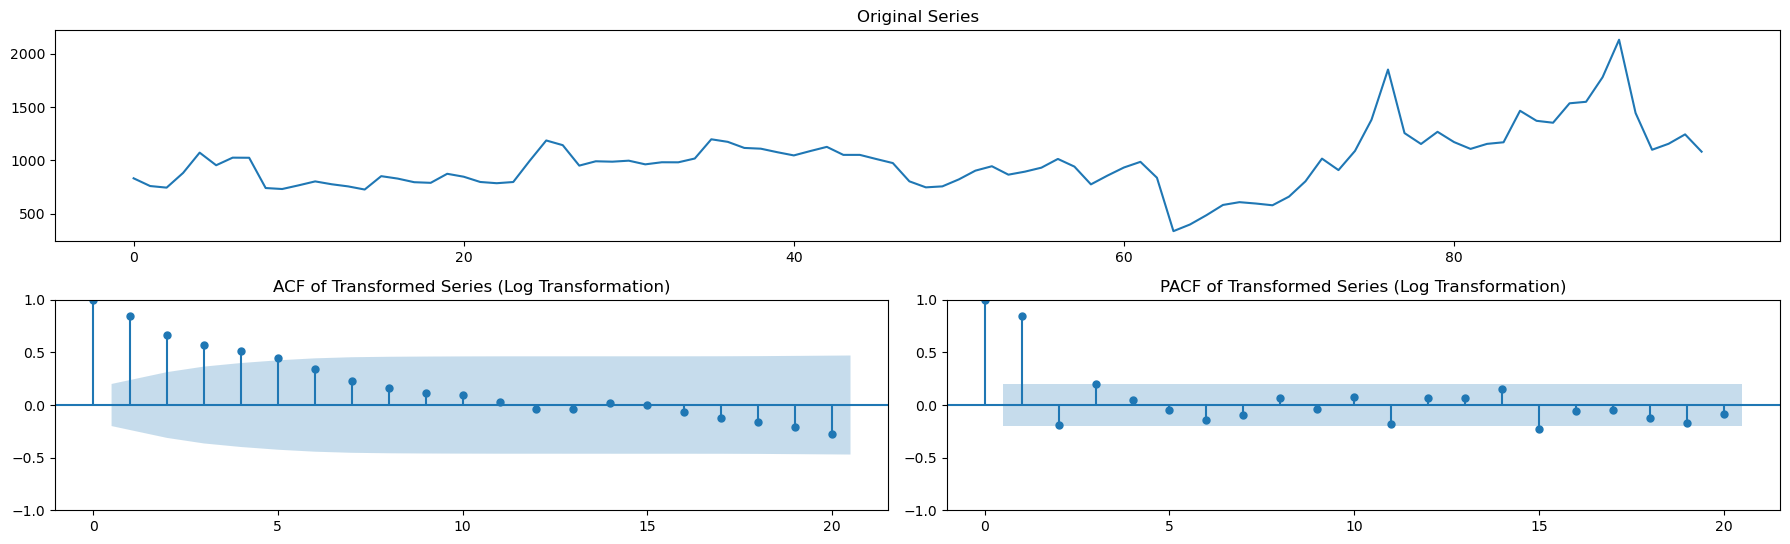

ADF P-Value (Square Root Transformation): 0.15233709704787057


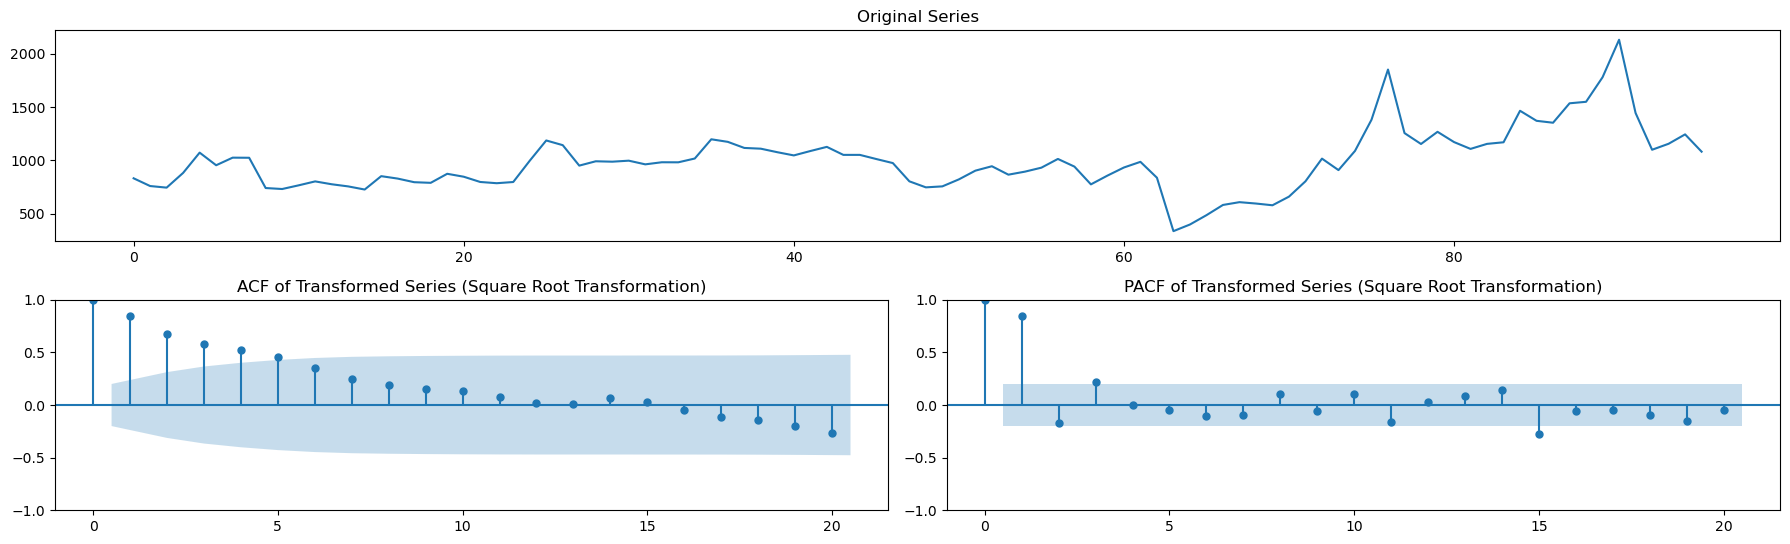

ADF P-Value (Box-Cox Transformation): 0.1467964674407713


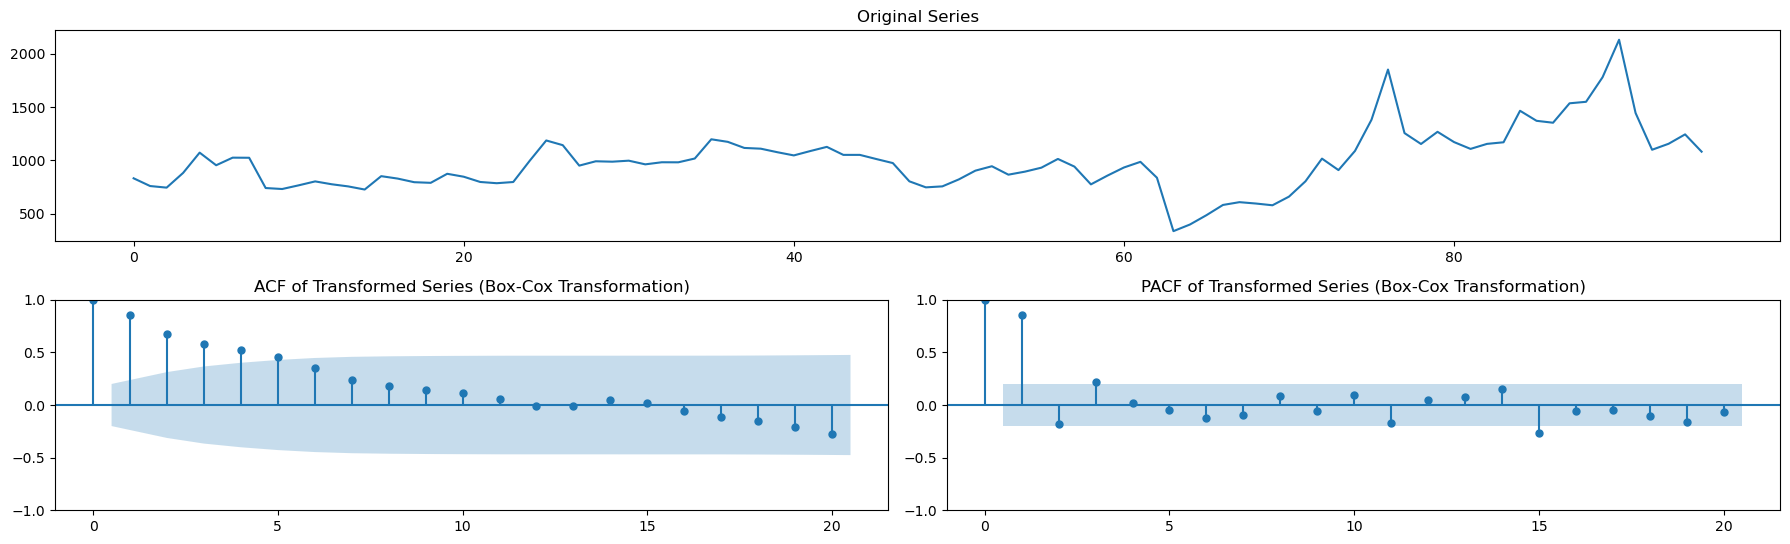

ADF P-Value (First Differencing): 6.152089979529319e-15


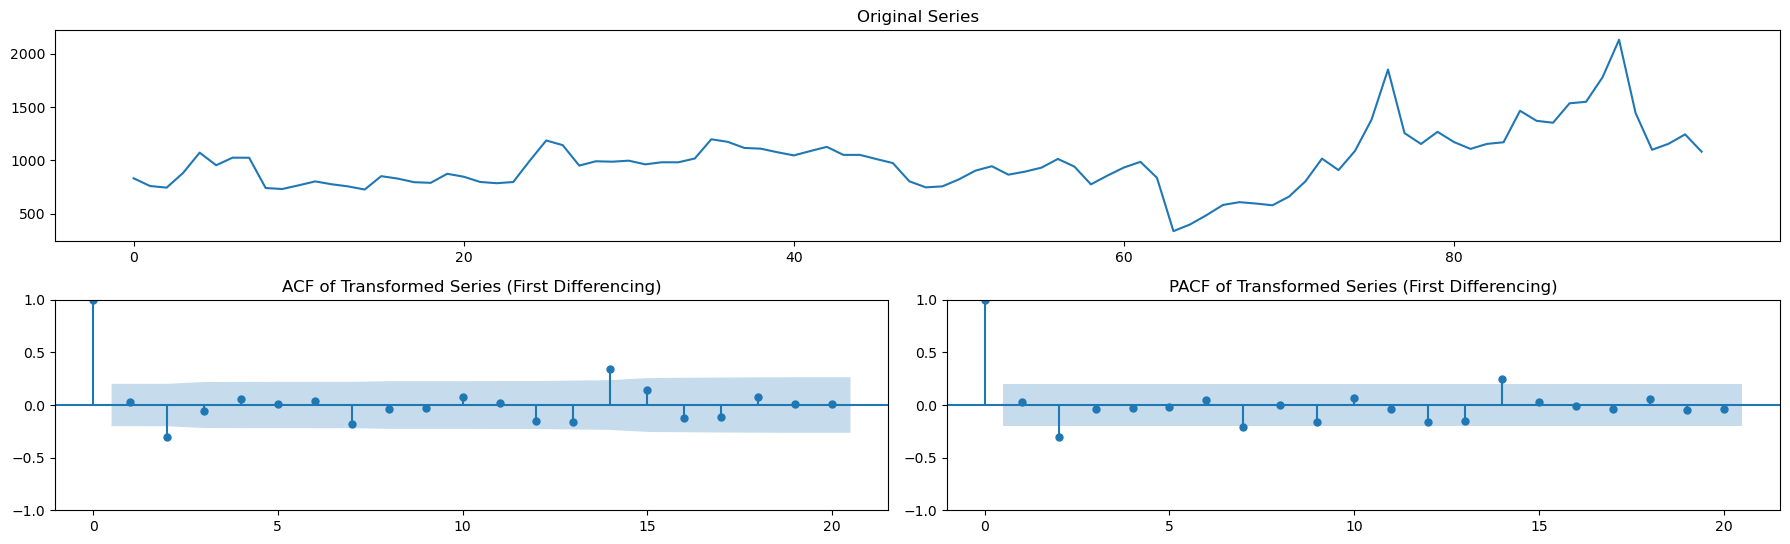

ADF P-Value (Second Difference of Log): 9.75075188275199e-14


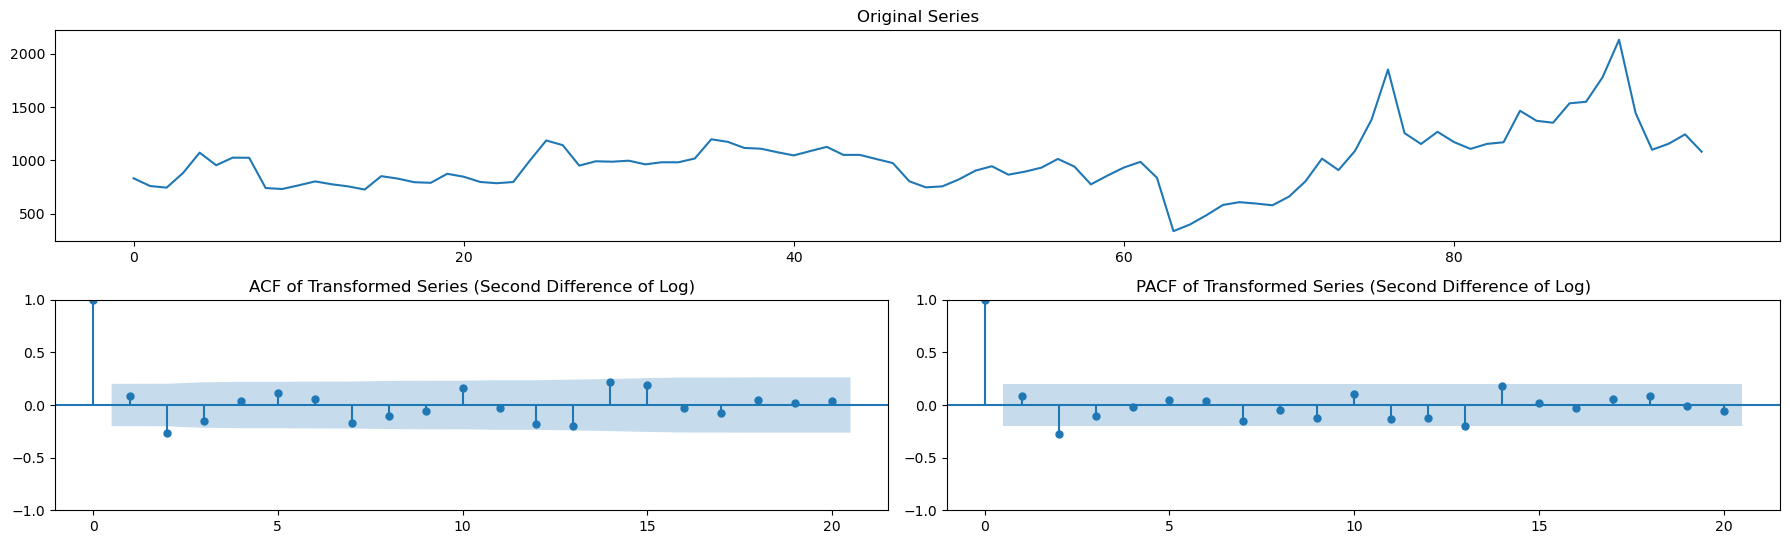



Column: Electricty_Price_France
ADF P-Value (Log Transformation): 0.7961804917207983


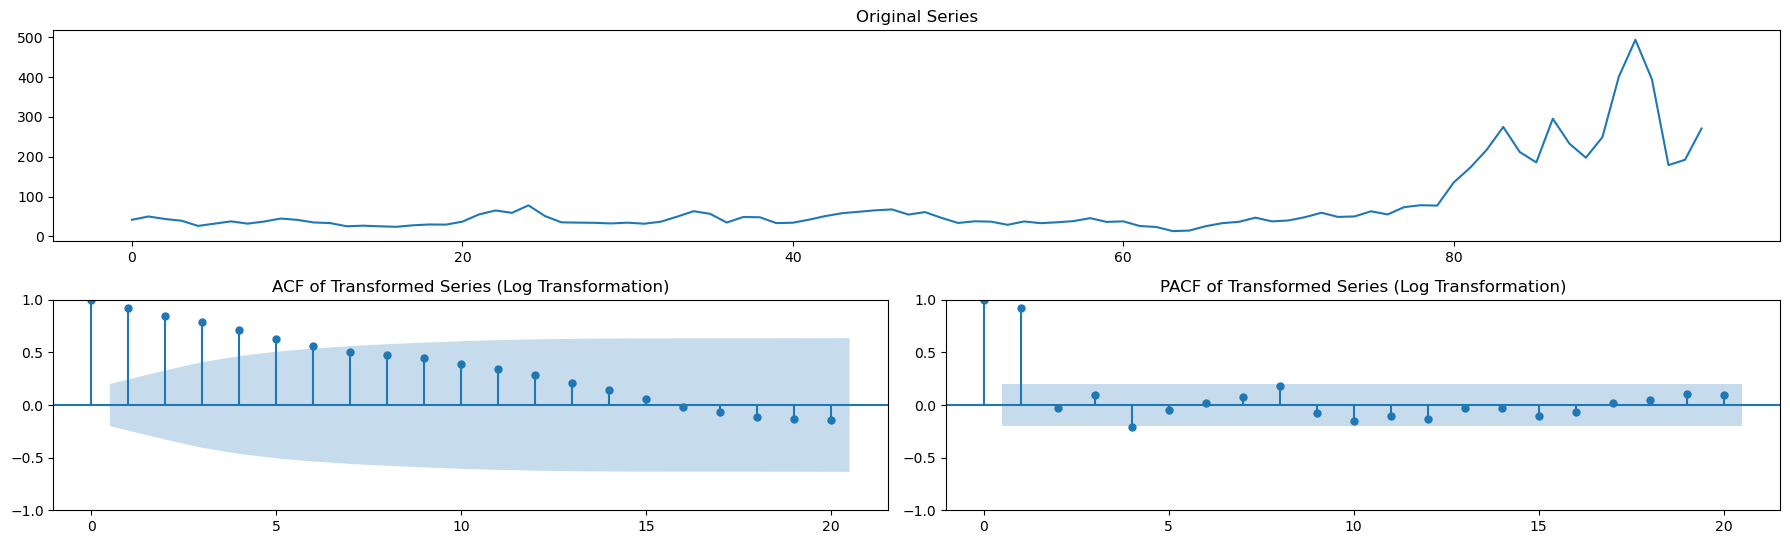

ADF P-Value (Square Root Transformation): 0.47037115529445167


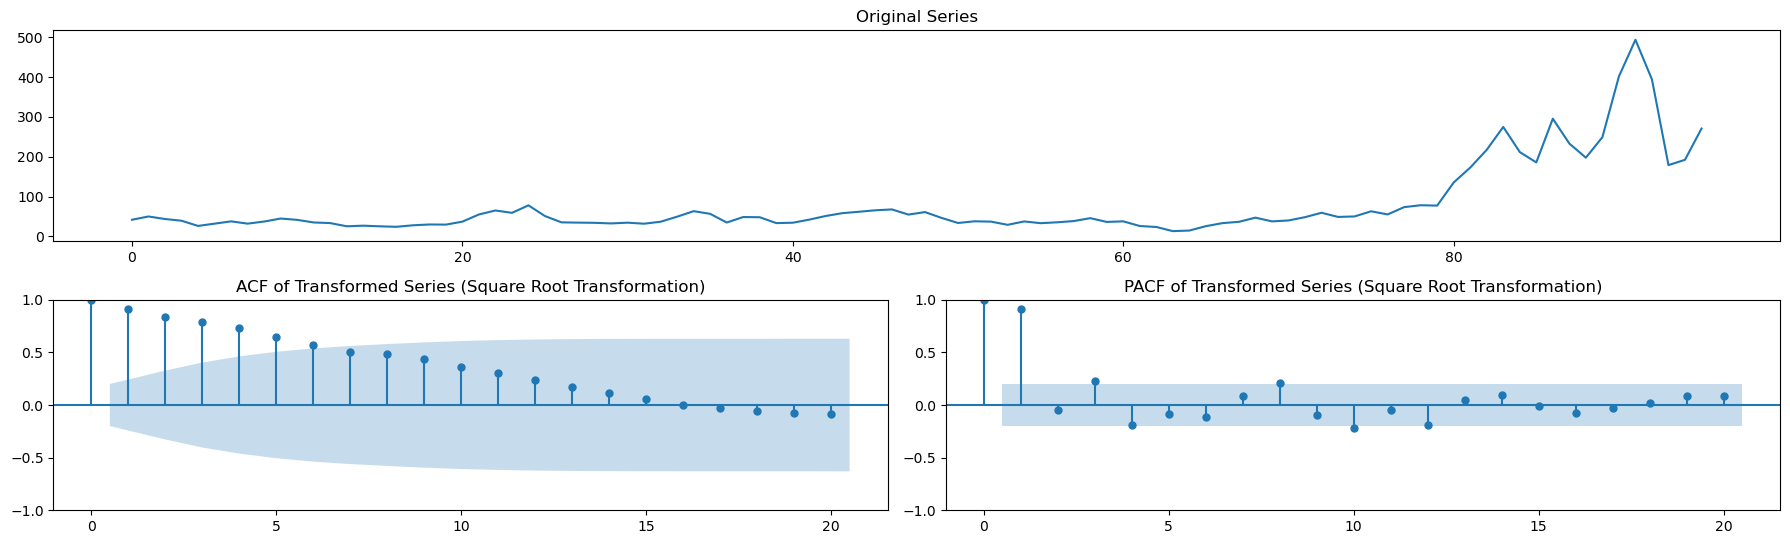

ADF P-Value (Box-Cox Transformation): 0.41158430318157446


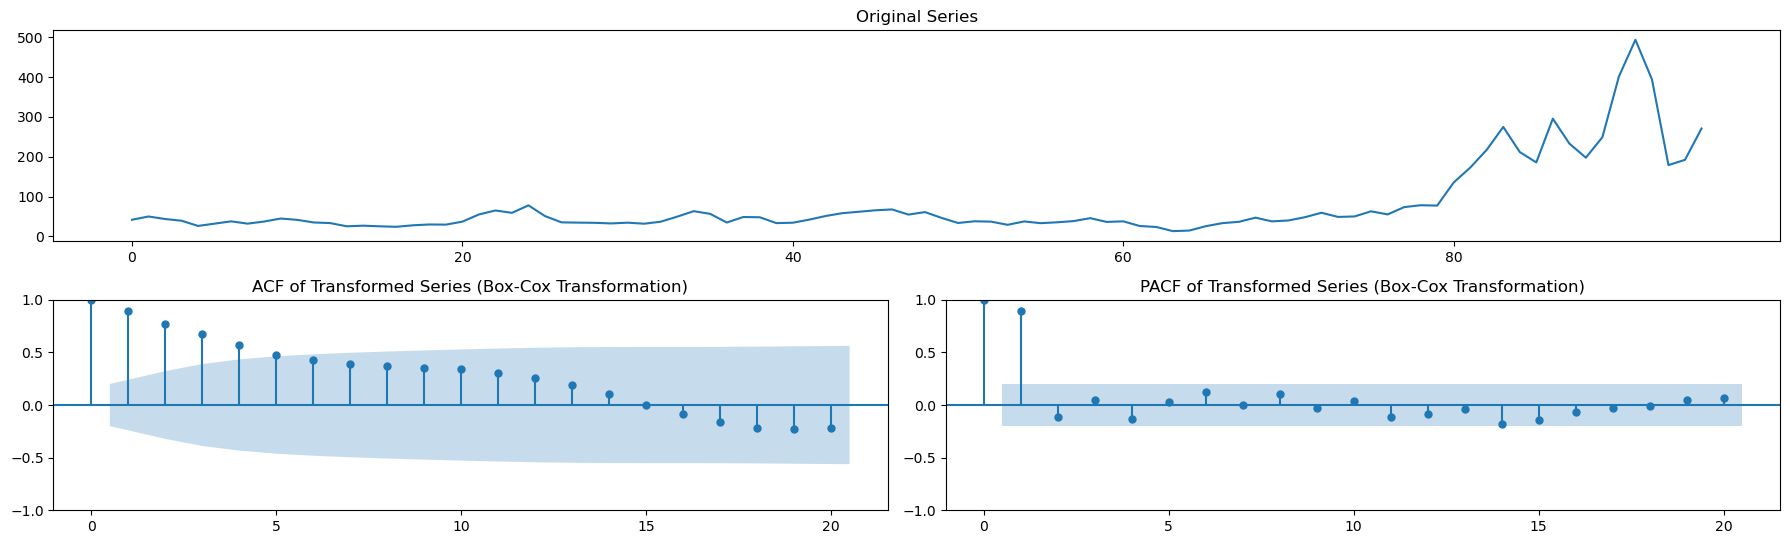

ADF P-Value (First Differencing): 0.11831107033704757


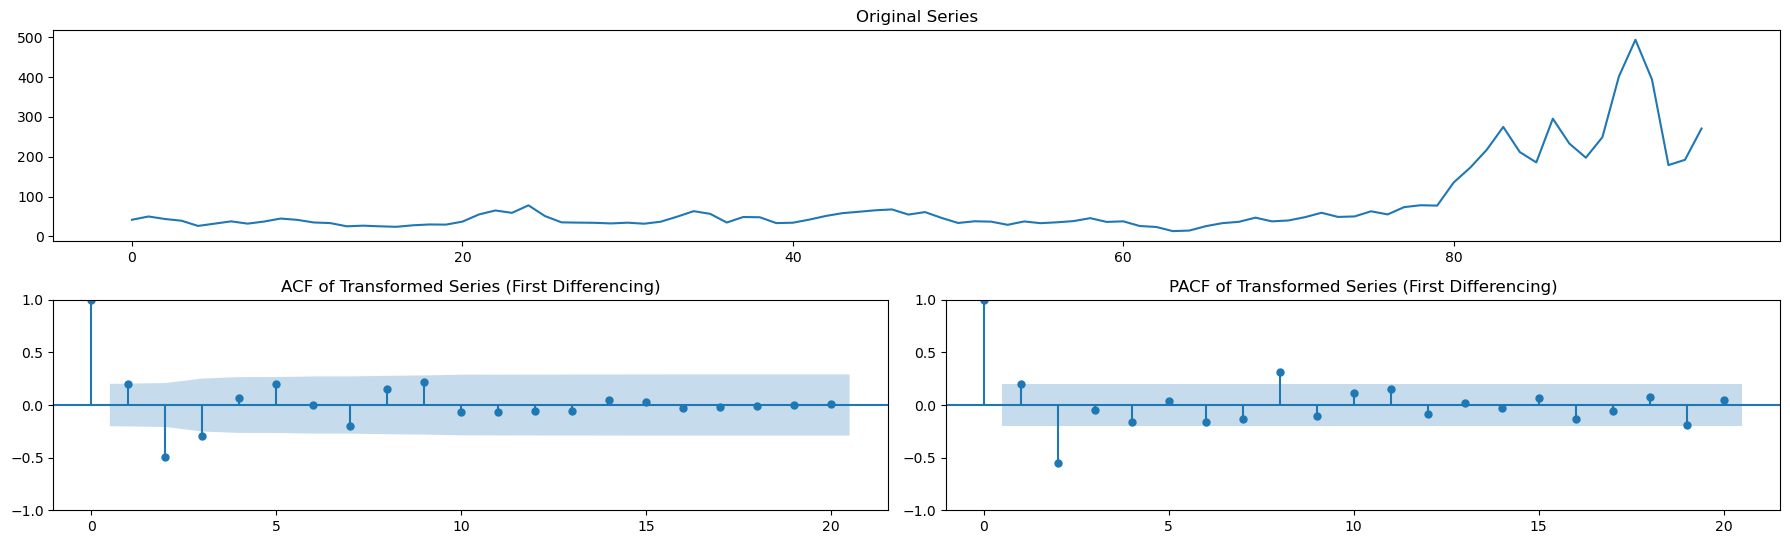

ADF P-Value (Second Difference of Log): 1.0297974201392739e-11


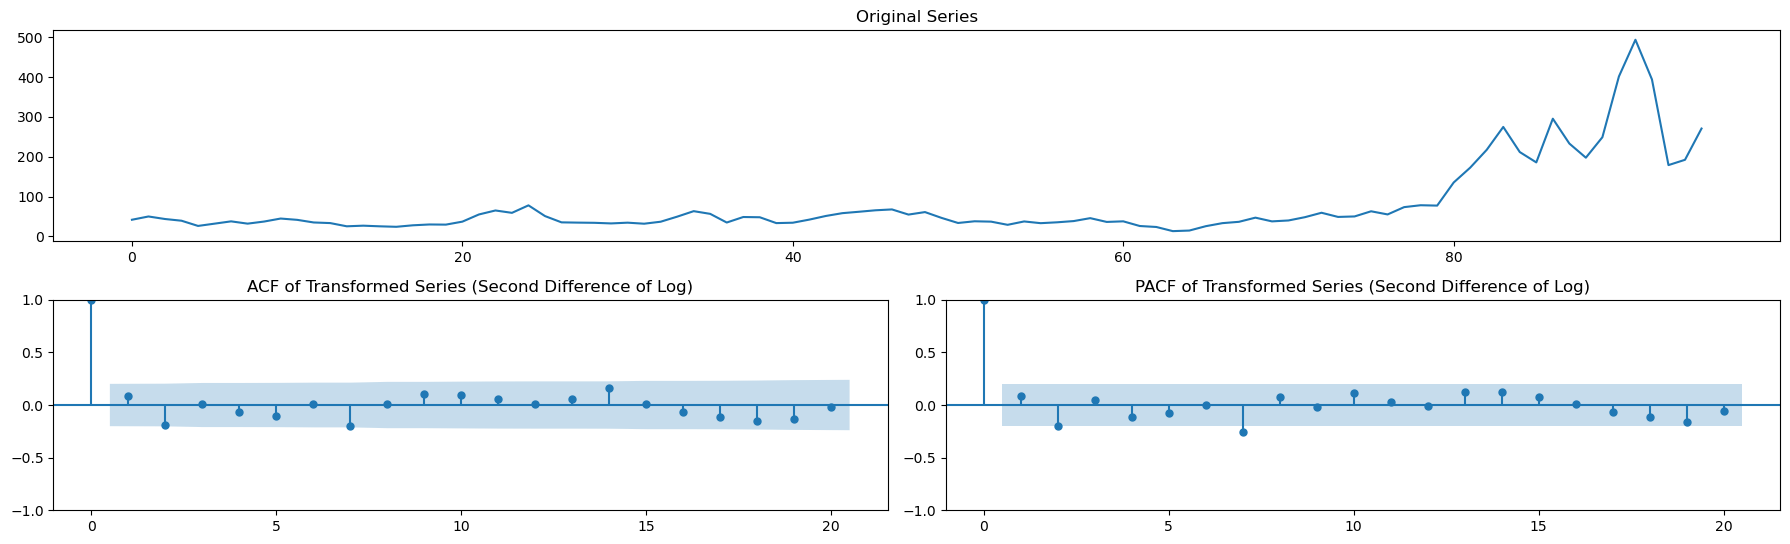



Column: Electricty_Price_Italy
ADF P-Value (Log Transformation): 0.9312026758497977


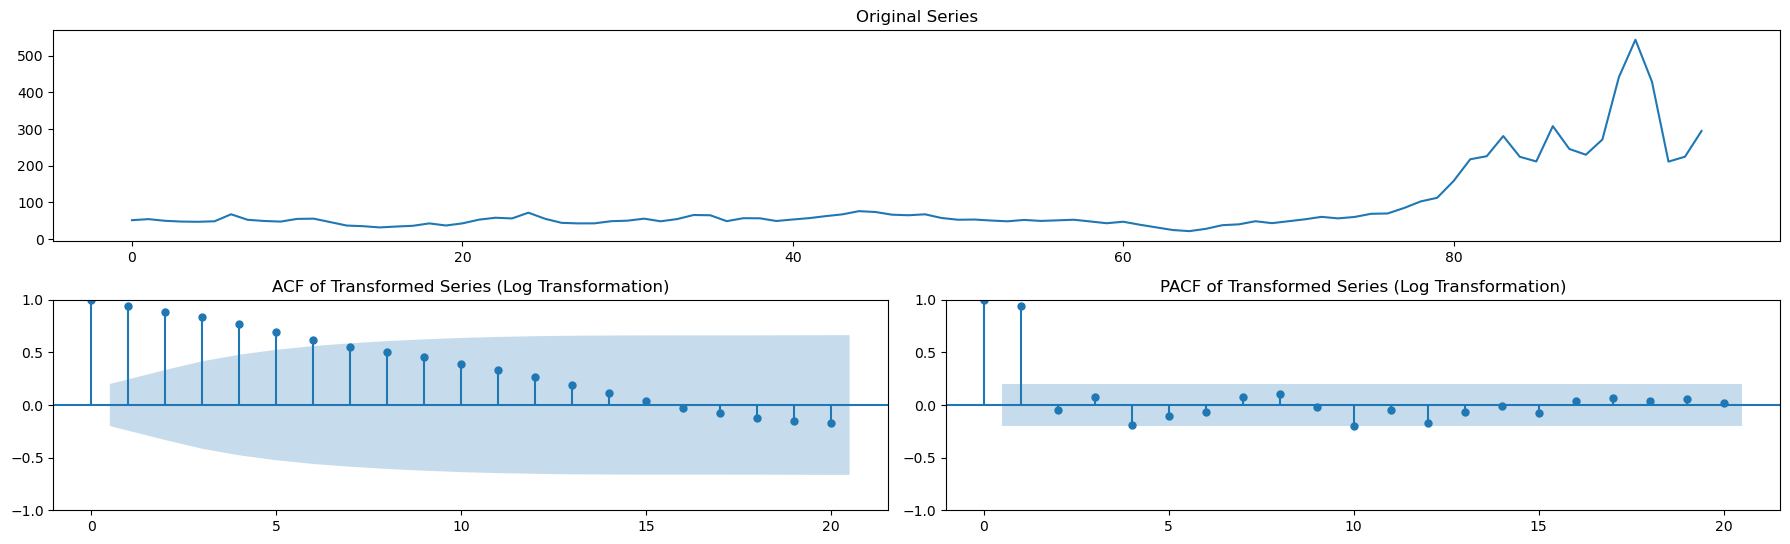

ADF P-Value (Square Root Transformation): 0.07606337745555196


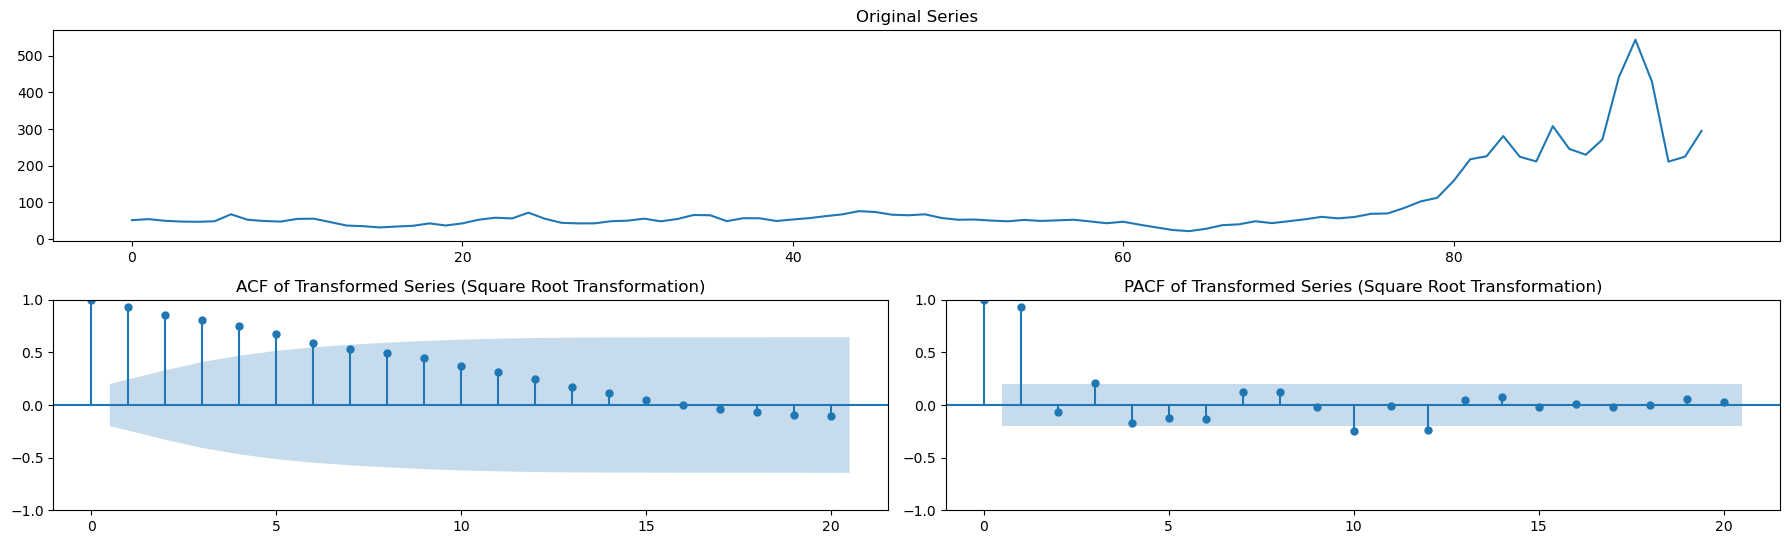

ADF P-Value (Box-Cox Transformation): 0.4439282007172288


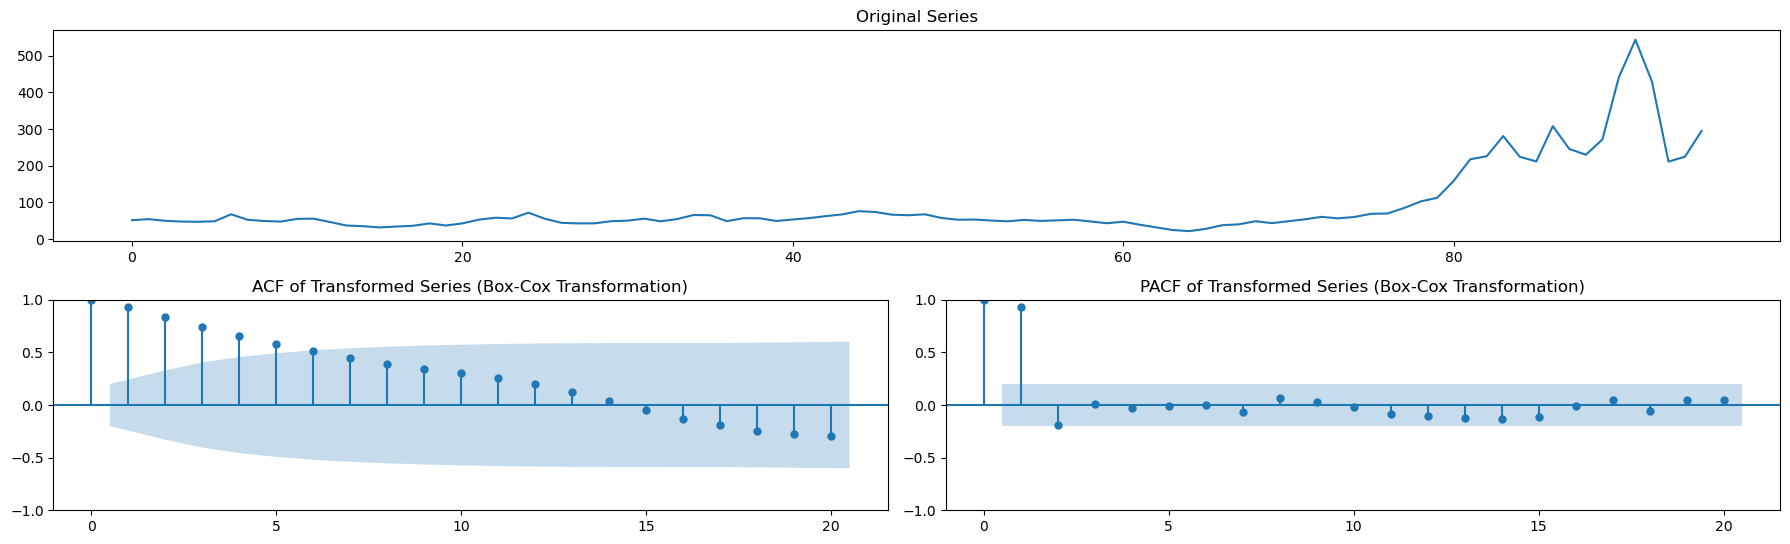

ADF P-Value (First Differencing): 0.27929275878215604


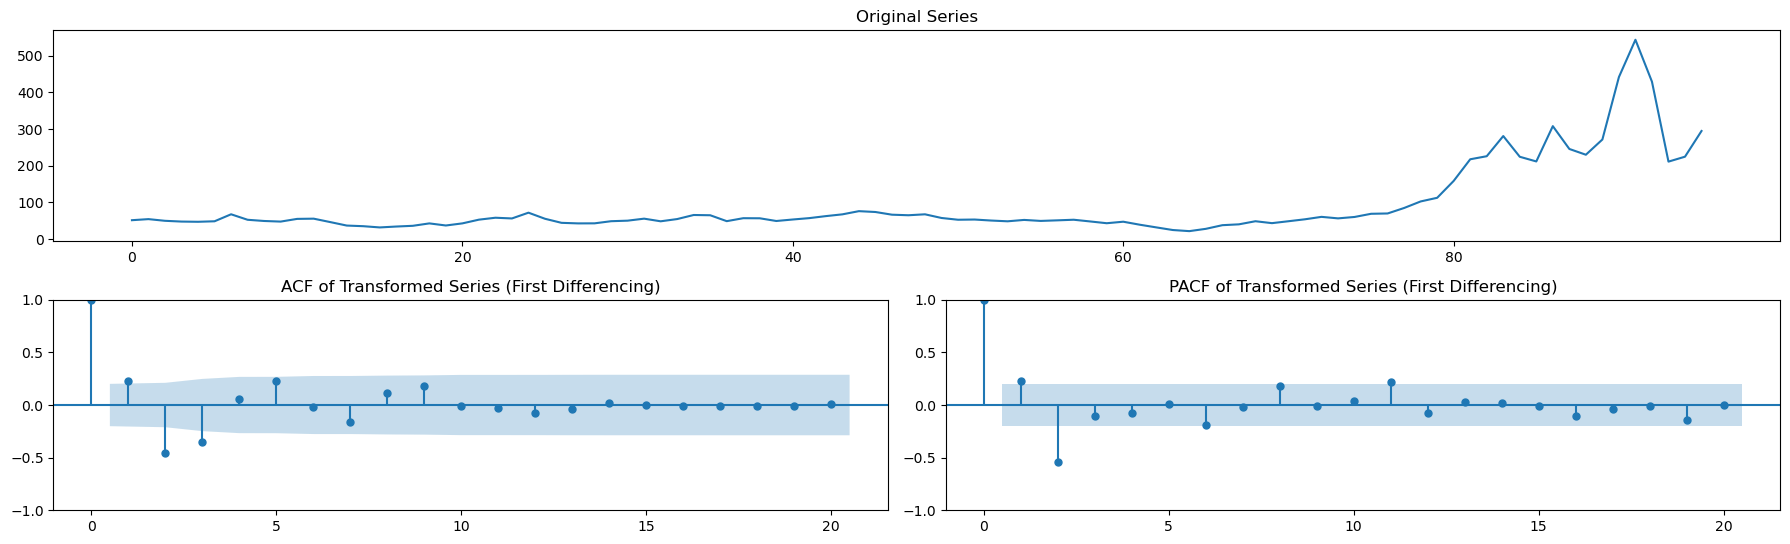

ADF P-Value (Second Difference of Log): 3.086950295845886e-11


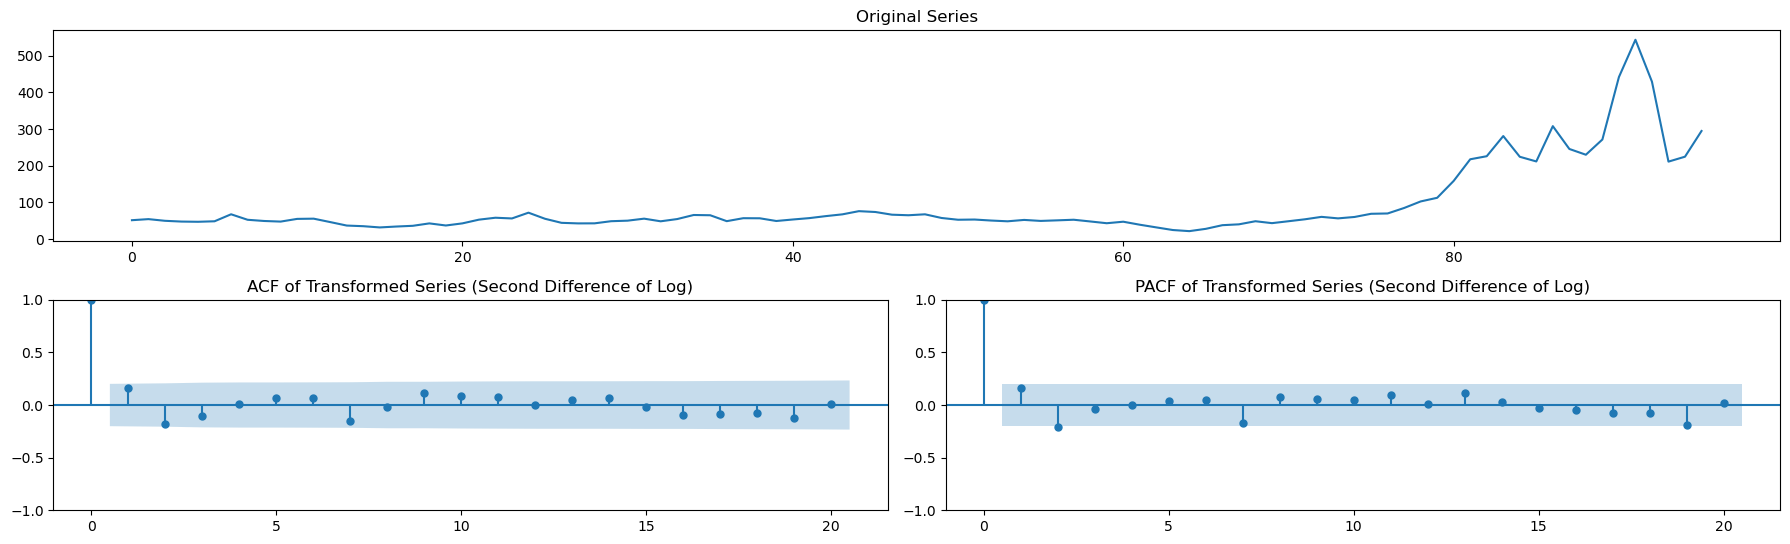



Column: Electricty_Price_Poland
ADF P-Value (Log Transformation): 0.9923650776138786


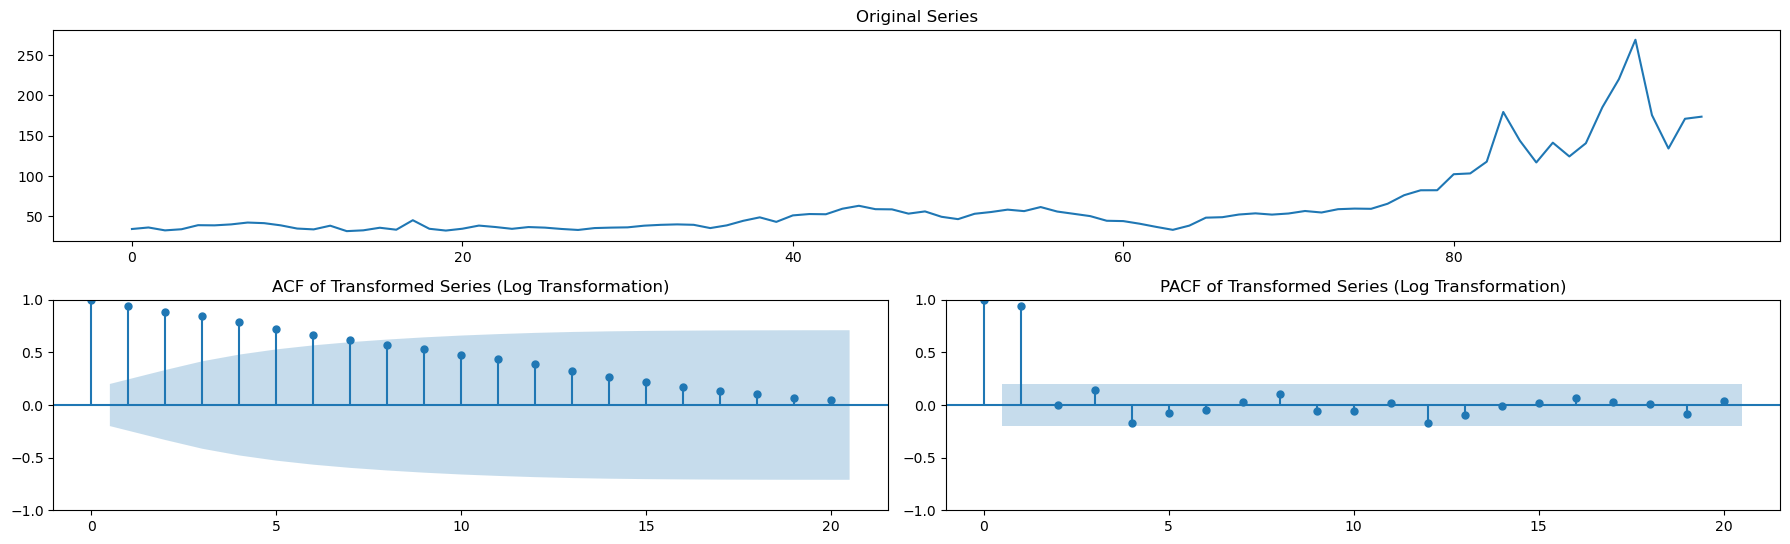

ADF P-Value (Square Root Transformation): 0.9870999197075736


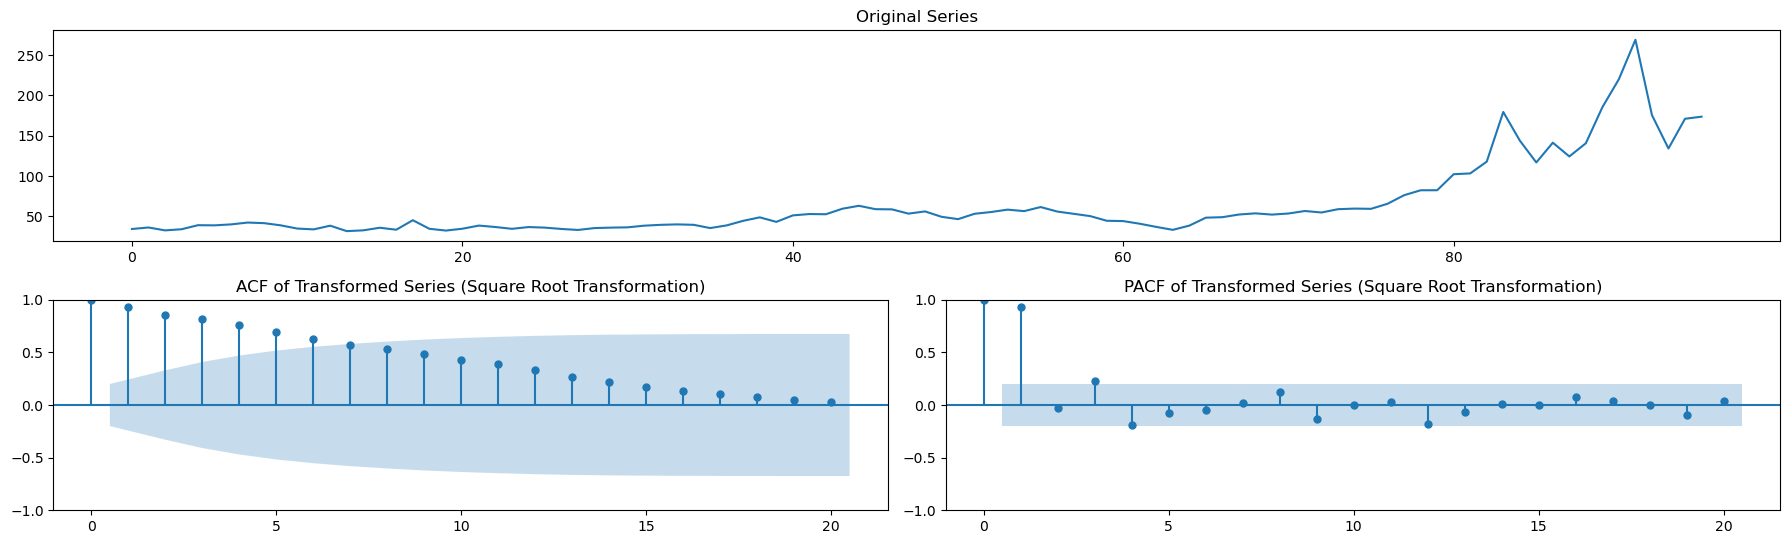

ADF P-Value (Box-Cox Transformation): 0.7746866053153255


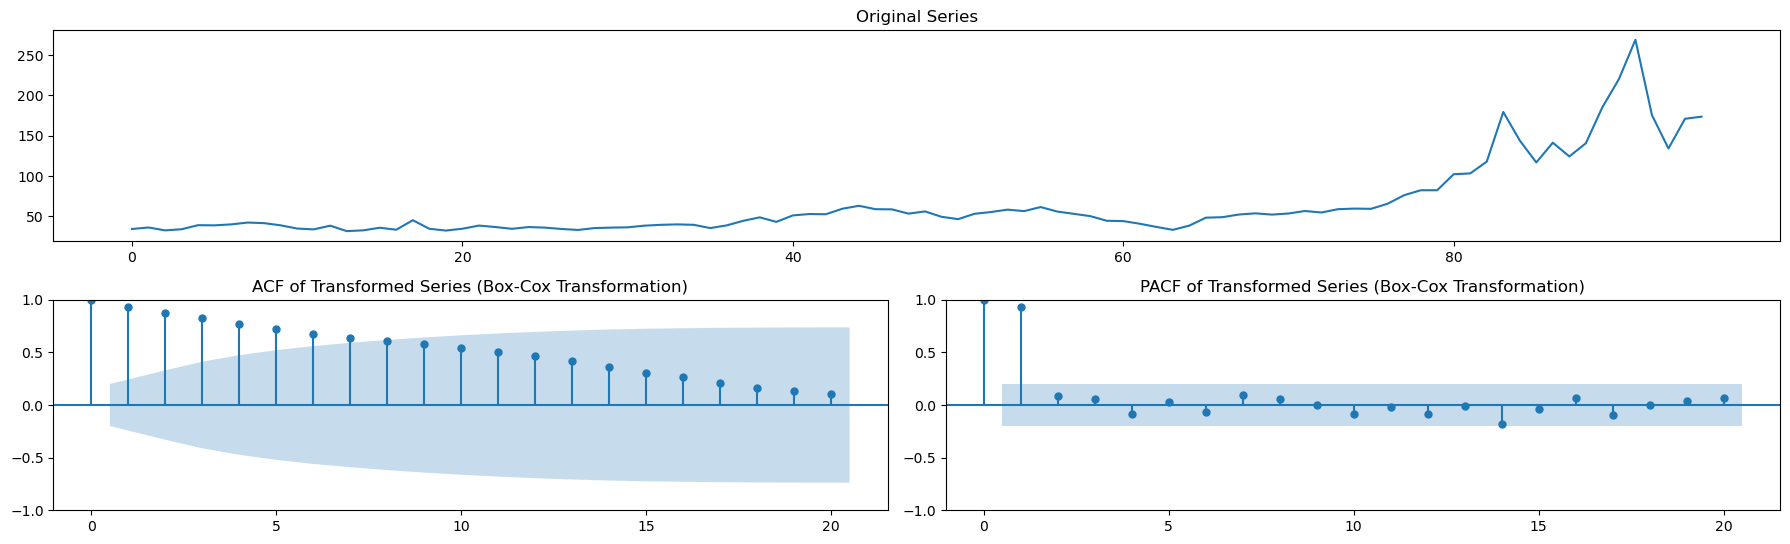

ADF P-Value (First Differencing): 0.8379388221332791


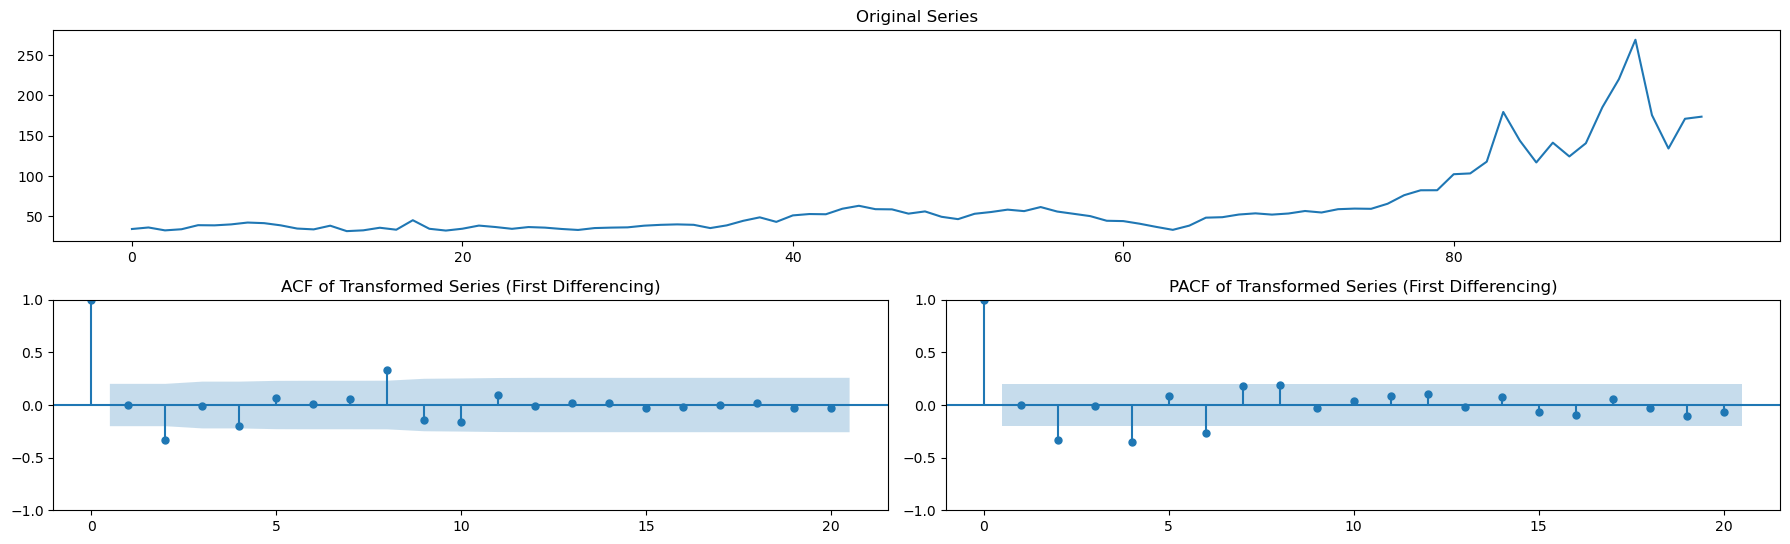

ADF P-Value (Second Difference of Log): 1.6687959499703476e-07


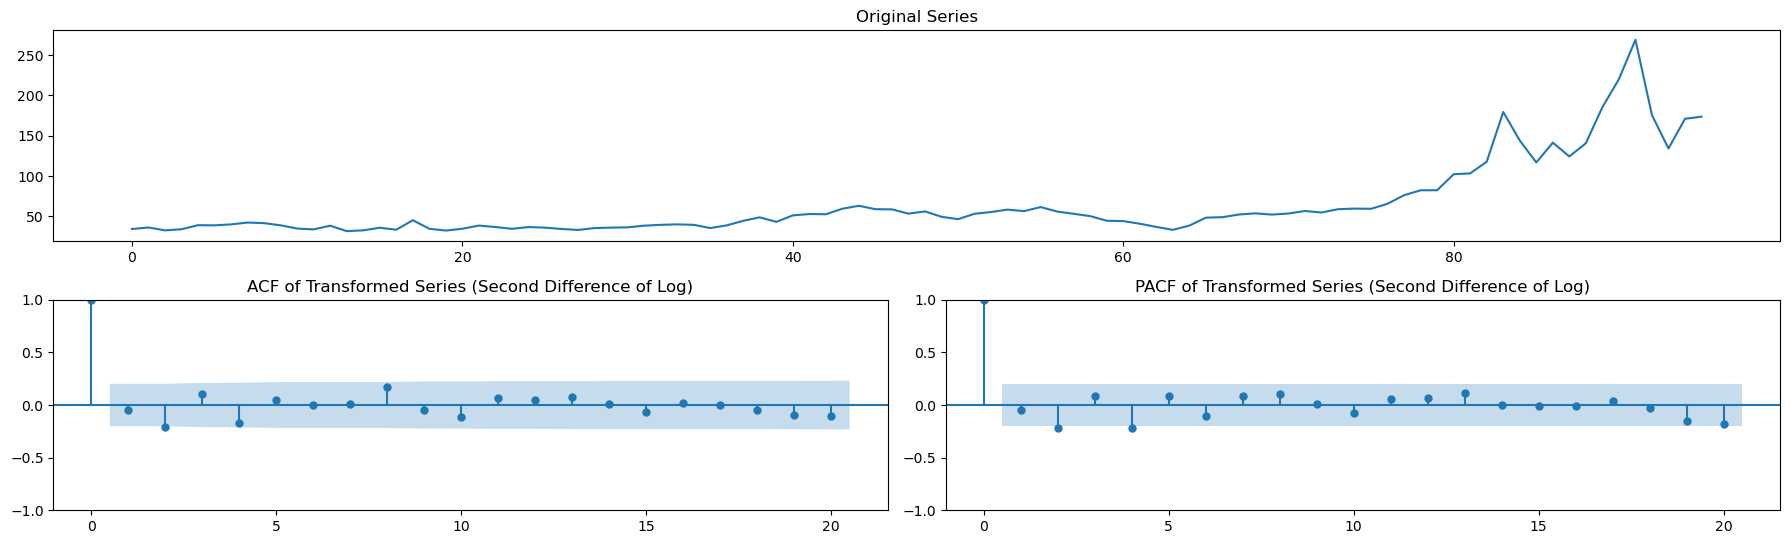



Column: Electricty_Price_Netherlands
ADF P-Value (Log Transformation): 0.6935441887292825


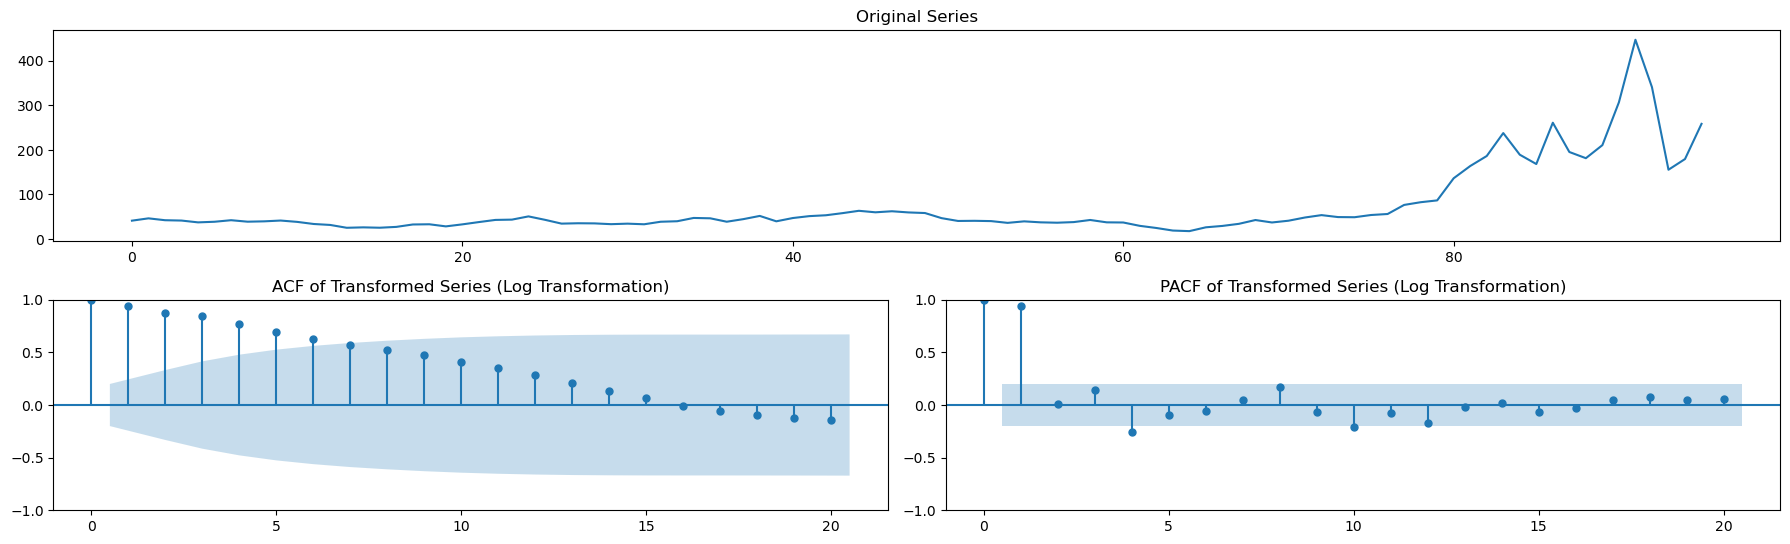

ADF P-Value (Square Root Transformation): 0.08729774919540145


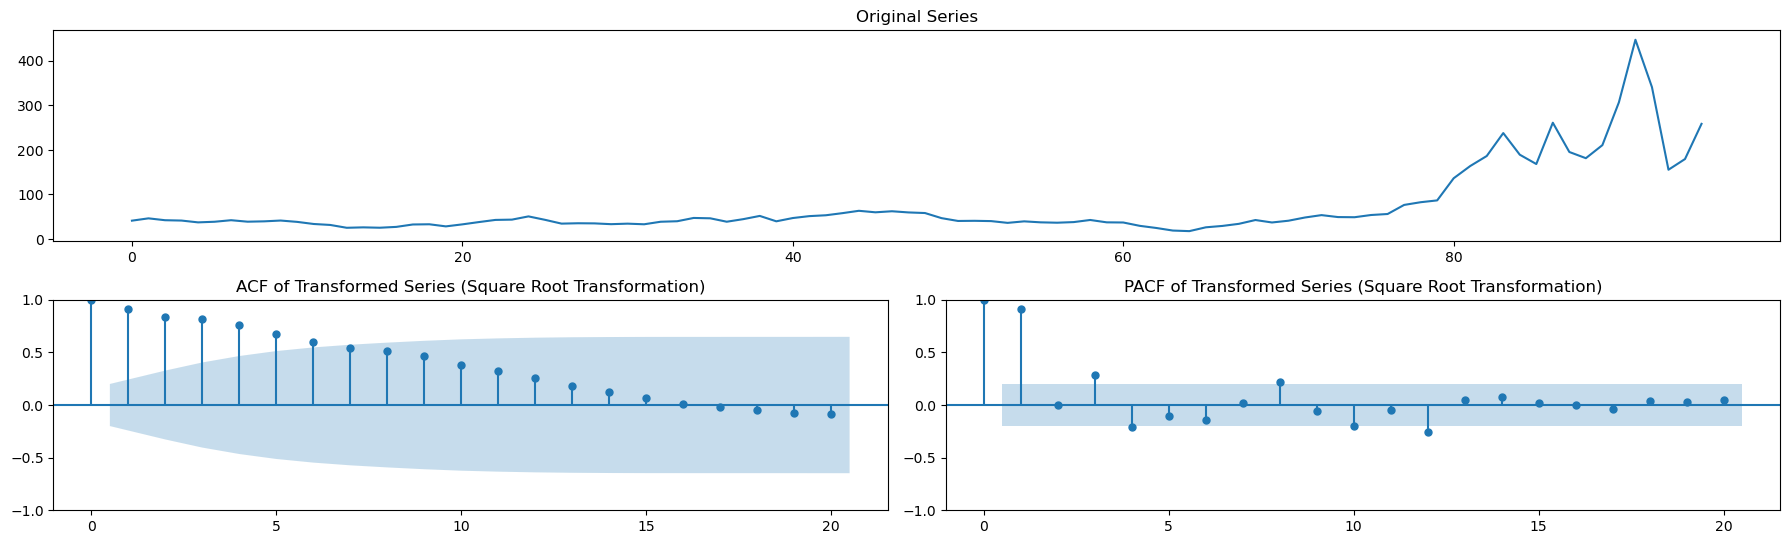

ADF P-Value (Box-Cox Transformation): 0.546011691679537


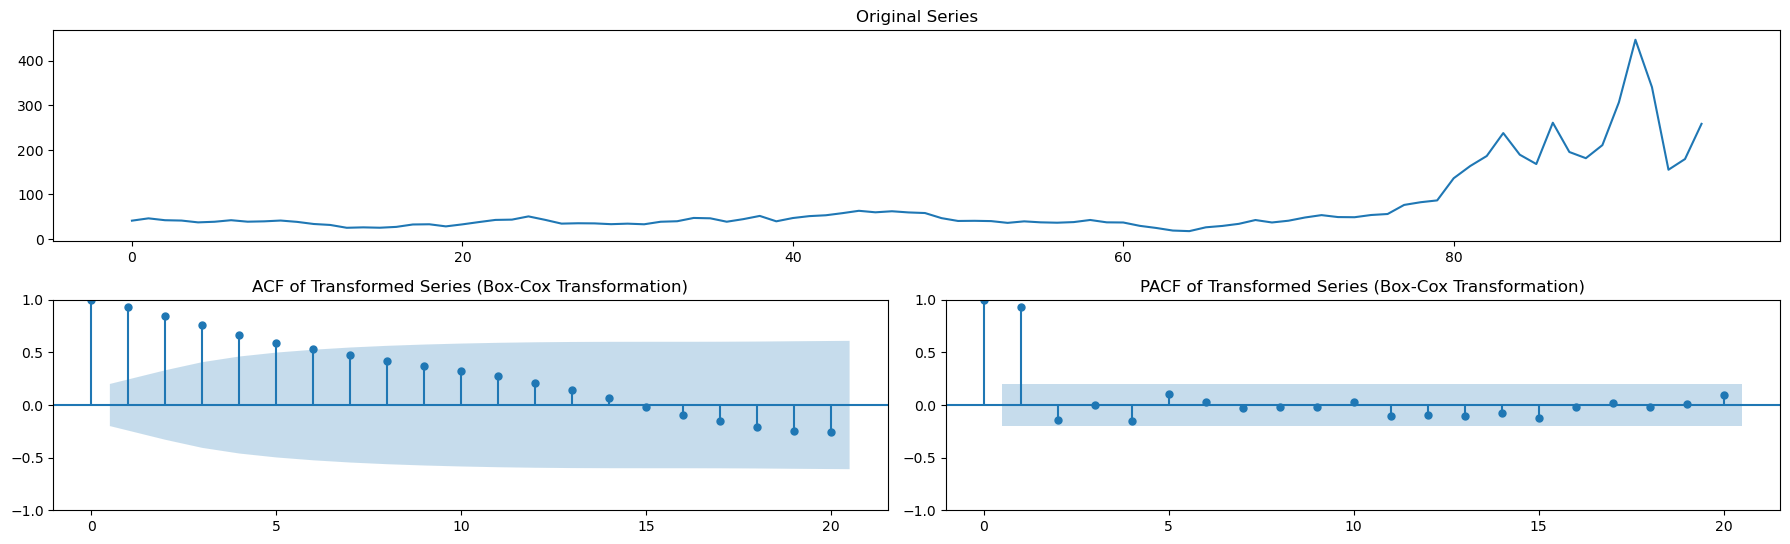

ADF P-Value (First Differencing): 0.1798451899860687


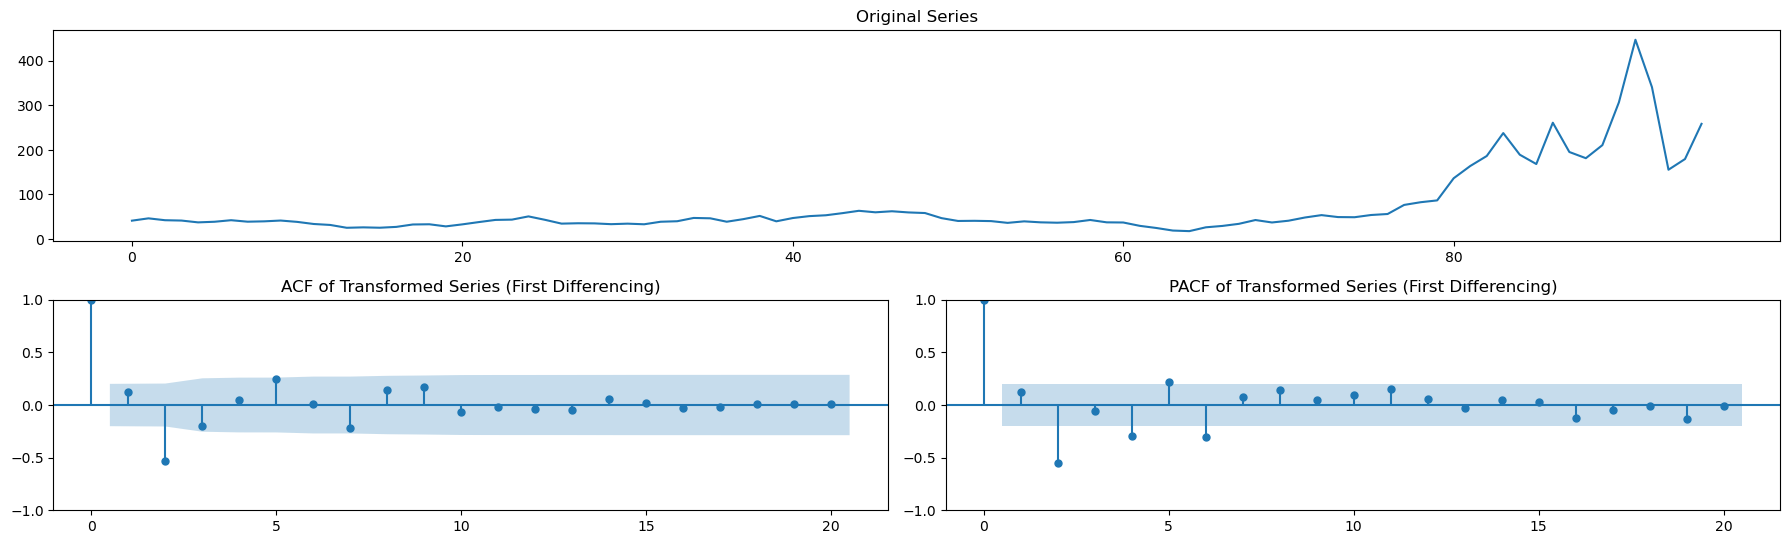

ADF P-Value (Second Difference of Log): 0.028106559131818917


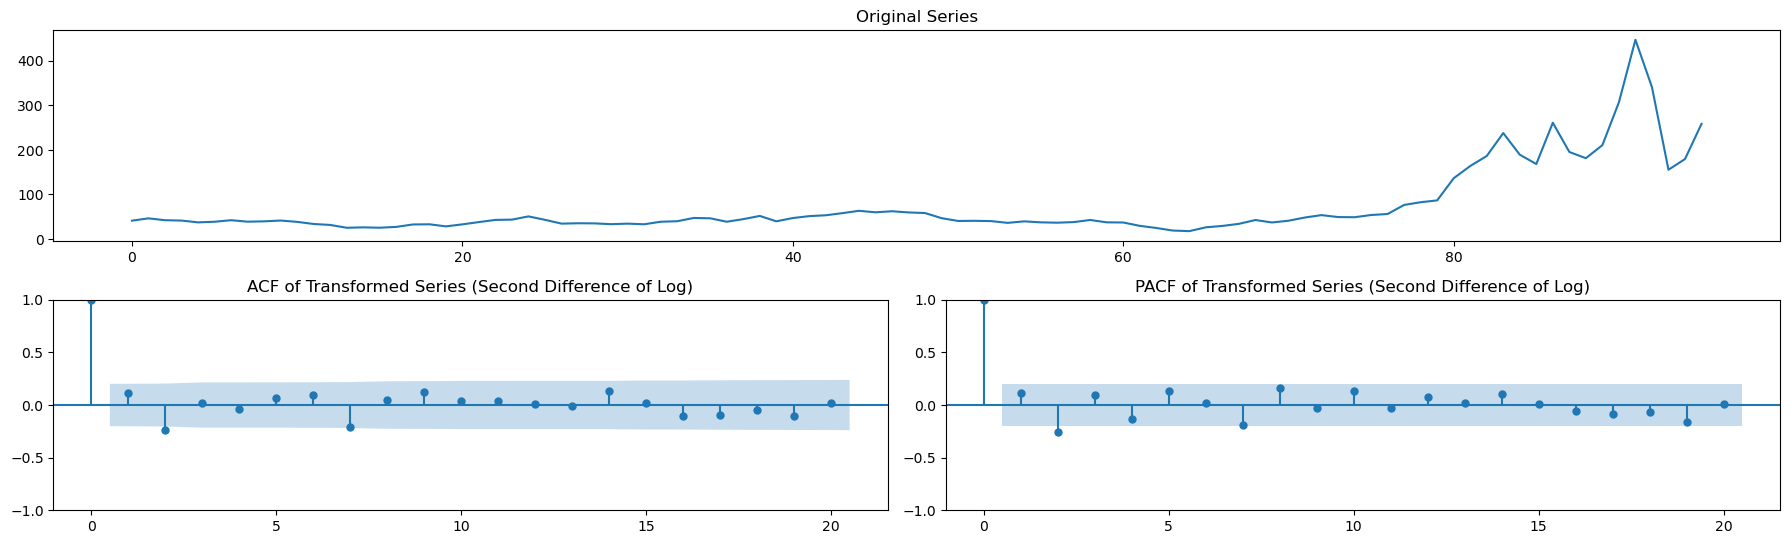



Column: Electricty_Price_Germany
ADF P-Value (Log Transformation): 0.864211173808152


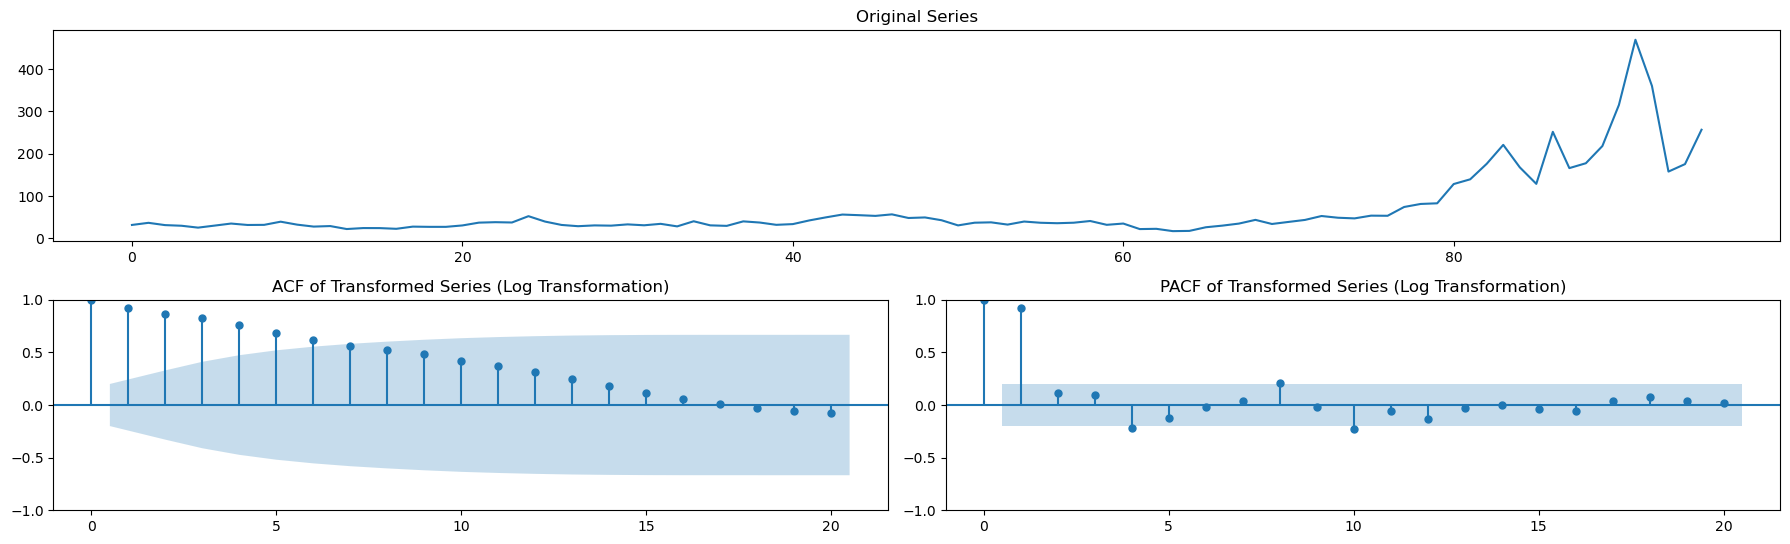

ADF P-Value (Square Root Transformation): 0.6178568500783578


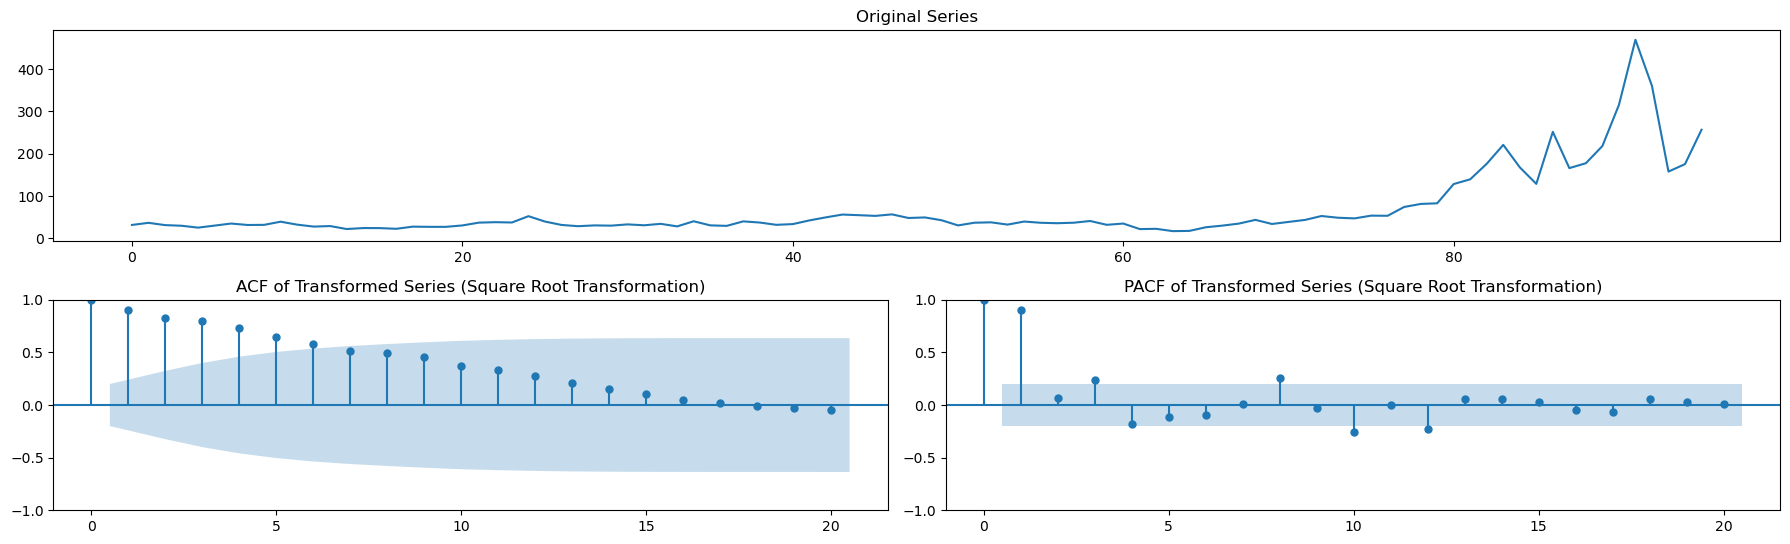

ADF P-Value (Box-Cox Transformation): 0.45790555981486725


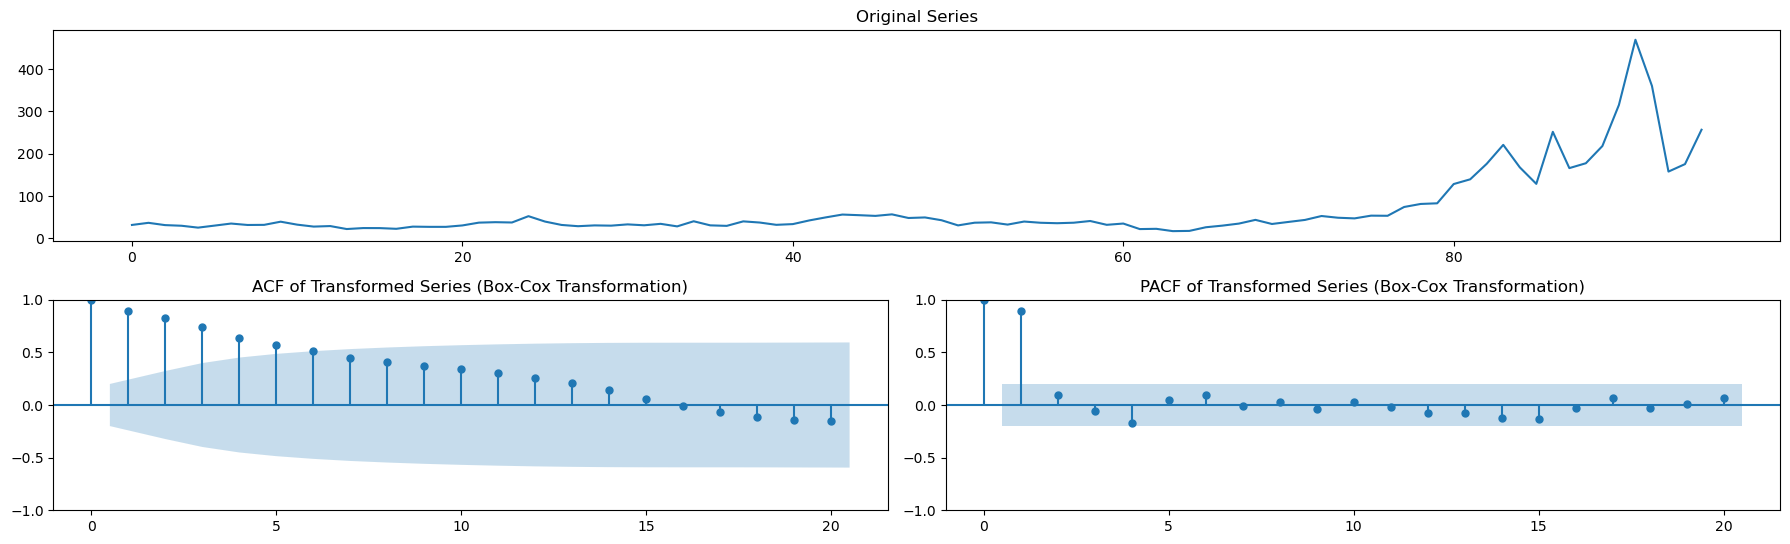

ADF P-Value (First Differencing): 0.5978158109791317


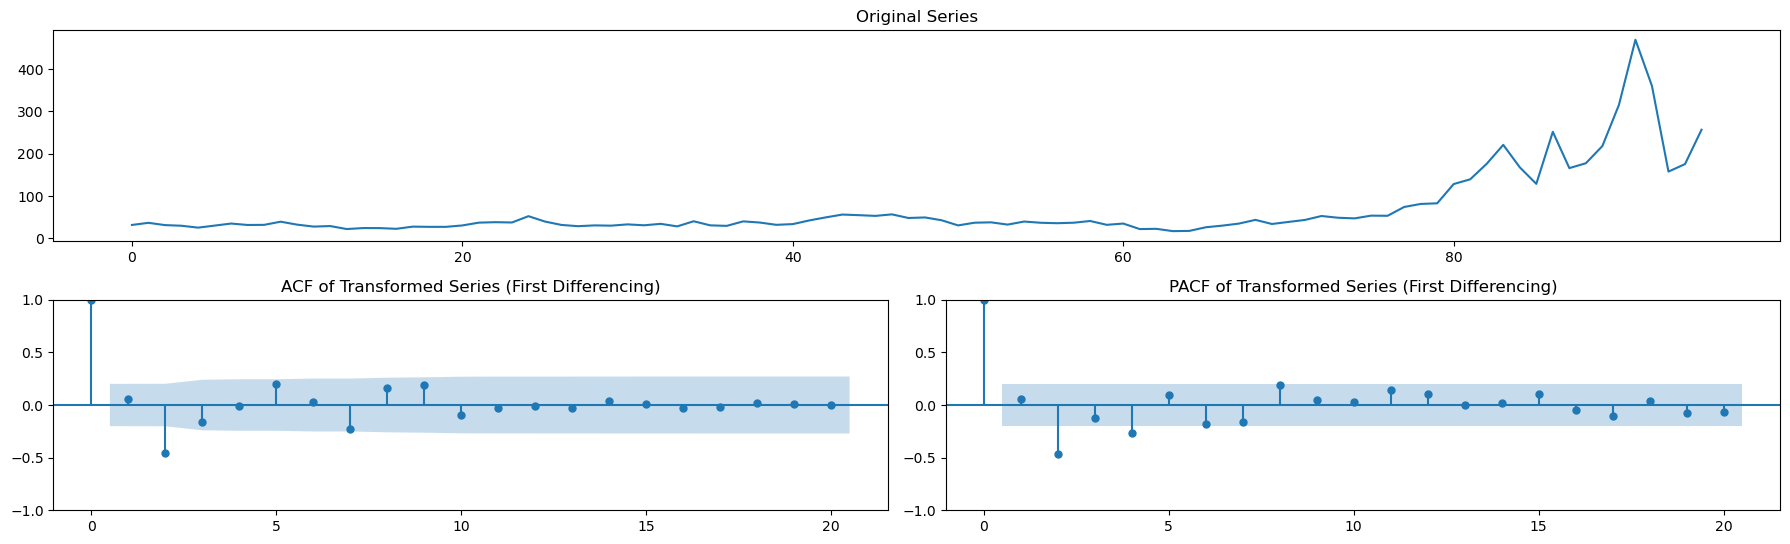

ADF P-Value (Second Difference of Log): 7.311776925166459e-13


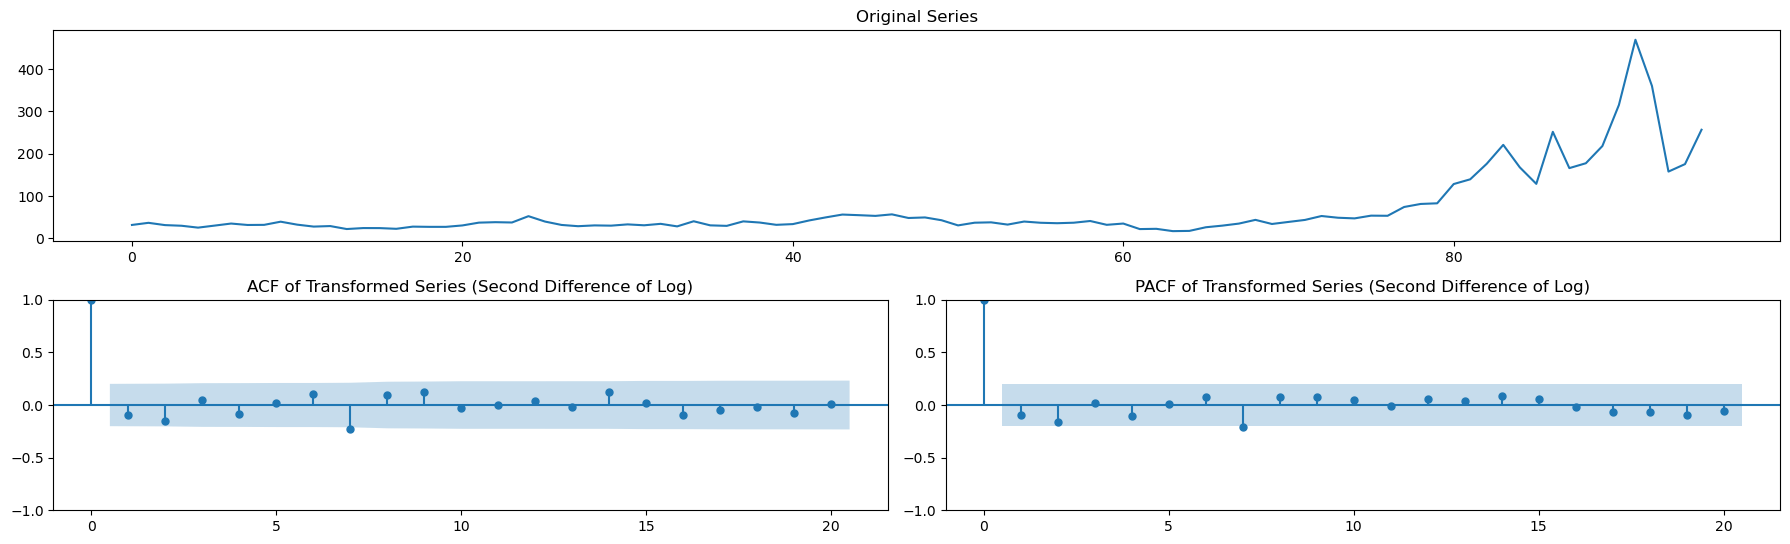



Column: Inflation_rate_france
ADF P-Value (Log Transformation): 0.44183510431591766


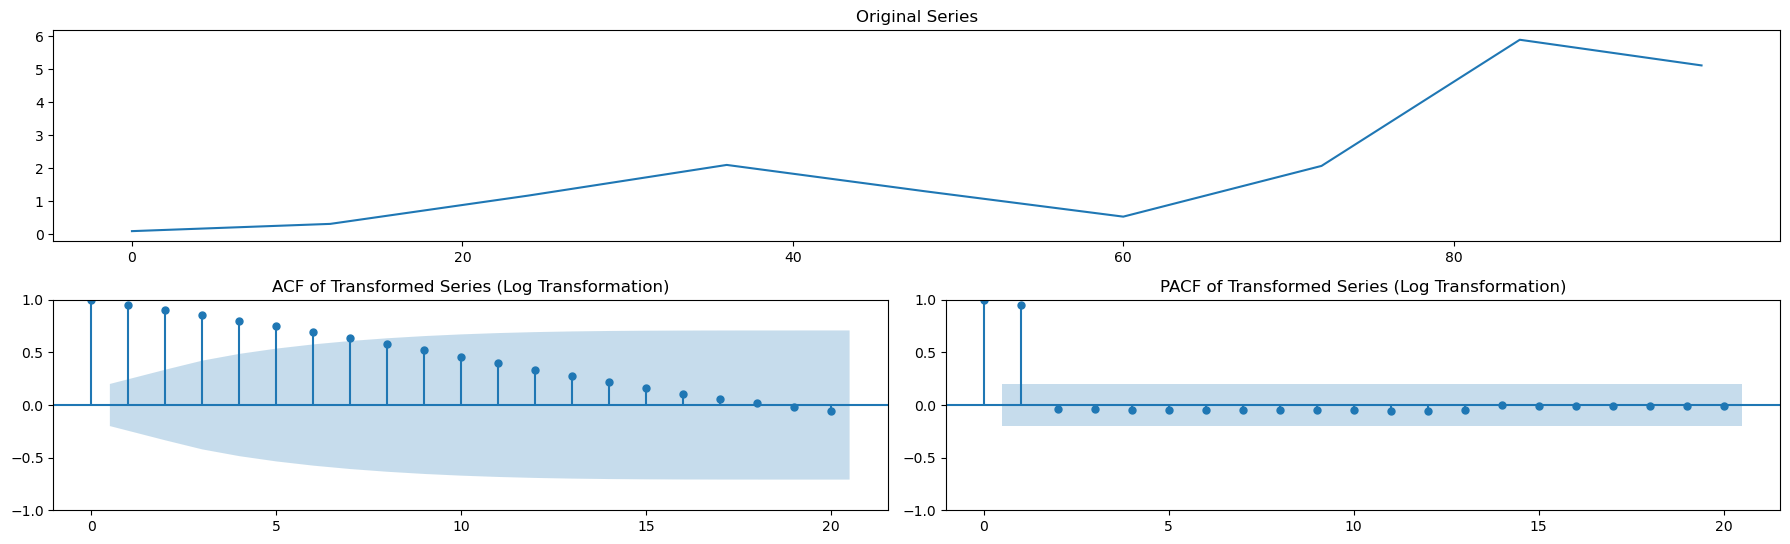

ADF P-Value (Square Root Transformation): 0.45111330189785126


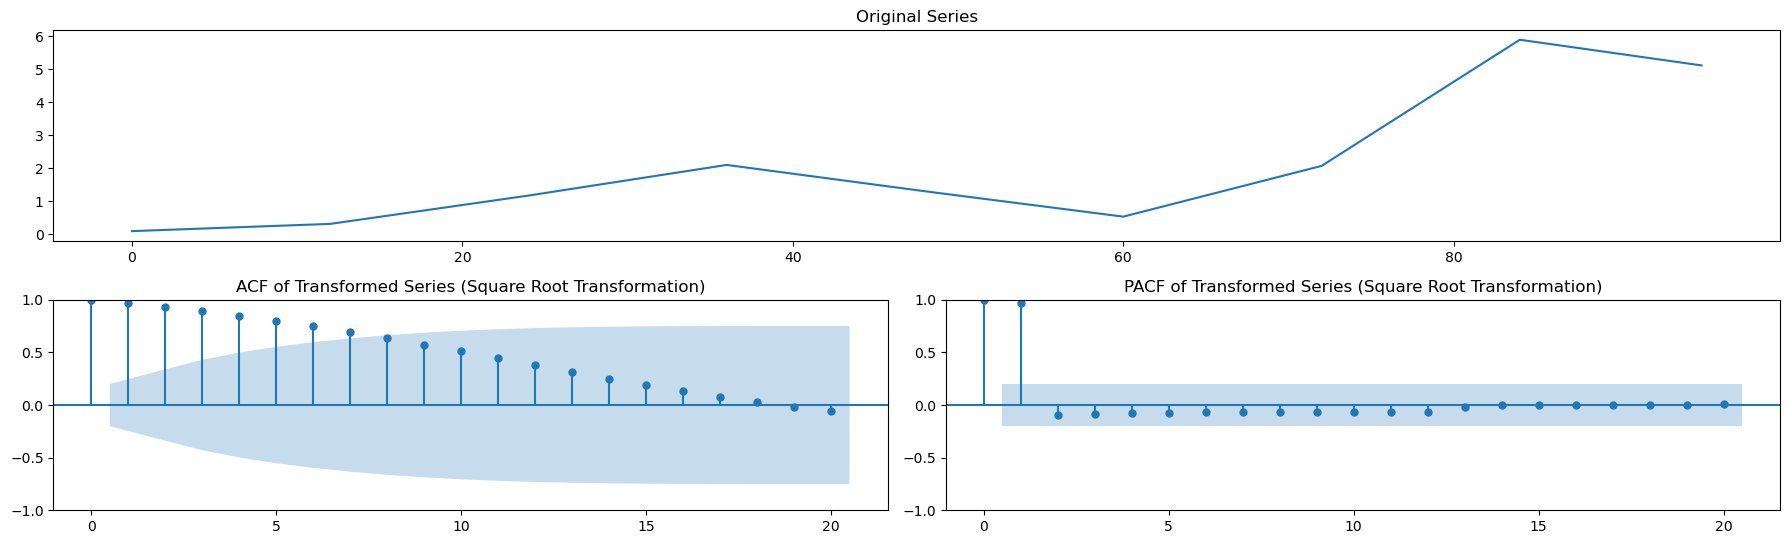

ADF P-Value (Box-Cox Transformation): 0.49958412540431


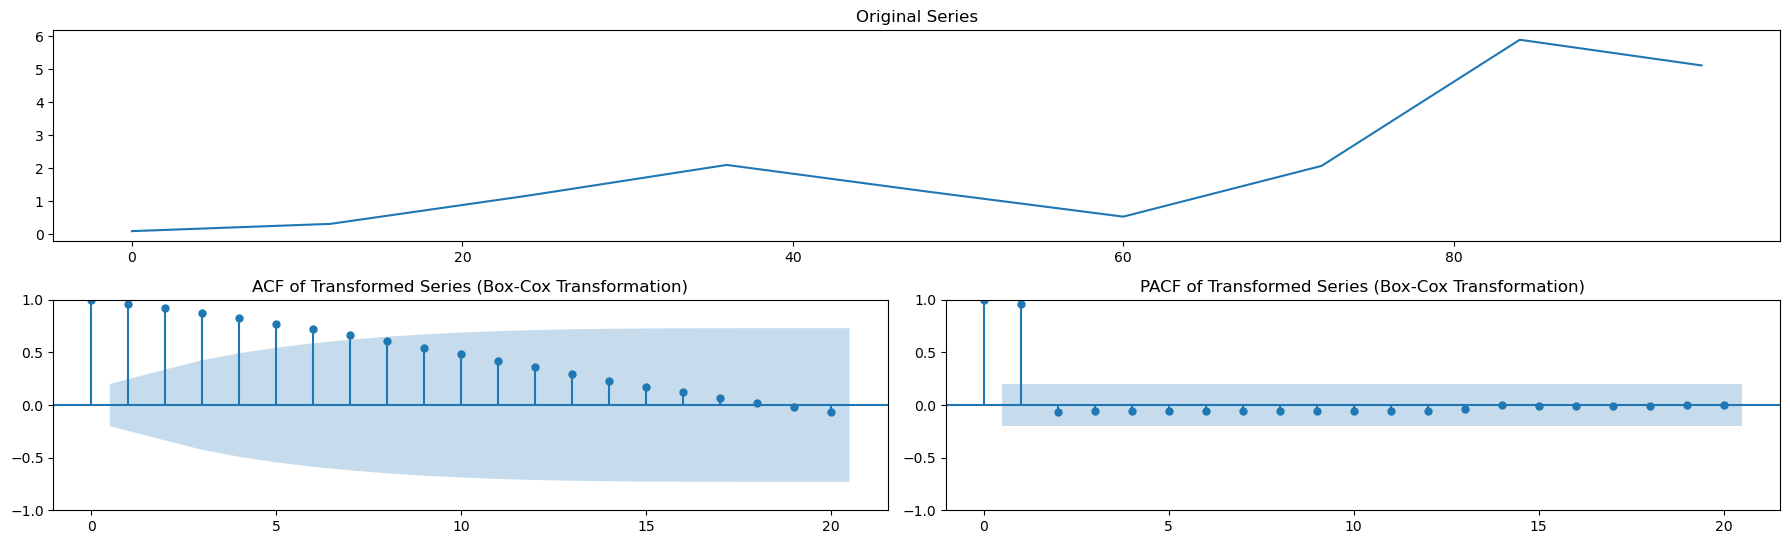

ADF P-Value (First Differencing): 0.32172835413945067


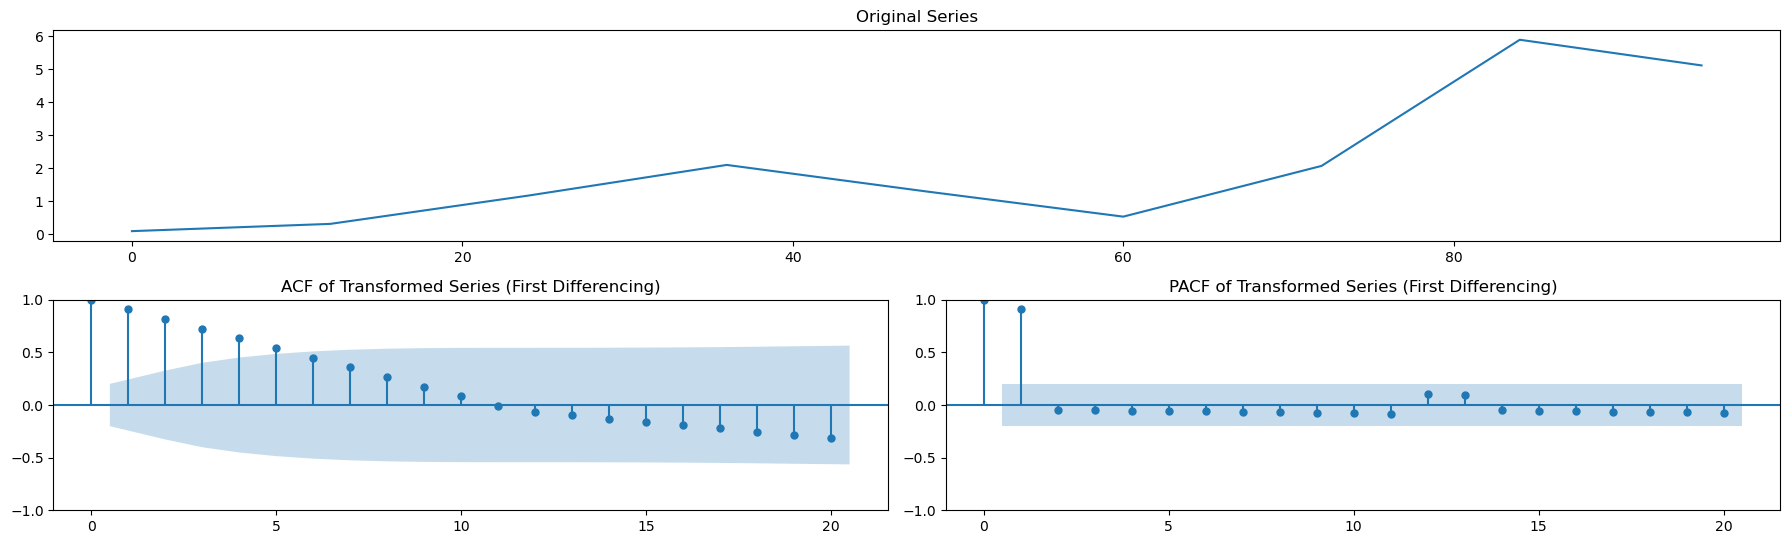

ADF P-Value (Second Difference of Log): 0.0346669142739844


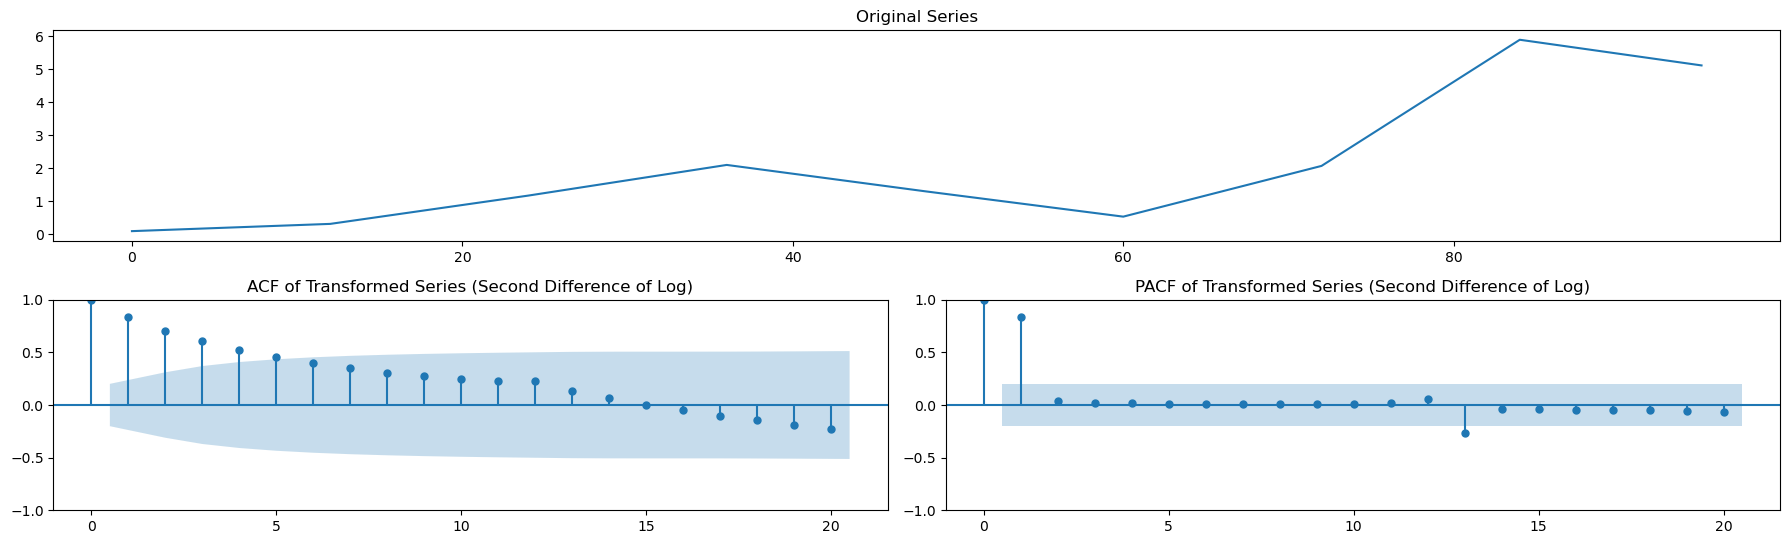



Column: Automotive Value
ADF P-Value (Log Transformation): 2.4961431403103783e-07


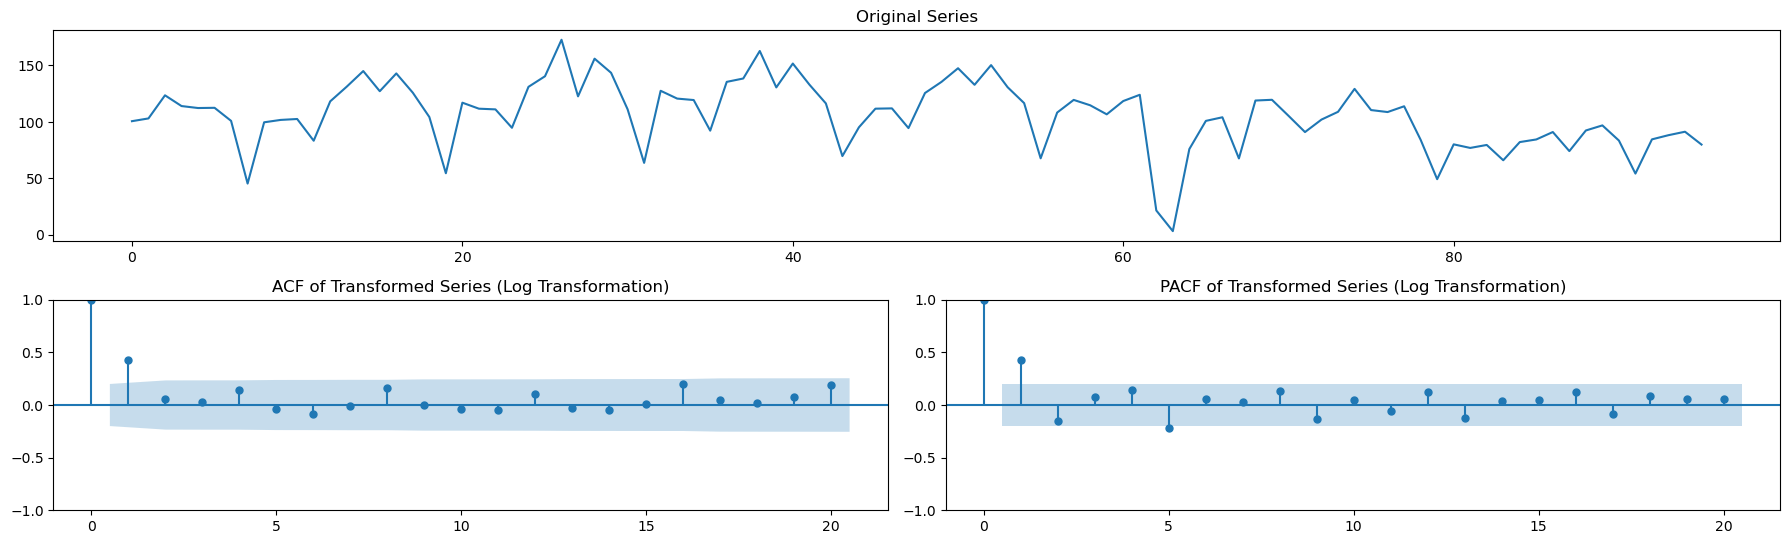

ADF P-Value (Square Root Transformation): 0.3814915092888637


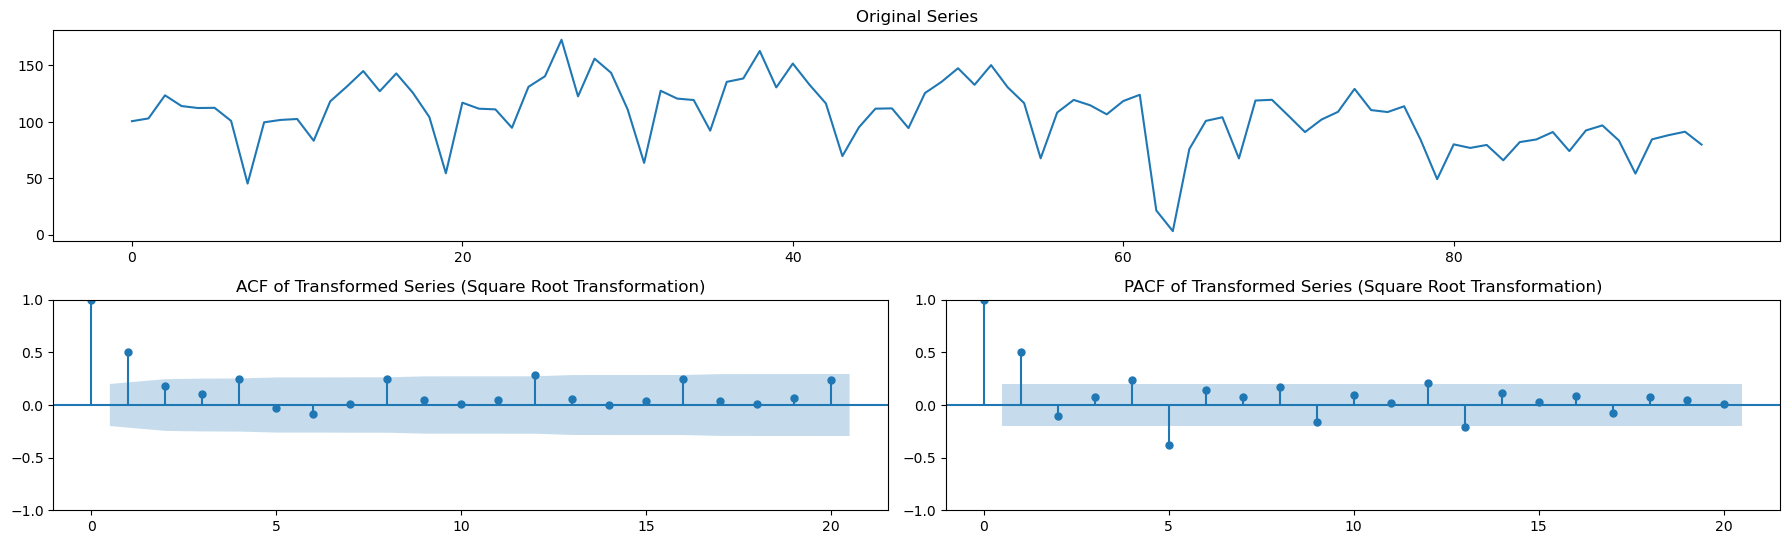

ADF P-Value (Box-Cox Transformation): 0.6973056620531817


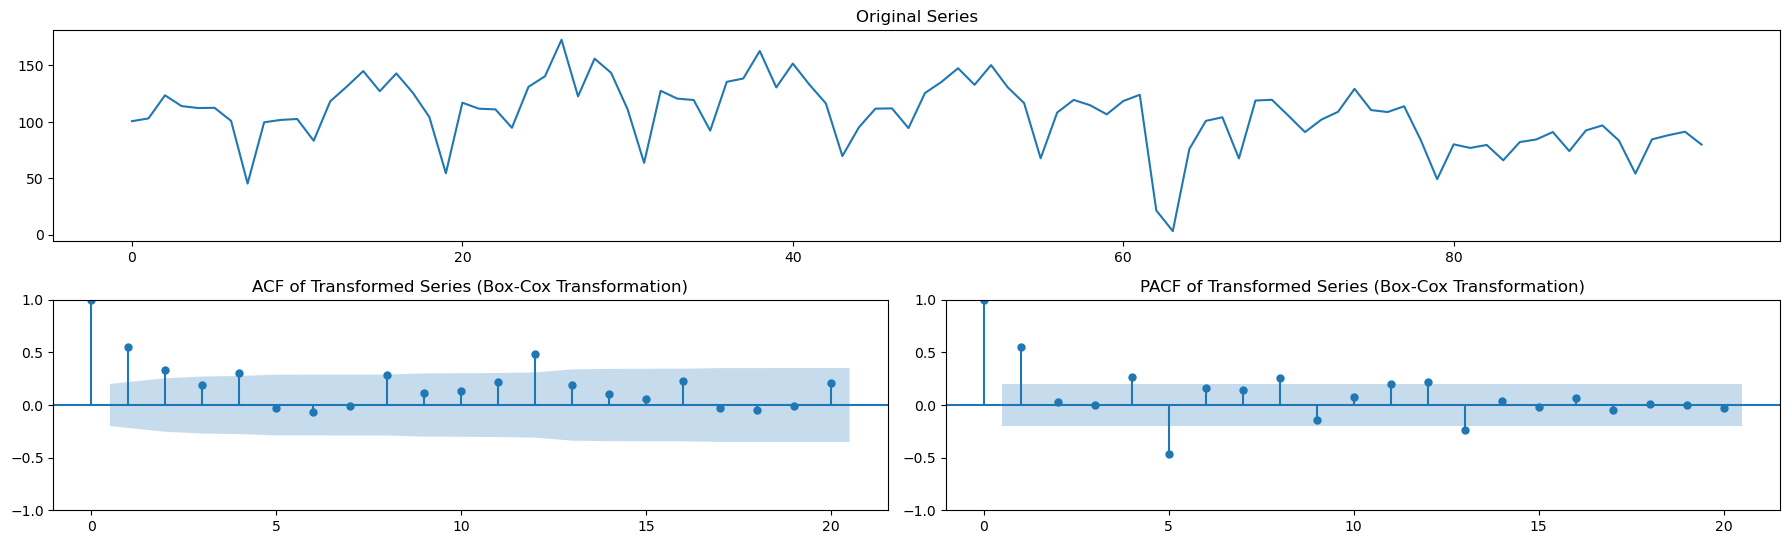

ADF P-Value (First Differencing): 0.0017803407119060394


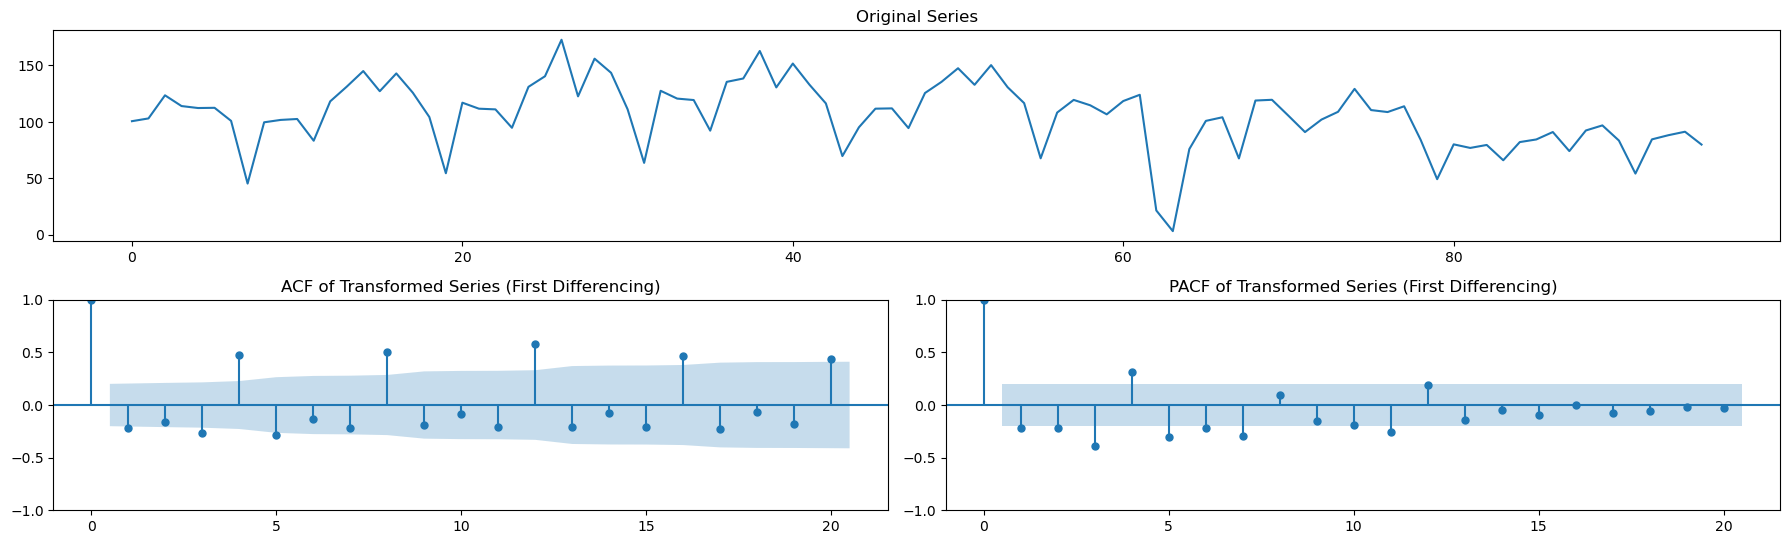

ADF P-Value (Second Difference of Log): 2.217604770533657e-08


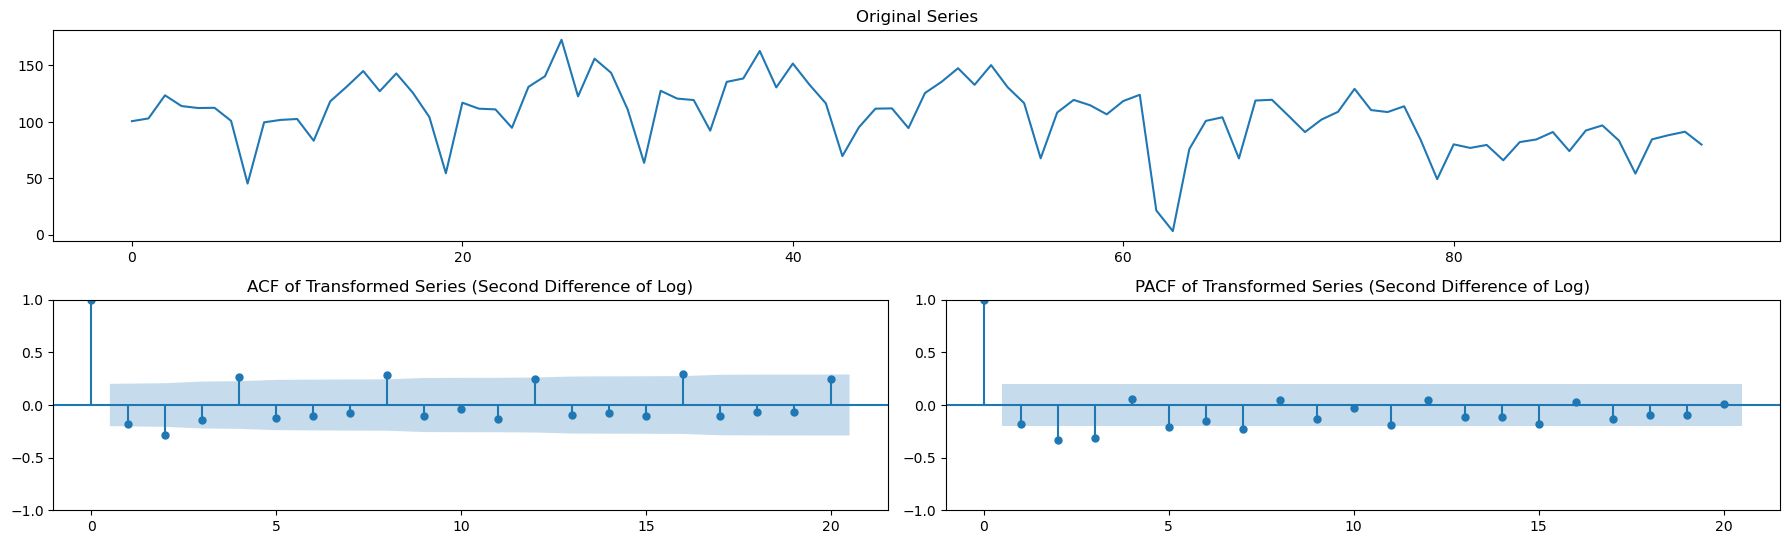

In [51]:
from scipy.stats import boxcox

def transform_and_test(series, transformation='log', significance_level=0.05):
    """
    Apply transformations to make the series stationary and perform ADF test.

    Parameters:
    - series: pandas Series
    - transformation: 'log', 'sqrt', 'boxcox', 'diff', 'logdiff', or None (default is 'log')
    - significance_level: significance level for the ADF test (default is 0.05)

    Returns:
    - transformed_series: pandas Series after transformation
    - adf_p_value: ADF test p-value
    """

    if transformation == 'log':
        transformed_series = np.log(series)
    elif transformation == 'sqrt':
        transformed_series = np.sqrt(series)
    elif transformation == 'boxcox':
        transformed_series, _ = boxcox(series)
    elif transformation == 'diff':
        transformed_series = series.diff().dropna()
    elif transformation == 'logdiff':
        transformed_series = np.log(series).diff().dropna()
    else:
        transformed_series = series

    result_adf = adfuller(transformed_series)
    adf_p_value = result_adf[1]

    return transformed_series, adf_p_value

def plot_acf_pacf_after_transformation(series, transformed_series, title):
    """
    Plot ACF and PACF after applying transformation.

    Parameters:
    - series: pandas Series (original series)
    - transformed_series: pandas Series after transformation
    - title: Title for the plot
    """

    plt.figure(figsize=(18, 8))

    # Plot original series
    plt.subplot(3, 1, 1)
    plt.plot(series)
    plt.title('Original Series')

    # Plot ACF of transformed series
    plt.subplot(3, 2, 3)
    plot_acf(transformed_series, lags=20, ax=plt.gca())
    plt.title(f'ACF of Transformed Series ({title})')

    # Plot PACF of transformed series
    plt.subplot(3, 2, 4)
    plot_pacf(transformed_series, lags=20, method='ywm', ax=plt.gca())
    plt.title(f'PACF of Transformed Series ({title})')

    plt.tight_layout()
    plt.show()

# Example Usage:
for column_name in df.columns:
    if column_name != 'time':
        original_series = df[column_name].dropna()

        print(f'Column: {column_name}')

        # Log transformation
        log_transformed_series, adf_p_value_log = transform_and_test(original_series, transformation='log')
        print(f'ADF P-Value (Log Transformation): {adf_p_value_log}')
        plot_acf_pacf_after_transformation(original_series, log_transformed_series, 'Log Transformation')

        # Square root transformation
        sqrt_transformed_series, adf_p_value_sqrt = transform_and_test(original_series, transformation='sqrt')
        print(f'ADF P-Value (Square Root Transformation): {adf_p_value_sqrt}')
        plot_acf_pacf_after_transformation(original_series, sqrt_transformed_series, 'Square Root Transformation')

        # Box-Cox transformation
        boxcox_transformed_series, adf_p_value_boxcox = transform_and_test(original_series, transformation='boxcox')
        print(f'ADF P-Value (Box-Cox Transformation): {adf_p_value_boxcox}')
        plot_acf_pacf_after_transformation(original_series, boxcox_transformed_series, 'Box-Cox Transformation')

        # First differencing
        differenced_series, adf_p_value_diff = transform_and_test(original_series, transformation='diff')
        print(f'ADF P-Value (First Differencing): {adf_p_value_diff}')
        plot_acf_pacf_after_transformation(original_series, differenced_series, 'First Differencing')

        # Second difference of log
        logdiff_transformed_series, adf_p_value_logdiff = transform_and_test(original_series, transformation='logdiff')
        print(f'ADF P-Value (Second Difference of Log): {adf_p_value_logdiff}')
        plot_acf_pacf_after_transformation(original_series, logdiff_transformed_series, 'Second Difference of Log')

        print('\n')


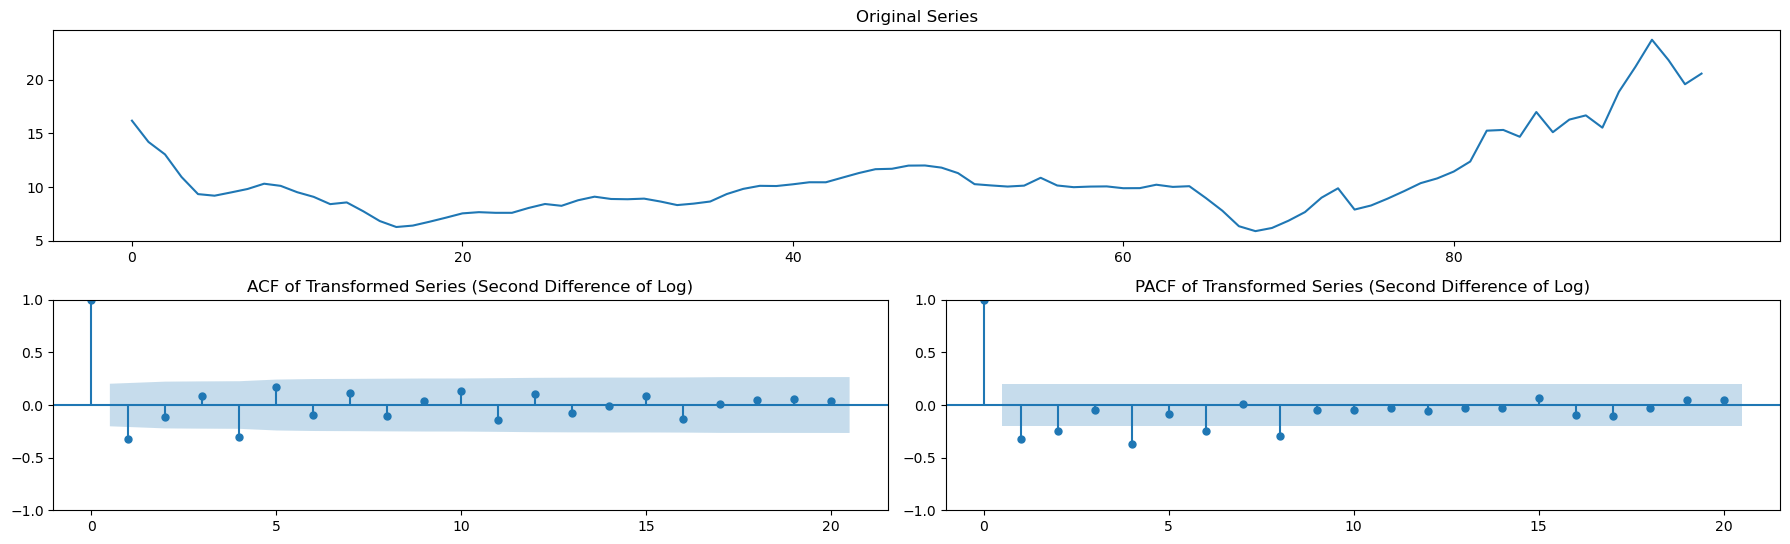

ADF P-Value (Second Difference of Log): 9.430443680168244e-09


In [52]:
# Select the 'NGAS_JP' column
original_series = df['NGAS_JP'].dropna()

# Apply the second difference of the log transformation
transformed_series = np.log(original_series).diff().diff().dropna()

# Perform the ADF test
result_adf = adfuller(transformed_series)
adf_p_value = result_adf[1]

# Plot ACF and PACF after applying transformation
plot_acf_pacf_after_transformation(original_series, transformed_series, 'Second Difference of Log')

print(f'ADF P-Value (Second Difference of Log): {adf_p_value}')


/Users/madhuranirale/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


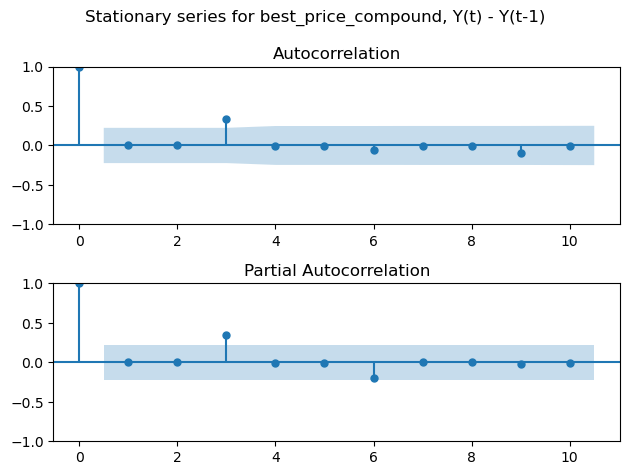

In [17]:
data = df["best_price_compound"].diff()
data = data.dropna()

f, ax = plt.subplots(nrows=2, ncols=1)
f.subplots_adjust(hspace=0.4, top=0.85)
f.suptitle("Stationary series for best_price_compound, Y(t) - Y(t-1)")
plot_acf(data, lags=10, ax=ax[0])
plot_pacf(data, lags=10, ax=ax[1])
plt.tight_layout()
plt.show()